# Predict RH from berry fungal communities

> using `ritme` (https://github.com/adamovanja/ritme)

note. use the **ritme_model** environment! 


In [40]:
from ritme.find_best_model_config import (
    _load_experiment_config,
    _load_phylogeny,
    _load_taxonomy,
    find_best_model_config,
    save_best_models,
)
from ritme.split_train_test import _load_data, split_train_test
from ritme.evaluate_tuned_models import evaluate_tuned_models

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import mlflow
import numpy as np
import os

from sklearn.metrics import r2_score

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
workdir = '/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/climate-berries'
%cd $workdir

/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/climate-berries


In [ ]:
# set experiment configuration path 
model_config_path = "/home/lfloerl/microterroir/Microbiome/Other_scripts/config/RITMEconfig_RH_noGroup.json"

# define path to feature table, metadata, and taxonomy (no phylogeny)
path_to_ft = "climate_filtered_table.qza"
path_to_md = "/home/lfloerl/microterroir/Microbiome/Metadata/ITS_Lavaux_Climate.tsv"
path_to_tax = "/home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/taxonomy.qza"

# define train size
train_size = 0.8

# if you want to store the best models, define path where you want to store
path_to_store_best_models = "RH_best_models"

In [8]:
config = _load_experiment_config(model_config_path)

## Read & split data


In [9]:
md, ft = _load_data(path_to_md, path_to_ft)
print(md.shape, ft.shape)

(595, 36) (326, 6091)


In [11]:
train_val, test = split_train_test(
    md,
    ft,
    group_by_column=config["group_by_column"],
    train_size=train_size,
    seed=config["seed_data"],
)

Train: (260, 6127), Test: (66, 6127)


/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/split_train_test.py:139: UserWarning: Provided feature table contains absolute instead of relative abundances. Hence, converting it to relative abundances...
  warnings.warn(


## Find best model config

View the results with navigating to the folder in the terminal (e.g. `cd /home/lfloerl/cloud/lfloerl/Microterroir/artifacts/ITS/lavaux/climate-berries/ritme_all_models`) and launching  mlflow (`mlflow ui --port 8080`) and opening _http://localhost:8080_ 


**Try different configs** (`experiment_tag`)

* `all_models_noGroup` --> Train: (260, 6127), Test: (66, 6127)
    * "linreg", "xgb", "rf" 
    * no grouping, seed 14 (larger test set)
    * test_mode = true (use entire search space)
    * 500 trials

In [12]:
tax = _load_taxonomy(path_to_tax)

best_model_dict, path_to_exp = find_best_model_config(
    config, train_val, tax, path_store_model_logs="ritme_linreg_xgb_rf_RH")

(train_rf pid=1133071) Train: (208, 36), Test: (52, 36)


(train_rf pid=1133071) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1133071)   warnings.warn(
2025-02-25 20:25:02,923	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.116 s, which may be a performance bottleneck.
2025-02-25 20:25:02,925	WARNING util.py:201 -- The `process_trial_result` operation took 1.118 s, which may be a performance bottleneck.
2025-02-25 20:25:02,925	WARNING util.py:201 -- Processing trial results took 1.118 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:25:02,926	WARNING util.py:201 -- The `process_trial_result` operation took 1.119 s, which may be a performance bottleneck.
(train_rf pid=1133132) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1133132) Train: (208, 142), Test: (52, 142)


2025-02-25 20:25:08,903	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.138 s, which may be a performance bottleneck.
2025-02-25 20:25:08,905	WARNING util.py:201 -- The `process_trial_result` operation took 1.140 s, which may be a performance bottleneck.
2025-02-25 20:25:08,906	WARNING util.py:201 -- Processing trial results took 1.140 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:25:08,906	WARNING util.py:201 -- The `process_trial_result` operation took 1.141 s, which may be a performance bottleneck.
(train_rf pid=1133226) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1133226)   warnings.warn(


(train_rf pid=1133226) Train: (208, 159), Test: (52, 159)


2025-02-25 20:25:14,350	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.056 s, which may be a performance bottleneck.
2025-02-25 20:25:14,352	WARNING util.py:201 -- The `process_trial_result` operation took 1.058 s, which may be a performance bottleneck.
2025-02-25 20:25:14,353	WARNING util.py:201 -- Processing trial results took 1.059 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:25:14,353	WARNING util.py:201 -- The `process_trial_result` operation took 1.060 s, which may be a performance bottleneck.
(train_rf pid=1133299) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1133299)   warnings.warn(


(train_rf pid=1133299) Train: (208, 38), Test: (52, 38)


2025-02-25 20:25:20,347	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.236 s, which may be a performance bottleneck.
2025-02-25 20:25:20,349	WARNING util.py:201 -- The `process_trial_result` operation took 1.238 s, which may be a performance bottleneck.
2025-02-25 20:25:20,350	WARNING util.py:201 -- Processing trial results took 1.238 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:25:20,350	WARNING util.py:201 -- The `process_trial_result` operation took 1.239 s, which may be a performance bottleneck.
(train_rf pid=1133367) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1133367)   warnings.warn(


(train_rf pid=1133367) Train: (208, 48), Test: (52, 48)


2025-02-25 20:25:26,062	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.124 s, which may be a performance bottleneck.
2025-02-25 20:25:26,063	WARNING util.py:201 -- The `process_trial_result` operation took 1.126 s, which may be a performance bottleneck.
2025-02-25 20:25:26,064	WARNING util.py:201 -- Processing trial results took 1.126 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:25:26,064	WARNING util.py:201 -- The `process_trial_result` operation took 1.126 s, which may be a performance bottleneck.
(train_rf pid=1133433) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1133433)   warnings.warn(


(train_rf pid=1133433) Train: (208, 47), Test: (52, 47)


2025-02-25 20:25:31,446	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.073 s, which may be a performance bottleneck.
2025-02-25 20:25:31,448	WARNING util.py:201 -- The `process_trial_result` operation took 1.074 s, which may be a performance bottleneck.
2025-02-25 20:25:31,448	WARNING util.py:201 -- Processing trial results took 1.075 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:25:31,449	WARNING util.py:201 -- The `process_trial_result` operation took 1.076 s, which may be a performance bottleneck.


(train_rf pid=1133506) Train: (208, 53), Test: (52, 53)


2025-02-25 20:25:36,908	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.124 s, which may be a performance bottleneck.
2025-02-25 20:25:36,909	WARNING util.py:201 -- The `process_trial_result` operation took 1.126 s, which may be a performance bottleneck.
2025-02-25 20:25:36,910	WARNING util.py:201 -- Processing trial results took 1.127 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:25:36,910	WARNING util.py:201 -- The `process_trial_result` operation took 1.127 s, which may be a performance bottleneck.
(train_rf pid=1133570) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1133570)   warnings.warn(


(train_rf pid=1133570) Train: (208, 92), Test: (52, 92)


2025-02-25 20:25:43,170	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.113 s, which may be a performance bottleneck.
2025-02-25 20:25:43,171	WARNING util.py:201 -- The `process_trial_result` operation took 1.115 s, which may be a performance bottleneck.
2025-02-25 20:25:43,172	WARNING util.py:201 -- Processing trial results took 1.116 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:25:43,173	WARNING util.py:201 -- The `process_trial_result` operation took 1.116 s, which may be a performance bottleneck.
(train_rf pid=1133637) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1133637)   warnings.warn(


(train_rf pid=1133637) Train: (208, 37), Test: (52, 37)


2025-02-25 20:25:48,528	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.118 s, which may be a performance bottleneck.
2025-02-25 20:25:48,530	WARNING util.py:201 -- The `process_trial_result` operation took 1.120 s, which may be a performance bottleneck.
2025-02-25 20:25:48,531	WARNING util.py:201 -- Processing trial results took 1.121 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:25:48,531	WARNING util.py:201 -- The `process_trial_result` operation took 1.122 s, which may be a performance bottleneck.


(train_rf pid=1133701) Train: (208, 43), Test: (52, 43)


(train_rf pid=1133701) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1133701)   warnings.warn(
2025-02-25 20:25:54,507	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.105 s, which may be a performance bottleneck.
2025-02-25 20:25:54,508	WARNING util.py:201 -- The `process_trial_result` operation took 1.107 s, which may be a performance bottleneck.
2025-02-25 20:25:54,509	WARNING util.py:201 -- Processing trial results took 1.107 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:25:54,509	WARNING util.py:201 -- The `process_trial_result` operation took 1.108 s, which may be a performance bottleneck.


(train_rf pid=1133768) Train: (208, 48), Test: (52, 48)


(train_rf pid=1133768) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1133768)   warnings.warn(
2025-02-25 20:26:00,475	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.134 s, which may be a performance bottleneck.
2025-02-25 20:26:00,477	WARNING util.py:201 -- The `process_trial_result` operation took 1.136 s, which may be a performance bottleneck.
2025-02-25 20:26:00,477	WARNING util.py:201 -- Processing trial results took 1.136 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:26:00,478	WARNING util.py:201 -- The `process_trial_result` operation took 1.137 s, which may be a performance bottleneck.


(train_rf pid=1133833) Train: (208, 91), Test: (52, 91)


(train_rf pid=1133833) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1133833)   warnings.warn(
2025-02-25 20:26:06,574	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.126 s, which may be a performance bottleneck.
2025-02-25 20:26:06,575	WARNING util.py:201 -- The `process_trial_result` operation took 1.128 s, which may be a performance bottleneck.
2025-02-25 20:26:06,576	WARNING util.py:201 -- Processing trial results took 1.129 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:26:06,576	WARNING util.py:201 -- The `process_trial_result` operation took 1.129 s, which may be a performance bottleneck.
(train_rf pid=1133926) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1133926) Train: (208, 91), Test: (52, 91)


2025-02-25 20:26:12,446	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.276 s, which may be a performance bottleneck.
2025-02-25 20:26:12,448	WARNING util.py:201 -- The `process_trial_result` operation took 1.278 s, which may be a performance bottleneck.
2025-02-25 20:26:12,448	WARNING util.py:201 -- Processing trial results took 1.279 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:26:12,448	WARNING util.py:201 -- The `process_trial_result` operation took 1.279 s, which may be a performance bottleneck.


(train_rf pid=1134033) Train: (208, 92), Test: (52, 92)


(train_rf pid=1134033) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1134033)   warnings.warn(
2025-02-25 20:26:17,662	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.079 s, which may be a performance bottleneck.
2025-02-25 20:26:17,664	WARNING util.py:201 -- The `process_trial_result` operation took 1.081 s, which may be a performance bottleneck.
2025-02-25 20:26:17,665	WARNING util.py:201 -- Processing trial results took 1.081 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:26:17,665	WARNING util.py:201 -- The `process_trial_result` operation took 1.082 s, which may be a performance bottleneck.


(train_rf pid=1134102) Train: (208, 620), Test: (52, 620)


(train_rf pid=1134102) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1134102)   warnings.warn(
2025-02-25 20:26:23,523	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.029 s, which may be a performance bottleneck.
2025-02-25 20:26:23,525	WARNING util.py:201 -- The `process_trial_result` operation took 1.031 s, which may be a performance bottleneck.
2025-02-25 20:26:23,526	WARNING util.py:201 -- Processing trial results took 1.031 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:26:23,526	WARNING util.py:201 -- The `process_trial_result` operation took 1.032 s, which may be a performance bottleneck.


(train_rf pid=1134170) Train: (208, 646), Test: (52, 646)


2025-02-25 20:26:29,901	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.136 s, which may be a performance bottleneck.
2025-02-25 20:26:29,902	WARNING util.py:201 -- The `process_trial_result` operation took 1.138 s, which may be a performance bottleneck.
2025-02-25 20:26:29,903	WARNING util.py:201 -- Processing trial results took 1.139 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:26:29,903	WARNING util.py:201 -- The `process_trial_result` operation took 1.139 s, which may be a performance bottleneck.


(train_rf pid=1134237) Train: (208, 620), Test: (52, 620)


(train_rf pid=1134237) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1134237)   warnings.warn(
2025-02-25 20:26:35,604	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.038 s, which may be a performance bottleneck.
2025-02-25 20:26:35,606	WARNING util.py:201 -- The `process_trial_result` operation took 1.040 s, which may be a performance bottleneck.
2025-02-25 20:26:35,607	WARNING util.py:201 -- Processing trial results took 1.041 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:26:35,607	WARNING util.py:201 -- The `process_trial_result` operation took 1.042 s, which may be a performance bottleneck.
(train_rf pid=1134304) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1134304) Train: (208, 620), Test: (52, 620)


2025-02-25 20:26:41,020	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.034 s, which may be a performance bottleneck.
2025-02-25 20:26:41,022	WARNING util.py:201 -- The `process_trial_result` operation took 1.036 s, which may be a performance bottleneck.
2025-02-25 20:26:41,023	WARNING util.py:201 -- Processing trial results took 1.037 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:26:41,024	WARNING util.py:201 -- The `process_trial_result` operation took 1.037 s, which may be a performance bottleneck.
(train_rf pid=1134369) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1134369)   warnings.warn(


(train_rf pid=1134369) Train: (208, 620), Test: (52, 620)


2025-02-25 20:26:46,878	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.032 s, which may be a performance bottleneck.
2025-02-25 20:26:46,880	WARNING util.py:201 -- The `process_trial_result` operation took 1.034 s, which may be a performance bottleneck.
2025-02-25 20:26:46,880	WARNING util.py:201 -- Processing trial results took 1.035 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:26:46,881	WARNING util.py:201 -- The `process_trial_result` operation took 1.035 s, which may be a performance bottleneck.


(train_rf pid=1134435) Train: (208, 620), Test: (52, 620)


(train_rf pid=1134435) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1134435)   warnings.warn(
2025-02-25 20:26:52,465	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.165 s, which may be a performance bottleneck.
2025-02-25 20:26:52,467	WARNING util.py:201 -- The `process_trial_result` operation took 1.167 s, which may be a performance bottleneck.
2025-02-25 20:26:52,467	WARNING util.py:201 -- Processing trial results took 1.167 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:26:52,468	WARNING util.py:201 -- The `process_trial_result` operation took 1.168 s, which may be a performance bottleneck.
(train_rf pid=1134504) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1134504) Train: (208, 620), Test: (52, 620)


(train_rf pid=1134570) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1134570)   warnings.warn(


(train_rf pid=1134570) Train: (208, 71), Test: (52, 71)


2025-02-25 20:27:03,705	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.039 s, which may be a performance bottleneck.
2025-02-25 20:27:03,707	WARNING util.py:201 -- The `process_trial_result` operation took 1.041 s, which may be a performance bottleneck.
2025-02-25 20:27:03,709	WARNING util.py:201 -- Processing trial results took 1.043 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:27:03,709	WARNING util.py:201 -- The `process_trial_result` operation took 1.044 s, which may be a performance bottleneck.
2025-02-25 20:27:05,720	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.031 s, which may be a performance bottleneck.
2025-02-25 20:27:05,722	WARNING util.py:201 -- The `process_trial_result` operation took 1.033 s, which may be a performance bottleneck.
2025-02-25 20:27:05,722	WARNING util.py:201 -- Processing trial results took 1.033 s, which may be a performance bott

(train_rf pid=1134635) Train: (208, 73), Test: (52, 73)


(train_rf pid=1134635) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1134635)   warnings.warn(
2025-02-25 20:27:09,258	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.063 s, which may be a performance bottleneck.
2025-02-25 20:27:09,260	WARNING util.py:201 -- The `process_trial_result` operation took 1.066 s, which may be a performance bottleneck.
2025-02-25 20:27:09,261	WARNING util.py:201 -- Processing trial results took 1.066 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:27:09,261	WARNING util.py:201 -- The `process_trial_result` operation took 1.067 s, which may be a performance bottleneck.


(train_rf pid=1134730) Train: (208, 620), Test: (52, 620)


(train_rf pid=1134730) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1134730)   warnings.warn(
2025-02-25 20:27:15,425	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.015 s, which may be a performance bottleneck.
2025-02-25 20:27:15,427	WARNING util.py:201 -- The `process_trial_result` operation took 1.017 s, which may be a performance bottleneck.
2025-02-25 20:27:15,427	WARNING util.py:201 -- Processing trial results took 1.018 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:27:15,428	WARNING util.py:201 -- The `process_trial_result` operation took 1.018 s, which may be a performance bottleneck.
(train_rf pid=1134802) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1134802) Train: (208, 620), Test: (52, 620)


2025-02-25 20:27:21,542	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.343 s, which may be a performance bottleneck.
2025-02-25 20:27:21,544	WARNING util.py:201 -- The `process_trial_result` operation took 1.345 s, which may be a performance bottleneck.
2025-02-25 20:27:21,545	WARNING util.py:201 -- Processing trial results took 1.346 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:27:21,545	WARNING util.py:201 -- The `process_trial_result` operation took 1.347 s, which may be a performance bottleneck.


(train_rf pid=1134868) Train: (208, 620), Test: (52, 620)


(train_rf pid=1134868) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1134868)   warnings.warn(
2025-02-25 20:27:26,704	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 0.995 s, which may be a performance bottleneck.
2025-02-25 20:27:26,705	WARNING util.py:201 -- The `process_trial_result` operation took 0.997 s, which may be a performance bottleneck.
2025-02-25 20:27:26,706	WARNING util.py:201 -- Processing trial results took 0.998 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:27:26,707	WARNING util.py:201 -- The `process_trial_result` operation took 0.999 s, which may be a performance bottleneck.
(train_rf pid=1134935) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1134935) Train: (208, 620), Test: (52, 620)


2025-02-25 20:27:33,396	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.253 s, which may be a performance bottleneck.
2025-02-25 20:27:33,398	WARNING util.py:201 -- The `process_trial_result` operation took 1.255 s, which may be a performance bottleneck.
2025-02-25 20:27:33,398	WARNING util.py:201 -- Processing trial results took 1.256 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:27:33,399	WARNING util.py:201 -- The `process_trial_result` operation took 1.256 s, which may be a performance bottleneck.


(train_rf pid=1135011) Train: (208, 620), Test: (52, 620)


(train_rf pid=1135011) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1135011)   warnings.warn(
2025-02-25 20:27:38,754	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.036 s, which may be a performance bottleneck.
2025-02-25 20:27:38,755	WARNING util.py:201 -- The `process_trial_result` operation took 1.038 s, which may be a performance bottleneck.
2025-02-25 20:27:38,756	WARNING util.py:201 -- Processing trial results took 1.038 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:27:38,756	WARNING util.py:201 -- The `process_trial_result` operation took 1.039 s, which may be a performance bottleneck.


(train_rf pid=1135070) Train: (208, 44), Test: (52, 44)


(train_rf pid=1135070) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1135070)   warnings.warn(
2025-02-25 20:27:44,628	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.251 s, which may be a performance bottleneck.
2025-02-25 20:27:44,630	WARNING util.py:201 -- The `process_trial_result` operation took 1.254 s, which may be a performance bottleneck.
2025-02-25 20:27:44,630	WARNING util.py:201 -- Processing trial results took 1.254 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:27:44,631	WARNING util.py:201 -- The `process_trial_result` operation took 1.255 s, which may be a performance bottleneck.


(train_rf pid=1135142) Train: (208, 44), Test: (52, 44)


2025-02-25 20:27:49,841	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.151 s, which may be a performance bottleneck.
2025-02-25 20:27:49,842	WARNING util.py:201 -- The `process_trial_result` operation took 1.152 s, which may be a performance bottleneck.
2025-02-25 20:27:49,843	WARNING util.py:201 -- Processing trial results took 1.153 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:27:49,843	WARNING util.py:201 -- The `process_trial_result` operation took 1.154 s, which may be a performance bottleneck.


(train_rf pid=1135201) Train: (208, 645), Test: (52, 645)


2025-02-25 20:27:58,362	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.200 s, which may be a performance bottleneck.
2025-02-25 20:27:58,364	WARNING util.py:201 -- The `process_trial_result` operation took 1.202 s, which may be a performance bottleneck.
2025-02-25 20:27:58,364	WARNING util.py:201 -- Processing trial results took 1.203 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:27:58,365	WARNING util.py:201 -- The `process_trial_result` operation took 1.203 s, which may be a performance bottleneck.
(train_rf pid=1135268) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1135268)   warnings.warn(


(train_rf pid=1135268) Train: (208, 39), Test: (52, 39)


2025-02-25 20:28:02,718	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.890 s, which may be a performance bottleneck.
2025-02-25 20:28:02,720	WARNING util.py:201 -- The `process_trial_result` operation took 1.892 s, which may be a performance bottleneck.
2025-02-25 20:28:02,721	WARNING util.py:201 -- Processing trial results took 1.893 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:28:02,721	WARNING util.py:201 -- The `process_trial_result` operation took 1.893 s, which may be a performance bottleneck.


(train_rf pid=1135334) Train: (208, 620), Test: (52, 620)


(train_rf pid=1135334) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1135334)   warnings.warn(
2025-02-25 20:28:07,976	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.074 s, which may be a performance bottleneck.
2025-02-25 20:28:07,978	WARNING util.py:201 -- The `process_trial_result` operation took 1.076 s, which may be a performance bottleneck.
2025-02-25 20:28:07,978	WARNING util.py:201 -- Processing trial results took 1.077 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:28:07,979	WARNING util.py:201 -- The `process_trial_result` operation took 1.077 s, which may be a performance bottleneck.
(train_rf pid=1135430) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1135430) Train: (208, 620), Test: (52, 620)


2025-02-25 20:28:14,190	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.106 s, which may be a performance bottleneck.
2025-02-25 20:28:14,192	WARNING util.py:201 -- The `process_trial_result` operation took 1.108 s, which may be a performance bottleneck.
2025-02-25 20:28:14,193	WARNING util.py:201 -- Processing trial results took 1.109 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:28:14,193	WARNING util.py:201 -- The `process_trial_result` operation took 1.109 s, which may be a performance bottleneck.


(train_rf pid=1135509) Train: (208, 620), Test: (52, 620)


(train_rf pid=1135509) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1135509)   warnings.warn(
2025-02-25 20:28:19,870	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.069 s, which may be a performance bottleneck.
2025-02-25 20:28:19,871	WARNING util.py:201 -- The `process_trial_result` operation took 1.071 s, which may be a performance bottleneck.
2025-02-25 20:28:19,872	WARNING util.py:201 -- Processing trial results took 1.072 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:28:19,872	WARNING util.py:201 -- The `process_trial_result` operation took 1.072 s, which may be a performance bottleneck.


(train_rf pid=1135568) Train: (208, 582), Test: (52, 582)


(train_rf pid=1135568) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1135568)   warnings.warn(
2025-02-25 20:28:25,723	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.133 s, which may be a performance bottleneck.
2025-02-25 20:28:25,724	WARNING util.py:201 -- The `process_trial_result` operation took 1.134 s, which may be a performance bottleneck.
2025-02-25 20:28:25,725	WARNING util.py:201 -- Processing trial results took 1.135 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:28:25,725	WARNING util.py:201 -- The `process_trial_result` operation took 1.136 s, which may be a performance bottleneck.


(train_rf pid=1135636) Train: (208, 582), Test: (52, 582)


(train_rf pid=1135636) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1135636)   warnings.warn(
2025-02-25 20:28:31,442	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.116 s, which may be a performance bottleneck.
2025-02-25 20:28:31,443	WARNING util.py:201 -- The `process_trial_result` operation took 1.118 s, which may be a performance bottleneck.
2025-02-25 20:28:31,444	WARNING util.py:201 -- Processing trial results took 1.118 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:28:31,444	WARNING util.py:201 -- The `process_trial_result` operation took 1.118 s, which may be a performance bottleneck.


(train_rf pid=1135702) Train: (208, 71), Test: (52, 71)


(train_rf pid=1135702) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1135702)   warnings.warn(
2025-02-25 20:28:37,031	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.089 s, which may be a performance bottleneck.
2025-02-25 20:28:37,033	WARNING util.py:201 -- The `process_trial_result` operation took 1.091 s, which may be a performance bottleneck.
2025-02-25 20:28:37,034	WARNING util.py:201 -- Processing trial results took 1.091 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:28:37,034	WARNING util.py:201 -- The `process_trial_result` operation took 1.092 s, which may be a performance bottleneck.


(train_rf pid=1135769) Train: (208, 71), Test: (52, 71)


(train_rf pid=1135769) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1135769)   warnings.warn(
2025-02-25 20:28:43,868	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.233 s, which may be a performance bottleneck.
2025-02-25 20:28:43,870	WARNING util.py:201 -- The `process_trial_result` operation took 2.234 s, which may be a performance bottleneck.
2025-02-25 20:28:43,871	WARNING util.py:201 -- Processing trial results took 2.235 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:28:43,871	WARNING util.py:201 -- The `process_trial_result` operation took 2.236 s, which may be a performance bottleneck.
(train_rf pid=1135837) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1135837) Train: (208, 53), Test: (52, 53)


2025-02-25 20:28:48,687	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.135 s, which may be a performance bottleneck.
2025-02-25 20:28:48,689	WARNING util.py:201 -- The `process_trial_result` operation took 1.137 s, which may be a performance bottleneck.
2025-02-25 20:28:48,689	WARNING util.py:201 -- Processing trial results took 1.137 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:28:48,690	WARNING util.py:201 -- The `process_trial_result` operation took 1.138 s, which may be a performance bottleneck.
(train_rf pid=1135904) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1135904)   warnings.warn(


(train_rf pid=1135904) Train: (208, 50), Test: (52, 50)


2025-02-25 20:28:55,662	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.281 s, which may be a performance bottleneck.
2025-02-25 20:28:55,664	WARNING util.py:201 -- The `process_trial_result` operation took 1.283 s, which may be a performance bottleneck.
2025-02-25 20:28:55,664	WARNING util.py:201 -- Processing trial results took 1.284 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:28:55,665	WARNING util.py:201 -- The `process_trial_result` operation took 1.284 s, which may be a performance bottleneck.
(train_rf pid=1135975) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1135975)   warnings.warn(


(train_rf pid=1135975) Train: (208, 38), Test: (52, 38)


2025-02-25 20:29:01,313	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.183 s, which may be a performance bottleneck.
2025-02-25 20:29:01,315	WARNING util.py:201 -- The `process_trial_result` operation took 1.184 s, which may be a performance bottleneck.
2025-02-25 20:29:01,316	WARNING util.py:201 -- Processing trial results took 1.185 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:29:01,317	WARNING util.py:201 -- The `process_trial_result` operation took 1.186 s, which may be a performance bottleneck.


(train_rf pid=1136034) Train: (208, 620), Test: (52, 620)


(train_rf pid=1136034) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1136034)   warnings.warn(
2025-02-25 20:29:07,196	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.075 s, which may be a performance bottleneck.
2025-02-25 20:29:07,198	WARNING util.py:201 -- The `process_trial_result` operation took 1.077 s, which may be a performance bottleneck.
2025-02-25 20:29:07,198	WARNING util.py:201 -- Processing trial results took 1.077 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:29:07,200	WARNING util.py:201 -- The `process_trial_result` operation took 1.079 s, which may be a performance bottleneck.
(train_rf pid=1136129) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1136129) Train: (208, 46), Test: (52, 46)


2025-02-25 20:29:14,123	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.435 s, which may be a performance bottleneck.
2025-02-25 20:29:14,125	WARNING util.py:201 -- The `process_trial_result` operation took 2.436 s, which may be a performance bottleneck.
2025-02-25 20:29:14,126	WARNING util.py:201 -- Processing trial results took 2.437 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:29:14,126	WARNING util.py:201 -- The `process_trial_result` operation took 2.438 s, which may be a performance bottleneck.


(train_rf pid=1136232) Train: (208, 46), Test: (52, 46)


(train_rf pid=1136232) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1136232)   warnings.warn(
2025-02-25 20:29:18,803	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.223 s, which may be a performance bottleneck.
2025-02-25 20:29:18,804	WARNING util.py:201 -- The `process_trial_result` operation took 1.225 s, which may be a performance bottleneck.
2025-02-25 20:29:18,805	WARNING util.py:201 -- Processing trial results took 1.226 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:29:18,805	WARNING util.py:201 -- The `process_trial_result` operation took 1.227 s, which may be a performance bottleneck.


(train_rf pid=1136304) Train: (208, 318), Test: (52, 318)


(train_rf pid=1136304) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1136304)   warnings.warn(
2025-02-25 20:29:25,655	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.108 s, which may be a performance bottleneck.
2025-02-25 20:29:25,656	WARNING util.py:201 -- The `process_trial_result` operation took 1.110 s, which may be a performance bottleneck.
2025-02-25 20:29:25,657	WARNING util.py:201 -- Processing trial results took 1.110 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:29:25,657	WARNING util.py:201 -- The `process_trial_result` operation took 1.111 s, which may be a performance bottleneck.


(train_rf pid=1136376) Train: (208, 317), Test: (52, 317)


(train_rf pid=1136376) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1136376)   warnings.warn(
2025-02-25 20:29:32,742	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.129 s, which may be a performance bottleneck.
2025-02-25 20:29:32,743	WARNING util.py:201 -- The `process_trial_result` operation took 1.131 s, which may be a performance bottleneck.
2025-02-25 20:29:32,744	WARNING util.py:201 -- Processing trial results took 1.131 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:29:32,744	WARNING util.py:201 -- The `process_trial_result` operation took 1.132 s, which may be a performance bottleneck.
(train_rf pid=1136437) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1136437) Train: (208, 145), Test: (52, 145)


2025-02-25 20:29:38,008	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.364 s, which may be a performance bottleneck.
2025-02-25 20:29:38,010	WARNING util.py:201 -- The `process_trial_result` operation took 1.367 s, which may be a performance bottleneck.
2025-02-25 20:29:38,010	WARNING util.py:201 -- Processing trial results took 1.367 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:29:38,010	WARNING util.py:201 -- The `process_trial_result` operation took 1.367 s, which may be a performance bottleneck.
(train_rf pid=1136504) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1136504)   warnings.warn(


(train_rf pid=1136504) Train: (208, 146), Test: (52, 146)


2025-02-25 20:29:43,100	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.067 s, which may be a performance bottleneck.
2025-02-25 20:29:43,102	WARNING util.py:201 -- The `process_trial_result` operation took 1.069 s, which may be a performance bottleneck.
2025-02-25 20:29:43,102	WARNING util.py:201 -- Processing trial results took 1.070 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:29:43,103	WARNING util.py:201 -- The `process_trial_result` operation took 1.070 s, which may be a performance bottleneck.
(train_rf pid=1136572) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1136572)   warnings.warn(


(train_rf pid=1136572) Train: (208, 620), Test: (52, 620)


2025-02-25 20:29:49,614	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.183 s, which may be a performance bottleneck.
2025-02-25 20:29:49,617	WARNING util.py:201 -- The `process_trial_result` operation took 1.185 s, which may be a performance bottleneck.
2025-02-25 20:29:49,617	WARNING util.py:201 -- Processing trial results took 1.186 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:29:49,618	WARNING util.py:201 -- The `process_trial_result` operation took 1.186 s, which may be a performance bottleneck.
(train_rf pid=1136644) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1136644)   warnings.warn(


(train_rf pid=1136644) Train: (208, 46), Test: (52, 46)


2025-02-25 20:29:56,010	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.161 s, which may be a performance bottleneck.
2025-02-25 20:29:56,011	WARNING util.py:201 -- The `process_trial_result` operation took 2.163 s, which may be a performance bottleneck.
2025-02-25 20:29:56,012	WARNING util.py:201 -- Processing trial results took 2.163 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:29:56,012	WARNING util.py:201 -- The `process_trial_result` operation took 2.164 s, which may be a performance bottleneck.


(train_rf pid=1136704) Train: (208, 4603), Test: (52, 4603)


(train_rf pid=1136771) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1136771)   warnings.warn(


(train_rf pid=1136771) Train: (208, 620), Test: (52, 620)


2025-02-25 20:30:07,992	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.130 s, which may be a performance bottleneck.
2025-02-25 20:30:07,994	WARNING util.py:201 -- The `process_trial_result` operation took 1.132 s, which may be a performance bottleneck.
2025-02-25 20:30:07,995	WARNING util.py:201 -- Processing trial results took 1.133 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:30:07,995	WARNING util.py:201 -- The `process_trial_result` operation took 1.133 s, which may be a performance bottleneck.


(train_rf pid=1136898) Train: (208, 620), Test: (52, 620)


(train_rf pid=1136898) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1136898)   warnings.warn(
2025-02-25 20:30:13,045	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.159 s, which may be a performance bottleneck.
2025-02-25 20:30:13,046	WARNING util.py:201 -- The `process_trial_result` operation took 1.160 s, which may be a performance bottleneck.
2025-02-25 20:30:13,047	WARNING util.py:201 -- Processing trial results took 1.161 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:30:13,047	WARNING util.py:201 -- The `process_trial_result` operation took 1.162 s, which may be a performance bottleneck.
2025-02-25 20:30:14,132	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.081 s, which

(train_rf pid=1136972) Train: (208, 620), Test: (52, 620)


2025-02-25 20:30:20,950	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.208 s, which may be a performance bottleneck.
2025-02-25 20:30:20,952	WARNING util.py:201 -- The `process_trial_result` operation took 1.210 s, which may be a performance bottleneck.
2025-02-25 20:30:20,952	WARNING util.py:201 -- Processing trial results took 1.210 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:30:20,953	WARNING util.py:201 -- The `process_trial_result` operation took 1.211 s, which may be a performance bottleneck.


(train_rf pid=1137037) Train: (208, 620), Test: (52, 620)


(train_rf pid=1137037) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1137037)   warnings.warn(
2025-02-25 20:30:28,120	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.386 s, which may be a performance bottleneck.
2025-02-25 20:30:28,122	WARNING util.py:201 -- The `process_trial_result` operation took 2.387 s, which may be a performance bottleneck.
2025-02-25 20:30:28,122	WARNING util.py:201 -- Processing trial results took 2.388 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:30:28,123	WARNING util.py:201 -- The `process_trial_result` operation took 2.389 s, which may be a performance bottleneck.
(train_rf pid=1137103) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1137103) Train: (208, 57), Test: (52, 57)


2025-02-25 20:30:32,646	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.108 s, which may be a performance bottleneck.
2025-02-25 20:30:32,648	WARNING util.py:201 -- The `process_trial_result` operation took 1.110 s, which may be a performance bottleneck.
2025-02-25 20:30:32,649	WARNING util.py:201 -- Processing trial results took 1.111 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:30:32,650	WARNING util.py:201 -- The `process_trial_result` operation took 1.112 s, which may be a performance bottleneck.


(train_rf pid=1137176) Train: (208, 57), Test: (52, 57)


(train_rf pid=1137176) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1137176)   warnings.warn(
2025-02-25 20:30:39,438	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.119 s, which may be a performance bottleneck.
2025-02-25 20:30:39,440	WARNING util.py:201 -- The `process_trial_result` operation took 1.121 s, which may be a performance bottleneck.
2025-02-25 20:30:39,440	WARNING util.py:201 -- Processing trial results took 1.121 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:30:39,441	WARNING util.py:201 -- The `process_trial_result` operation took 1.121 s, which may be a performance bottleneck.


(train_rf pid=1137252) Train: (208, 212), Test: (52, 212)


(train_rf pid=1137252) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1137252)   warnings.warn(
2025-02-25 20:30:45,146	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.061 s, which may be a performance bottleneck.
2025-02-25 20:30:45,148	WARNING util.py:201 -- The `process_trial_result` operation took 1.063 s, which may be a performance bottleneck.
2025-02-25 20:30:45,148	WARNING util.py:201 -- Processing trial results took 1.063 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:30:45,149	WARNING util.py:201 -- The `process_trial_result` operation took 1.064 s, which may be a performance bottleneck.


(train_rf pid=1137311) Train: (208, 318), Test: (52, 318)


(train_rf pid=1137311) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1137311)   warnings.warn(
2025-02-25 20:30:51,271	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.075 s, which may be a performance bottleneck.
2025-02-25 20:30:51,273	WARNING util.py:201 -- The `process_trial_result` operation took 1.077 s, which may be a performance bottleneck.
2025-02-25 20:30:51,273	WARNING util.py:201 -- Processing trial results took 1.078 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:30:51,274	WARNING util.py:201 -- The `process_trial_result` operation took 1.078 s, which may be a performance bottleneck.
(train_rf pid=1137383) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1137383) Train: (208, 121), Test: (52, 121)


2025-02-25 20:30:58,160	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.259 s, which may be a performance bottleneck.
2025-02-25 20:30:58,161	WARNING util.py:201 -- The `process_trial_result` operation took 2.261 s, which may be a performance bottleneck.
2025-02-25 20:30:58,162	WARNING util.py:201 -- Processing trial results took 2.262 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:30:58,162	WARNING util.py:201 -- The `process_trial_result` operation took 2.262 s, which may be a performance bottleneck.


(train_rf pid=1137444) Train: (208, 47), Test: (52, 47)


(train_rf pid=1137444) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1137444)   warnings.warn(
2025-02-25 20:31:03,267	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.125 s, which may be a performance bottleneck.
2025-02-25 20:31:03,268	WARNING util.py:201 -- The `process_trial_result` operation took 1.127 s, which may be a performance bottleneck.
2025-02-25 20:31:03,269	WARNING util.py:201 -- Processing trial results took 1.128 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:31:03,269	WARNING util.py:201 -- The `process_trial_result` operation took 1.128 s, which may be a performance bottleneck.


(train_rf pid=1137513) Train: (208, 212), Test: (52, 212)


(train_rf pid=1137513) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1137513)   warnings.warn(
2025-02-25 20:31:09,997	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.133 s, which may be a performance bottleneck.
2025-02-25 20:31:09,999	WARNING util.py:201 -- The `process_trial_result` operation took 1.136 s, which may be a performance bottleneck.
2025-02-25 20:31:09,999	WARNING util.py:201 -- Processing trial results took 1.136 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:31:10,000	WARNING util.py:201 -- The `process_trial_result` operation took 1.137 s, which may be a performance bottleneck.
(train_rf pid=1137614) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1137614) Train: (208, 153), Test: (52, 153)


2025-02-25 20:31:15,693	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.064 s, which may be a performance bottleneck.
2025-02-25 20:31:15,695	WARNING util.py:201 -- The `process_trial_result` operation took 1.066 s, which may be a performance bottleneck.
2025-02-25 20:31:15,696	WARNING util.py:201 -- Processing trial results took 1.067 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:31:15,696	WARNING util.py:201 -- The `process_trial_result` operation took 1.067 s, which may be a performance bottleneck.


(train_rf pid=1137690) Train: (208, 212), Test: (52, 212)


(train_rf pid=1137690) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1137690)   warnings.warn(
2025-02-25 20:31:21,549	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.119 s, which may be a performance bottleneck.
2025-02-25 20:31:21,550	WARNING util.py:201 -- The `process_trial_result` operation took 1.120 s, which may be a performance bottleneck.
2025-02-25 20:31:21,551	WARNING util.py:201 -- Processing trial results took 1.121 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:31:21,551	WARNING util.py:201 -- The `process_trial_result` operation took 1.122 s, which may be a performance bottleneck.
(train_rf pid=1137754) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1137754) Train: (208, 270), Test: (52, 270)


2025-02-25 20:31:28,760	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.566 s, which may be a performance bottleneck.
2025-02-25 20:31:28,761	WARNING util.py:201 -- The `process_trial_result` operation took 2.568 s, which may be a performance bottleneck.
2025-02-25 20:31:28,762	WARNING util.py:201 -- Processing trial results took 2.569 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:31:28,762	WARNING util.py:201 -- The `process_trial_result` operation took 2.569 s, which may be a performance bottleneck.


(train_rf pid=1137819) Train: (208, 212), Test: (52, 212)


(train_rf pid=1137819) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1137819)   warnings.warn(
2025-02-25 20:31:33,166	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.077 s, which may be a performance bottleneck.
2025-02-25 20:31:33,167	WARNING util.py:201 -- The `process_trial_result` operation took 1.078 s, which may be a performance bottleneck.
2025-02-25 20:31:33,168	WARNING util.py:201 -- Processing trial results took 1.079 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:31:33,168	WARNING util.py:201 -- The `process_trial_result` operation took 1.080 s, which may be a performance bottleneck.
(train_rf pid=1137889) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1137889) Train: (208, 212), Test: (52, 212)


2025-02-25 20:31:41,290	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.210 s, which may be a performance bottleneck.
2025-02-25 20:31:41,292	WARNING util.py:201 -- The `process_trial_result` operation took 1.212 s, which may be a performance bottleneck.
2025-02-25 20:31:41,292	WARNING util.py:201 -- Processing trial results took 1.213 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:31:41,292	WARNING util.py:201 -- The `process_trial_result` operation took 1.213 s, which may be a performance bottleneck.
(train_rf pid=1138035) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1138035)   warnings.warn(


(train_rf pid=1138035) Train: (208, 153), Test: (52, 153)


2025-02-25 20:31:46,901	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.102 s, which may be a performance bottleneck.
2025-02-25 20:31:46,903	WARNING util.py:201 -- The `process_trial_result` operation took 1.104 s, which may be a performance bottleneck.
2025-02-25 20:31:46,904	WARNING util.py:201 -- Processing trial results took 1.105 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:31:46,905	WARNING util.py:201 -- The `process_trial_result` operation took 1.105 s, which may be a performance bottleneck.


(train_rf pid=1138094) Train: (208, 1255), Test: (52, 1255)


2025-02-25 20:31:53,072	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.438 s, which may be a performance bottleneck.
2025-02-25 20:31:53,073	WARNING util.py:201 -- The `process_trial_result` operation took 1.440 s, which may be a performance bottleneck.
2025-02-25 20:31:53,074	WARNING util.py:201 -- Processing trial results took 1.440 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:31:53,074	WARNING util.py:201 -- The `process_trial_result` operation took 1.440 s, which may be a performance bottleneck.


(train_rf pid=1138165) Train: (208, 52), Test: (52, 52)


(train_rf pid=1138165) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1138165)   warnings.warn(
2025-02-25 20:32:00,085	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.873 s, which may be a performance bottleneck.
2025-02-25 20:32:00,087	WARNING util.py:201 -- The `process_trial_result` operation took 2.875 s, which may be a performance bottleneck.
2025-02-25 20:32:00,087	WARNING util.py:201 -- Processing trial results took 2.875 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:32:00,088	WARNING util.py:201 -- The `process_trial_result` operation took 2.876 s, which may be a performance bottleneck.


(train_rf pid=1138225) Train: (208, 50), Test: (52, 50)


(train_rf pid=1138225) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1138225)   warnings.warn(
2025-02-25 20:32:04,176	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.165 s, which may be a performance bottleneck.
2025-02-25 20:32:04,177	WARNING util.py:201 -- The `process_trial_result` operation took 1.167 s, which may be a performance bottleneck.
2025-02-25 20:32:04,178	WARNING util.py:201 -- Processing trial results took 1.168 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:32:04,178	WARNING util.py:201 -- The `process_trial_result` operation took 1.168 s, which may be a performance bottleneck.


(train_rf pid=1138320) Train: (208, 270), Test: (52, 270)


(train_rf pid=1138320) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1138320)   warnings.warn(
2025-02-25 20:32:11,736	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.109 s, which may be a performance bottleneck.
2025-02-25 20:32:11,738	WARNING util.py:201 -- The `process_trial_result` operation took 1.111 s, which may be a performance bottleneck.
2025-02-25 20:32:11,739	WARNING util.py:201 -- Processing trial results took 1.111 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:32:11,739	WARNING util.py:201 -- The `process_trial_result` operation took 1.111 s, which may be a performance bottleneck.
(train_rf pid=1138434) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1138434) Train: (208, 270), Test: (52, 270)


2025-02-25 20:32:17,626	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.138 s, which may be a performance bottleneck.
2025-02-25 20:32:17,628	WARNING util.py:201 -- The `process_trial_result` operation took 1.140 s, which may be a performance bottleneck.
2025-02-25 20:32:17,629	WARNING util.py:201 -- Processing trial results took 1.141 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:32:17,629	WARNING util.py:201 -- The `process_trial_result` operation took 1.141 s, which may be a performance bottleneck.
(train_rf pid=1138500) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1138500)   warnings.warn(


(train_rf pid=1138500) Train: (208, 39), Test: (52, 39)


2025-02-25 20:32:23,612	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.111 s, which may be a performance bottleneck.
2025-02-25 20:32:23,613	WARNING util.py:201 -- The `process_trial_result` operation took 1.112 s, which may be a performance bottleneck.
2025-02-25 20:32:23,614	WARNING util.py:201 -- Processing trial results took 1.113 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:32:23,616	WARNING util.py:201 -- The `process_trial_result` operation took 1.115 s, which may be a performance bottleneck.
(train_rf pid=1138573) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1138573)   warnings.warn(


(train_rf pid=1138573) Train: (208, 212), Test: (52, 212)


2025-02-25 20:32:31,516	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.613 s, which may be a performance bottleneck.
2025-02-25 20:32:31,517	WARNING util.py:201 -- The `process_trial_result` operation took 2.615 s, which may be a performance bottleneck.
2025-02-25 20:32:31,518	WARNING util.py:201 -- Processing trial results took 2.616 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:32:31,519	WARNING util.py:201 -- The `process_trial_result` operation took 2.616 s, which may be a performance bottleneck.


(train_rf pid=1138634) Train: (208, 212), Test: (52, 212)


(train_rf pid=1138634) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1138634)   warnings.warn(
2025-02-25 20:32:35,809	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.156 s, which may be a performance bottleneck.
2025-02-25 20:32:35,810	WARNING util.py:201 -- The `process_trial_result` operation took 1.157 s, which may be a performance bottleneck.
2025-02-25 20:32:35,811	WARNING util.py:201 -- Processing trial results took 1.158 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:32:35,811	WARNING util.py:201 -- The `process_trial_result` operation took 1.158 s, which may be a performance bottleneck.
(train_rf pid=1138700) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1138700) Train: (208, 42), Test: (52, 42)


2025-02-25 20:32:43,032	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.276 s, which may be a performance bottleneck.
2025-02-25 20:32:43,034	WARNING util.py:201 -- The `process_trial_result` operation took 1.278 s, which may be a performance bottleneck.
2025-02-25 20:32:43,034	WARNING util.py:201 -- Processing trial results took 1.279 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:32:43,035	WARNING util.py:201 -- The `process_trial_result` operation took 1.279 s, which may be a performance bottleneck.
(train_rf pid=1138776) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1138776)   warnings.warn(


(train_rf pid=1138776) Train: (208, 152), Test: (52, 152)


2025-02-25 20:32:51,243	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.952 s, which may be a performance bottleneck.
2025-02-25 20:32:51,244	WARNING util.py:201 -- The `process_trial_result` operation took 2.954 s, which may be a performance bottleneck.
2025-02-25 20:32:51,245	WARNING util.py:201 -- Processing trial results took 2.955 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:32:51,245	WARNING util.py:201 -- The `process_trial_result` operation took 2.955 s, which may be a performance bottleneck.
(train_rf pid=1138835) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1138835)   warnings.warn(


(train_rf pid=1138835) Train: (208, 153), Test: (52, 153)


2025-02-25 20:32:54,796	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.096 s, which may be a performance bottleneck.
2025-02-25 20:32:54,798	WARNING util.py:201 -- The `process_trial_result` operation took 1.098 s, which may be a performance bottleneck.
2025-02-25 20:32:54,799	WARNING util.py:201 -- Processing trial results took 1.098 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:32:54,799	WARNING util.py:201 -- The `process_trial_result` operation took 1.099 s, which may be a performance bottleneck.


(train_rf pid=1138908) Train: (208, 51), Test: (52, 51)


(train_rf pid=1138908) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1138908)   warnings.warn(
2025-02-25 20:33:02,414	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.724 s, which may be a performance bottleneck.
2025-02-25 20:33:02,416	WARNING util.py:201 -- The `process_trial_result` operation took 2.726 s, which may be a performance bottleneck.
2025-02-25 20:33:02,417	WARNING util.py:201 -- Processing trial results took 2.726 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:33:02,418	WARNING util.py:201 -- The `process_trial_result` operation took 2.727 s, which may be a performance bottleneck.


(train_rf pid=1138968) Train: (208, 59), Test: (52, 59)


(train_rf pid=1138968) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1138968)   warnings.warn(
2025-02-25 20:33:06,441	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.142 s, which may be a performance bottleneck.
2025-02-25 20:33:06,442	WARNING util.py:201 -- The `process_trial_result` operation took 1.144 s, which may be a performance bottleneck.
2025-02-25 20:33:06,443	WARNING util.py:201 -- Processing trial results took 1.144 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:33:06,443	WARNING util.py:201 -- The `process_trial_result` operation took 1.145 s, which may be a performance bottleneck.
(train_rf pid=1139061) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1139061) Train: (208, 181), Test: (52, 181)


2025-02-25 20:33:14,595	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.159 s, which may be a performance bottleneck.
2025-02-25 20:33:14,597	WARNING util.py:201 -- The `process_trial_result` operation took 1.161 s, which may be a performance bottleneck.
2025-02-25 20:33:14,597	WARNING util.py:201 -- Processing trial results took 1.161 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:33:14,598	WARNING util.py:201 -- The `process_trial_result` operation took 1.162 s, which may be a performance bottleneck.


(train_rf pid=1139143) Train: (208, 620), Test: (52, 620)


(train_rf pid=1139143) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1139143)   warnings.warn(
2025-02-25 20:33:22,273	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.295 s, which may be a performance bottleneck.
2025-02-25 20:33:22,275	WARNING util.py:201 -- The `process_trial_result` operation took 3.298 s, which may be a performance bottleneck.
2025-02-25 20:33:22,276	WARNING util.py:201 -- Processing trial results took 3.298 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:33:22,276	WARNING util.py:201 -- The `process_trial_result` operation took 3.299 s, which may be a performance bottleneck.


(train_rf pid=1139202) Train: (208, 620), Test: (52, 620)


(train_rf pid=1139202) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1139202)   warnings.warn(
2025-02-25 20:33:26,078	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.240 s, which may be a performance bottleneck.
2025-02-25 20:33:26,079	WARNING util.py:201 -- The `process_trial_result` operation took 1.241 s, which may be a performance bottleneck.
2025-02-25 20:33:26,080	WARNING util.py:201 -- Processing trial results took 1.242 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:33:26,080	WARNING util.py:201 -- The `process_trial_result` operation took 1.243 s, which may be a performance bottleneck.
(train_rf pid=1139270) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1139270) Train: (208, 620), Test: (52, 620)


2025-02-25 20:33:34,450	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.562 s, which may be a performance bottleneck.
2025-02-25 20:33:34,452	WARNING util.py:201 -- The `process_trial_result` operation took 1.564 s, which may be a performance bottleneck.
2025-02-25 20:33:34,452	WARNING util.py:201 -- Processing trial results took 1.565 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:33:34,453	WARNING util.py:201 -- The `process_trial_result` operation took 1.565 s, which may be a performance bottleneck.
(train_rf pid=1139336) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1139336)   warnings.warn(


(train_rf pid=1139336) Train: (208, 212), Test: (52, 212)


2025-02-25 20:33:39,350	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.275 s, which may be a performance bottleneck.
2025-02-25 20:33:39,352	WARNING util.py:201 -- The `process_trial_result` operation took 1.277 s, which may be a performance bottleneck.
2025-02-25 20:33:39,352	WARNING util.py:201 -- Processing trial results took 1.278 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:33:39,353	WARNING util.py:201 -- The `process_trial_result` operation took 1.278 s, which may be a performance bottleneck.


(train_rf pid=1139405) Train: (208, 579), Test: (52, 579)


(train_rf pid=1139405) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1139405)   warnings.warn(
2025-02-25 20:33:46,145	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.431 s, which may be a performance bottleneck.
2025-02-25 20:33:46,146	WARNING util.py:201 -- The `process_trial_result` operation took 1.433 s, which may be a performance bottleneck.
2025-02-25 20:33:46,147	WARNING util.py:201 -- Processing trial results took 1.433 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:33:46,147	WARNING util.py:201 -- The `process_trial_result` operation took 1.434 s, which may be a performance bottleneck.
(train_rf pid=1139477) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1139477) Train: (208, 569), Test: (52, 569)


2025-02-25 20:33:54,109	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.563 s, which may be a performance bottleneck.
2025-02-25 20:33:54,110	WARNING util.py:201 -- The `process_trial_result` operation took 3.565 s, which may be a performance bottleneck.
2025-02-25 20:33:54,111	WARNING util.py:201 -- Processing trial results took 3.566 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:33:54,111	WARNING util.py:201 -- The `process_trial_result` operation took 3.566 s, which may be a performance bottleneck.


(train_rf pid=1139538) Train: (208, 6127), Test: (52, 6127)


2025-02-25 20:33:57,779	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.206 s, which may be a performance bottleneck.
2025-02-25 20:33:57,780	WARNING util.py:201 -- The `process_trial_result` operation took 1.208 s, which may be a performance bottleneck.
2025-02-25 20:33:57,781	WARNING util.py:201 -- Processing trial results took 1.208 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:33:57,781	WARNING util.py:201 -- The `process_trial_result` operation took 1.209 s, which may be a performance bottleneck.


(train_rf pid=1139608) Train: (208, 5295), Test: (52, 5295)


(train_rf pid=1139706) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1139706)   warnings.warn(
2025-02-25 20:34:14,665	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.022 s, which may be a performance bottleneck.
2025-02-25 20:34:14,667	WARNING util.py:201 -- The `process_trial_result` operation took 2.024 s, which may be a performance bottleneck.
2025-02-25 20:34:14,668	WARNING util.py:201 -- Processing trial results took 2.025 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:34:14,668	WARNING util.py:201 -- The `process_trial_result` operation took 2.025 s, which may be a performance bottleneck.
(train_rf pid=1139768) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1139768) Train: (208, 560), Test: (52, 560) [repeated 2x across cluster]


2025-02-25 20:34:20,005	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.123 s, which may be a performance bottleneck.
2025-02-25 20:34:20,007	WARNING util.py:201 -- The `process_trial_result` operation took 1.125 s, which may be a performance bottleneck.
2025-02-25 20:34:20,007	WARNING util.py:201 -- Processing trial results took 1.126 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:34:20,008	WARNING util.py:201 -- The `process_trial_result` operation took 1.126 s, which may be a performance bottleneck.
(train_rf pid=1139840) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1139840)   warnings.warn(


(train_rf pid=1139840) Train: (208, 564), Test: (52, 564)


2025-02-25 20:34:28,441	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.117 s, which may be a performance bottleneck.
2025-02-25 20:34:28,443	WARNING util.py:201 -- The `process_trial_result` operation took 1.119 s, which may be a performance bottleneck.
2025-02-25 20:34:28,444	WARNING util.py:201 -- Processing trial results took 1.120 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:34:28,444	WARNING util.py:201 -- The `process_trial_result` operation took 1.120 s, which may be a performance bottleneck.
(train_rf pid=1139912) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1139912)   warnings.warn(


(train_rf pid=1139912) Train: (208, 346), Test: (52, 346)


2025-02-25 20:34:34,455	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.520 s, which may be a performance bottleneck.
2025-02-25 20:34:34,457	WARNING util.py:201 -- The `process_trial_result` operation took 3.522 s, which may be a performance bottleneck.
2025-02-25 20:34:34,457	WARNING util.py:201 -- Processing trial results took 3.523 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:34:34,458	WARNING util.py:201 -- The `process_trial_result` operation took 3.524 s, which may be a performance bottleneck.
2025-02-25 20:34:35,967	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.507 s, which may be a performance bottleneck.
2025-02-25 20:34:35,969	WARNING util.py:201 -- The `process_trial_result` operation took 1.508 s, which may be a performance bottleneck.
2025-02-25 20:34:35,970	WARNING util.py:201 -- Processing trial results took 1.509 s, which may be a performance bott

(train_rf pid=1139972) Train: (208, 212), Test: (52, 212)


(train_rf pid=1139972) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1139972)   warnings.warn(
2025-02-25 20:34:39,351	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.111 s, which may be a performance bottleneck.
2025-02-25 20:34:39,352	WARNING util.py:201 -- The `process_trial_result` operation took 1.113 s, which may be a performance bottleneck.
2025-02-25 20:34:39,353	WARNING util.py:201 -- Processing trial results took 1.113 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:34:39,353	WARNING util.py:201 -- The `process_trial_result` operation took 1.114 s, which may be a performance bottleneck.
(train_rf pid=1140047) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1140047) Train: (208, 345), Test: (52, 345)


2025-02-25 20:34:47,151	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.485 s, which may be a performance bottleneck.
2025-02-25 20:34:47,152	WARNING util.py:201 -- The `process_trial_result` operation took 1.487 s, which may be a performance bottleneck.
2025-02-25 20:34:47,154	WARNING util.py:201 -- Processing trial results took 1.488 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:34:47,154	WARNING util.py:201 -- The `process_trial_result` operation took 1.489 s, which may be a performance bottleneck.


(train_rf pid=1140119) Train: (208, 212), Test: (52, 212)


(train_rf pid=1140119) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1140119)   warnings.warn(
2025-02-25 20:34:54,644	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.252 s, which may be a performance bottleneck.
2025-02-25 20:34:54,646	WARNING util.py:201 -- The `process_trial_result` operation took 3.254 s, which may be a performance bottleneck.
2025-02-25 20:34:54,647	WARNING util.py:201 -- Processing trial results took 3.254 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:34:54,647	WARNING util.py:201 -- The `process_trial_result` operation took 3.254 s, which may be a performance bottleneck.


(train_rf pid=1140183) Train: (208, 212), Test: (52, 212)


(train_rf pid=1140183) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1140183)   warnings.warn(
2025-02-25 20:34:58,538	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.109 s, which may be a performance bottleneck.
2025-02-25 20:34:58,540	WARNING util.py:201 -- The `process_trial_result` operation took 1.110 s, which may be a performance bottleneck.
2025-02-25 20:34:58,540	WARNING util.py:201 -- Processing trial results took 1.111 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:34:58,541	WARNING util.py:201 -- The `process_trial_result` operation took 1.112 s, which may be a performance bottleneck.
(train_rf pid=1140249) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1140249) Train: (208, 212), Test: (52, 212)


2025-02-25 20:35:07,026	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.182 s, which may be a performance bottleneck.
2025-02-25 20:35:07,027	WARNING util.py:201 -- The `process_trial_result` operation took 1.183 s, which may be a performance bottleneck.
2025-02-25 20:35:07,028	WARNING util.py:201 -- Processing trial results took 1.184 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:35:07,029	WARNING util.py:201 -- The `process_trial_result` operation took 1.185 s, which may be a performance bottleneck.


(train_rf pid=1140348) Train: (208, 212), Test: (52, 212)


(train_rf pid=1140348) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1140348)   warnings.warn(
2025-02-25 20:35:15,705	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.977 s, which may be a performance bottleneck.
2025-02-25 20:35:15,707	WARNING util.py:201 -- The `process_trial_result` operation took 3.980 s, which may be a performance bottleneck.
2025-02-25 20:35:15,708	WARNING util.py:201 -- Processing trial results took 3.981 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:35:15,708	WARNING util.py:201 -- The `process_trial_result` operation took 3.981 s, which may be a performance bottleneck.


(train_rf pid=1140445) Train: (208, 212), Test: (52, 212)


(train_rf pid=1140445) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1140445)   warnings.warn(
2025-02-25 20:35:19,193	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.103 s, which may be a performance bottleneck.
2025-02-25 20:35:19,195	WARNING util.py:201 -- The `process_trial_result` operation took 1.105 s, which may be a performance bottleneck.
2025-02-25 20:35:19,195	WARNING util.py:201 -- Processing trial results took 1.105 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:35:19,196	WARNING util.py:201 -- The `process_trial_result` operation took 1.106 s, which may be a performance bottleneck.
(train_rf pid=1140524) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1140524) Train: (208, 212), Test: (52, 212)


2025-02-25 20:35:27,735	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.510 s, which may be a performance bottleneck.
2025-02-25 20:35:27,736	WARNING util.py:201 -- The `process_trial_result` operation took 1.512 s, which may be a performance bottleneck.
2025-02-25 20:35:27,738	WARNING util.py:201 -- Processing trial results took 1.513 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:35:27,738	WARNING util.py:201 -- The `process_trial_result` operation took 1.514 s, which may be a performance bottleneck.
(train_rf pid=1140592) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1140592)   warnings.warn(


(train_rf pid=1140592) Train: (208, 212), Test: (52, 212)


2025-02-25 20:35:34,613	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.167 s, which may be a performance bottleneck.
2025-02-25 20:35:34,615	WARNING util.py:201 -- The `process_trial_result` operation took 3.169 s, which may be a performance bottleneck.
2025-02-25 20:35:34,616	WARNING util.py:201 -- Processing trial results took 3.170 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:35:34,616	WARNING util.py:201 -- The `process_trial_result` operation took 3.170 s, which may be a performance bottleneck.
(train_rf pid=1140653) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1140653)   warnings.warn(


(train_rf pid=1140653) Train: (208, 212), Test: (52, 212)


2025-02-25 20:35:38,436	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.090 s, which may be a performance bottleneck.
2025-02-25 20:35:38,437	WARNING util.py:201 -- The `process_trial_result` operation took 1.092 s, which may be a performance bottleneck.
2025-02-25 20:35:38,438	WARNING util.py:201 -- Processing trial results took 1.093 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:35:38,438	WARNING util.py:201 -- The `process_trial_result` operation took 1.093 s, which may be a performance bottleneck.
(train_rf pid=1140720) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1140720)   warnings.warn(


(train_rf pid=1140720) Train: (208, 212), Test: (52, 212)


2025-02-25 20:35:46,968	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.135 s, which may be a performance bottleneck.
2025-02-25 20:35:46,970	WARNING util.py:201 -- The `process_trial_result` operation took 1.137 s, which may be a performance bottleneck.
2025-02-25 20:35:46,970	WARNING util.py:201 -- Processing trial results took 1.137 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:35:46,971	WARNING util.py:201 -- The `process_trial_result` operation took 1.139 s, which may be a performance bottleneck.


(train_rf pid=1140796) Train: (208, 121), Test: (52, 121)


(train_rf pid=1140796) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1140796)   warnings.warn(
2025-02-25 20:35:54,763	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.162 s, which may be a performance bottleneck.
2025-02-25 20:35:54,764	WARNING util.py:201 -- The `process_trial_result` operation took 3.163 s, which may be a performance bottleneck.
2025-02-25 20:35:54,765	WARNING util.py:201 -- Processing trial results took 3.164 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:35:54,765	WARNING util.py:201 -- The `process_trial_result` operation took 3.165 s, which may be a performance bottleneck.


(train_rf pid=1140856) Train: (208, 149), Test: (52, 149)


(train_rf pid=1140856) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1140856)   warnings.warn(
2025-02-25 20:35:58,555	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.161 s, which may be a performance bottleneck.
2025-02-25 20:35:58,557	WARNING util.py:201 -- The `process_trial_result` operation took 1.163 s, which may be a performance bottleneck.
2025-02-25 20:35:58,558	WARNING util.py:201 -- Processing trial results took 1.164 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:35:58,559	WARNING util.py:201 -- The `process_trial_result` operation took 1.164 s, which may be a performance bottleneck.
(train_rf pid=1140923) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1140923) Train: (208, 59), Test: (52, 59)


2025-02-25 20:36:07,143	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.369 s, which may be a performance bottleneck.
2025-02-25 20:36:07,145	WARNING util.py:201 -- The `process_trial_result` operation took 1.371 s, which may be a performance bottleneck.
2025-02-25 20:36:07,145	WARNING util.py:201 -- Processing trial results took 1.372 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:36:07,145	WARNING util.py:201 -- The `process_trial_result` operation took 1.372 s, which may be a performance bottleneck.


(train_rf pid=1141027) Train: (208, 52), Test: (52, 52)


(train_rf pid=1141027) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1141027)   warnings.warn(
2025-02-25 20:36:14,807	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.183 s, which may be a performance bottleneck.
2025-02-25 20:36:14,808	WARNING util.py:201 -- The `process_trial_result` operation took 3.185 s, which may be a performance bottleneck.
2025-02-25 20:36:14,809	WARNING util.py:201 -- Processing trial results took 3.185 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:36:14,809	WARNING util.py:201 -- The `process_trial_result` operation took 3.186 s, which may be a performance bottleneck.
(train_rf pid=1141091) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1141091) Train: (208, 44), Test: (52, 44)


2025-02-25 20:36:18,656	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.149 s, which may be a performance bottleneck.
2025-02-25 20:36:18,657	WARNING util.py:201 -- The `process_trial_result` operation took 1.151 s, which may be a performance bottleneck.
2025-02-25 20:36:18,658	WARNING util.py:201 -- Processing trial results took 1.151 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:36:18,659	WARNING util.py:201 -- The `process_trial_result` operation took 1.153 s, which may be a performance bottleneck.


(train_rf pid=1141159) Train: (208, 212), Test: (52, 212)


(train_rf pid=1141159) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1141159)   warnings.warn(
2025-02-25 20:36:27,562	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.355 s, which may be a performance bottleneck.
2025-02-25 20:36:27,563	WARNING util.py:201 -- The `process_trial_result` operation took 1.356 s, which may be a performance bottleneck.
2025-02-25 20:36:27,564	WARNING util.py:201 -- Processing trial results took 1.357 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:36:27,564	WARNING util.py:201 -- The `process_trial_result` operation took 1.357 s, which may be a performance bottleneck.


(train_rf pid=1141235) Train: (208, 212), Test: (52, 212)


(train_rf pid=1141235) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1141235)   warnings.warn(
2025-02-25 20:36:35,446	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.342 s, which may be a performance bottleneck.
2025-02-25 20:36:35,448	WARNING util.py:201 -- The `process_trial_result` operation took 3.345 s, which may be a performance bottleneck.
2025-02-25 20:36:35,449	WARNING util.py:201 -- Processing trial results took 3.345 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:36:35,449	WARNING util.py:201 -- The `process_trial_result` operation took 3.345 s, which may be a performance bottleneck.
(train_rf pid=1141296) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1141296) Train: (208, 212), Test: (52, 212)


2025-02-25 20:36:39,615	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.189 s, which may be a performance bottleneck.
2025-02-25 20:36:39,616	WARNING util.py:201 -- The `process_trial_result` operation took 1.191 s, which may be a performance bottleneck.
2025-02-25 20:36:39,617	WARNING util.py:201 -- Processing trial results took 1.191 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:36:39,617	WARNING util.py:201 -- The `process_trial_result` operation took 1.192 s, which may be a performance bottleneck.


(train_rf pid=1141366) Train: (208, 212), Test: (52, 212)


(train_rf pid=1141366) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1141366)   warnings.warn(
2025-02-25 20:36:47,651	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.254 s, which may be a performance bottleneck.
2025-02-25 20:36:47,652	WARNING util.py:201 -- The `process_trial_result` operation took 1.256 s, which may be a performance bottleneck.
2025-02-25 20:36:47,653	WARNING util.py:201 -- Processing trial results took 1.257 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:36:47,653	WARNING util.py:201 -- The `process_trial_result` operation took 1.257 s, which may be a performance bottleneck.


(train_rf pid=1141439) Train: (208, 212), Test: (52, 212)


(train_rf pid=1141439) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1141439)   warnings.warn(
2025-02-25 20:36:56,045	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.432 s, which may be a performance bottleneck.
2025-02-25 20:36:56,046	WARNING util.py:201 -- The `process_trial_result` operation took 3.433 s, which may be a performance bottleneck.
2025-02-25 20:36:56,047	WARNING util.py:201 -- Processing trial results took 3.434 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:36:56,047	WARNING util.py:201 -- The `process_trial_result` operation took 3.434 s, which may be a performance bottleneck.


(train_rf pid=1141504) Train: (208, 70), Test: (52, 70)


(train_rf pid=1141504) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1141504)   warnings.warn(
2025-02-25 20:36:59,705	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.179 s, which may be a performance bottleneck.
2025-02-25 20:36:59,707	WARNING util.py:201 -- The `process_trial_result` operation took 1.180 s, which may be a performance bottleneck.
2025-02-25 20:36:59,708	WARNING util.py:201 -- Processing trial results took 1.181 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:36:59,708	WARNING util.py:201 -- The `process_trial_result` operation took 1.181 s, which may be a performance bottleneck.
(train_rf pid=1141564) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1141564) Train: (208, 70), Test: (52, 70)


2025-02-25 20:37:08,134	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.361 s, which may be a performance bottleneck.
2025-02-25 20:37:08,135	WARNING util.py:201 -- The `process_trial_result` operation took 1.363 s, which may be a performance bottleneck.
2025-02-25 20:37:08,136	WARNING util.py:201 -- Processing trial results took 1.363 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:37:08,136	WARNING util.py:201 -- The `process_trial_result` operation took 1.364 s, which may be a performance bottleneck.


(train_rf pid=1141669) Train: (208, 212), Test: (52, 212)


(train_rf pid=1141669) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1141669)   warnings.warn(
2025-02-25 20:37:16,470	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.430 s, which may be a performance bottleneck.
2025-02-25 20:37:16,471	WARNING util.py:201 -- The `process_trial_result` operation took 3.432 s, which may be a performance bottleneck.
2025-02-25 20:37:16,472	WARNING util.py:201 -- Processing trial results took 3.433 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:37:16,472	WARNING util.py:201 -- The `process_trial_result` operation took 3.433 s, which may be a performance bottleneck.


(train_rf pid=1141740) Train: (208, 212), Test: (52, 212)


(train_rf pid=1141740) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1141740)   warnings.warn(
2025-02-25 20:37:20,300	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.196 s, which may be a performance bottleneck.
2025-02-25 20:37:20,302	WARNING util.py:201 -- The `process_trial_result` operation took 1.198 s, which may be a performance bottleneck.
2025-02-25 20:37:20,302	WARNING util.py:201 -- Processing trial results took 1.198 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:37:20,302	WARNING util.py:201 -- The `process_trial_result` operation took 1.199 s, which may be a performance bottleneck.


(train_rf pid=1141804) Train: (208, 212), Test: (52, 212)


(train_rf pid=1141804) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1141804)   warnings.warn(
2025-02-25 20:37:28,658	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.322 s, which may be a performance bottleneck.
2025-02-25 20:37:28,660	WARNING util.py:201 -- The `process_trial_result` operation took 1.324 s, which may be a performance bottleneck.
2025-02-25 20:37:28,660	WARNING util.py:201 -- Processing trial results took 1.324 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:37:28,661	WARNING util.py:201 -- The `process_trial_result` operation took 1.325 s, which may be a performance bottleneck.
(train_rf pid=1141878) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1141878) Train: (208, 212), Test: (52, 212)


2025-02-25 20:37:37,011	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.395 s, which may be a performance bottleneck.
2025-02-25 20:37:37,013	WARNING util.py:201 -- The `process_trial_result` operation took 3.397 s, which may be a performance bottleneck.
2025-02-25 20:37:37,014	WARNING util.py:201 -- Processing trial results took 3.397 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:37:37,014	WARNING util.py:201 -- The `process_trial_result` operation took 3.398 s, which may be a performance bottleneck.


(train_rf pid=1141943) Train: (208, 212), Test: (52, 212)


(train_rf pid=1141943) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1141943)   warnings.warn(
2025-02-25 20:37:41,084	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.250 s, which may be a performance bottleneck.
2025-02-25 20:37:41,085	WARNING util.py:201 -- The `process_trial_result` operation took 1.252 s, which may be a performance bottleneck.
2025-02-25 20:37:41,086	WARNING util.py:201 -- Processing trial results took 1.252 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:37:41,086	WARNING util.py:201 -- The `process_trial_result` operation took 1.253 s, which may be a performance bottleneck.
(train_rf pid=1142008) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1142008) Train: (208, 212), Test: (52, 212)


2025-02-25 20:37:49,934	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.620 s, which may be a performance bottleneck.
2025-02-25 20:37:49,936	WARNING util.py:201 -- The `process_trial_result` operation took 1.622 s, which may be a performance bottleneck.
2025-02-25 20:37:49,936	WARNING util.py:201 -- Processing trial results took 1.623 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:37:49,937	WARNING util.py:201 -- The `process_trial_result` operation took 1.623 s, which may be a performance bottleneck.
(train_rf pid=1142079) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1142079)   warnings.warn(


(train_rf pid=1142079) Train: (208, 212), Test: (52, 212)


2025-02-25 20:37:57,682	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.511 s, which may be a performance bottleneck.
2025-02-25 20:37:57,684	WARNING util.py:201 -- The `process_trial_result` operation took 3.513 s, which may be a performance bottleneck.
2025-02-25 20:37:57,684	WARNING util.py:201 -- Processing trial results took 3.514 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:37:57,685	WARNING util.py:201 -- The `process_trial_result` operation took 3.515 s, which may be a performance bottleneck.


(train_rf pid=1142139) Train: (208, 212), Test: (52, 212)


(train_rf pid=1142139) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1142139)   warnings.warn(
2025-02-25 20:38:01,801	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.192 s, which may be a performance bottleneck.
2025-02-25 20:38:01,803	WARNING util.py:201 -- The `process_trial_result` operation took 1.194 s, which may be a performance bottleneck.
2025-02-25 20:38:01,804	WARNING util.py:201 -- Processing trial results took 1.194 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:38:01,804	WARNING util.py:201 -- The `process_trial_result` operation took 1.194 s, which may be a performance bottleneck.


(train_rf pid=1142207) Train: (208, 212), Test: (52, 212)


(train_rf pid=1142207) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1142207)   warnings.warn(
2025-02-25 20:38:10,726	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.811 s, which may be a performance bottleneck.
2025-02-25 20:38:10,728	WARNING util.py:201 -- The `process_trial_result` operation took 1.813 s, which may be a performance bottleneck.
2025-02-25 20:38:10,728	WARNING util.py:201 -- Processing trial results took 1.813 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:38:10,729	WARNING util.py:201 -- The `process_trial_result` operation took 1.814 s, which may be a performance bottleneck.
(train_rf pid=1142349) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1142349) Train: (208, 211), Test: (52, 211)


2025-02-25 20:38:18,857	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.593 s, which may be a performance bottleneck.
2025-02-25 20:38:18,859	WARNING util.py:201 -- The `process_trial_result` operation took 3.595 s, which may be a performance bottleneck.
2025-02-25 20:38:18,860	WARNING util.py:201 -- Processing trial results took 3.596 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:38:18,861	WARNING util.py:201 -- The `process_trial_result` operation took 3.596 s, which may be a performance bottleneck.


(train_rf pid=1142414) Train: (208, 211), Test: (52, 211)


(train_rf pid=1142414) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1142414)   warnings.warn(
2025-02-25 20:38:23,282	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.683 s, which may be a performance bottleneck.
2025-02-25 20:38:23,283	WARNING util.py:201 -- The `process_trial_result` operation took 1.684 s, which may be a performance bottleneck.
2025-02-25 20:38:23,284	WARNING util.py:201 -- Processing trial results took 1.685 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:38:23,284	WARNING util.py:201 -- The `process_trial_result` operation took 1.685 s, which may be a performance bottleneck.


(train_rf pid=1142485) Train: (208, 211), Test: (52, 211)


(train_rf pid=1142485) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1142485)   warnings.warn(
2025-02-25 20:38:31,645	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.763 s, which may be a performance bottleneck.
2025-02-25 20:38:31,647	WARNING util.py:201 -- The `process_trial_result` operation took 1.765 s, which may be a performance bottleneck.
2025-02-25 20:38:31,648	WARNING util.py:201 -- Processing trial results took 1.766 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:38:31,648	WARNING util.py:201 -- The `process_trial_result` operation took 1.766 s, which may be a performance bottleneck.
(train_rf pid=1142558) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1142558) Train: (208, 44), Test: (52, 44)


2025-02-25 20:38:38,649	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.521 s, which may be a performance bottleneck.
2025-02-25 20:38:38,651	WARNING util.py:201 -- The `process_trial_result` operation took 3.524 s, which may be a performance bottleneck.
2025-02-25 20:38:38,652	WARNING util.py:201 -- Processing trial results took 3.524 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:38:38,652	WARNING util.py:201 -- The `process_trial_result` operation took 3.524 s, which may be a performance bottleneck.


(train_rf pid=1142623) Train: (208, 44), Test: (52, 44)


(train_rf pid=1142623) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1142623)   warnings.warn(
2025-02-25 20:38:42,669	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.218 s, which may be a performance bottleneck.
2025-02-25 20:38:42,670	WARNING util.py:201 -- The `process_trial_result` operation took 1.220 s, which may be a performance bottleneck.
2025-02-25 20:38:42,671	WARNING util.py:201 -- Processing trial results took 1.220 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:38:42,671	WARNING util.py:201 -- The `process_trial_result` operation took 1.221 s, which may be a performance bottleneck.
(train_rf pid=1142689) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1142689) Train: (208, 212), Test: (52, 212)


2025-02-25 20:38:51,469	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.233 s, which may be a performance bottleneck.
2025-02-25 20:38:51,471	WARNING util.py:201 -- The `process_trial_result` operation took 1.236 s, which may be a performance bottleneck.
2025-02-25 20:38:51,472	WARNING util.py:201 -- Processing trial results took 1.237 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:38:51,472	WARNING util.py:201 -- The `process_trial_result` operation took 1.238 s, which may be a performance bottleneck.


(train_rf pid=1142762) Train: (208, 212), Test: (52, 212)


(train_rf pid=1142762) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1142762)   warnings.warn(
2025-02-25 20:39:00,007	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.832 s, which may be a performance bottleneck.
2025-02-25 20:39:00,010	WARNING util.py:201 -- The `process_trial_result` operation took 3.835 s, which may be a performance bottleneck.
2025-02-25 20:39:00,011	WARNING util.py:201 -- Processing trial results took 3.836 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:39:00,012	WARNING util.py:201 -- The `process_trial_result` operation took 3.837 s, which may be a performance bottleneck.


(train_rf pid=1142822) Train: (208, 212), Test: (52, 212)


(train_rf pid=1142822) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1142822)   warnings.warn(
2025-02-25 20:39:04,219	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.190 s, which may be a performance bottleneck.
2025-02-25 20:39:04,221	WARNING util.py:201 -- The `process_trial_result` operation took 1.192 s, which may be a performance bottleneck.
2025-02-25 20:39:04,221	WARNING util.py:201 -- Processing trial results took 1.193 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:39:04,222	WARNING util.py:201 -- The `process_trial_result` operation took 1.193 s, which may be a performance bottleneck.


(train_rf pid=1142921) Train: (208, 212), Test: (52, 212)


(train_rf pid=1142921) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1142921)   warnings.warn(
2025-02-25 20:39:12,362	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.364 s, which may be a performance bottleneck.
2025-02-25 20:39:12,364	WARNING util.py:201 -- The `process_trial_result` operation took 1.366 s, which may be a performance bottleneck.
2025-02-25 20:39:12,365	WARNING util.py:201 -- Processing trial results took 1.367 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:39:12,366	WARNING util.py:201 -- The `process_trial_result` operation took 1.368 s, which may be a performance bottleneck.
(train_rf pid=1142992) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1142992) Train: (208, 212), Test: (52, 212)


2025-02-25 20:39:20,829	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.410 s, which may be a performance bottleneck.
2025-02-25 20:39:20,830	WARNING util.py:201 -- The `process_trial_result` operation took 3.411 s, which may be a performance bottleneck.
2025-02-25 20:39:20,831	WARNING util.py:201 -- Processing trial results took 3.412 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:39:20,831	WARNING util.py:201 -- The `process_trial_result` operation took 3.412 s, which may be a performance bottleneck.
(train_rf pid=1143062) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1143062)   warnings.warn(


(train_rf pid=1143062) Train: (208, 270), Test: (52, 270)


2025-02-25 20:39:24,995	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.275 s, which may be a performance bottleneck.
2025-02-25 20:39:24,997	WARNING util.py:201 -- The `process_trial_result` operation took 1.277 s, which may be a performance bottleneck.
2025-02-25 20:39:24,997	WARNING util.py:201 -- Processing trial results took 1.278 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:39:24,998	WARNING util.py:201 -- The `process_trial_result` operation took 1.278 s, which may be a performance bottleneck.


(train_rf pid=1143127) Train: (208, 259), Test: (52, 259)


(train_rf pid=1143127) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1143127)   warnings.warn(
2025-02-25 20:39:34,589	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.755 s, which may be a performance bottleneck.
2025-02-25 20:39:34,591	WARNING util.py:201 -- The `process_trial_result` operation took 1.757 s, which may be a performance bottleneck.
2025-02-25 20:39:34,591	WARNING util.py:201 -- Processing trial results took 1.757 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:39:34,592	WARNING util.py:201 -- The `process_trial_result` operation took 1.758 s, which may be a performance bottleneck.
(train_rf pid=1143201) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1143201) Train: (208, 43), Test: (52, 43)


2025-02-25 20:39:41,674	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.582 s, which may be a performance bottleneck.
2025-02-25 20:39:41,676	WARNING util.py:201 -- The `process_trial_result` operation took 3.584 s, which may be a performance bottleneck.
2025-02-25 20:39:41,677	WARNING util.py:201 -- Processing trial results took 3.584 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:39:41,677	WARNING util.py:201 -- The `process_trial_result` operation took 3.585 s, which may be a performance bottleneck.


(train_rf pid=1143261) Train: (208, 44), Test: (52, 44)


2025-02-25 20:39:45,574	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.232 s, which may be a performance bottleneck.
2025-02-25 20:39:45,576	WARNING util.py:201 -- The `process_trial_result` operation took 1.234 s, which may be a performance bottleneck.
2025-02-25 20:39:45,576	WARNING util.py:201 -- Processing trial results took 1.234 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:39:45,577	WARNING util.py:201 -- The `process_trial_result` operation took 1.235 s, which may be a performance bottleneck.


(train_rf pid=1143335) Train: (208, 1864), Test: (52, 1864)


2025-02-25 20:39:55,028	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.479 s, which may be a performance bottleneck.
2025-02-25 20:39:55,030	WARNING util.py:201 -- The `process_trial_result` operation took 1.481 s, which may be a performance bottleneck.
2025-02-25 20:39:55,031	WARNING util.py:201 -- Processing trial results took 1.482 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:39:55,031	WARNING util.py:201 -- The `process_trial_result` operation took 1.482 s, which may be a performance bottleneck.


(train_rf pid=1143403) Train: (208, 212), Test: (52, 212)


(train_rf pid=1143403) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1143403)   warnings.warn(
2025-02-25 20:40:02,951	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.610 s, which may be a performance bottleneck.
2025-02-25 20:40:02,953	WARNING util.py:201 -- The `process_trial_result` operation took 3.611 s, which may be a performance bottleneck.
2025-02-25 20:40:02,953	WARNING util.py:201 -- Processing trial results took 3.612 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:40:02,954	WARNING util.py:201 -- The `process_trial_result` operation took 3.613 s, which may be a performance bottleneck.
(train_rf pid=1143467) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1143467) Train: (208, 212), Test: (52, 212)


2025-02-25 20:40:07,876	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.236 s, which may be a performance bottleneck.
2025-02-25 20:40:07,878	WARNING util.py:201 -- The `process_trial_result` operation took 1.238 s, which may be a performance bottleneck.
2025-02-25 20:40:07,878	WARNING util.py:201 -- Processing trial results took 1.238 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:40:07,879	WARNING util.py:201 -- The `process_trial_result` operation took 1.239 s, which may be a performance bottleneck.
(train_rf pid=1143592) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1143592)   warnings.warn(


(train_rf pid=1143592) Train: (208, 212), Test: (52, 212)


2025-02-25 20:40:16,254	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.286 s, which may be a performance bottleneck.
2025-02-25 20:40:16,256	WARNING util.py:201 -- The `process_trial_result` operation took 1.288 s, which may be a performance bottleneck.
2025-02-25 20:40:16,257	WARNING util.py:201 -- Processing trial results took 1.289 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:40:16,257	WARNING util.py:201 -- The `process_trial_result` operation took 1.290 s, which may be a performance bottleneck.
(train_rf pid=1143668) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1143668)   warnings.warn(


(train_rf pid=1143668) Train: (208, 49), Test: (52, 49)


2025-02-25 20:40:26,402	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.846 s, which may be a performance bottleneck.
2025-02-25 20:40:26,404	WARNING util.py:201 -- The `process_trial_result` operation took 1.848 s, which may be a performance bottleneck.
2025-02-25 20:40:26,404	WARNING util.py:201 -- Processing trial results took 1.848 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:40:26,405	WARNING util.py:201 -- The `process_trial_result` operation took 1.849 s, which may be a performance bottleneck.
(train_rf pid=1143740) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1143740)   warnings.warn(


(train_rf pid=1143740) Train: (208, 40), Test: (52, 40)


2025-02-25 20:40:34,137	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.639 s, which may be a performance bottleneck.
2025-02-25 20:40:34,139	WARNING util.py:201 -- The `process_trial_result` operation took 3.641 s, which may be a performance bottleneck.
2025-02-25 20:40:34,139	WARNING util.py:201 -- Processing trial results took 3.641 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:40:34,140	WARNING util.py:201 -- The `process_trial_result` operation took 3.642 s, which may be a performance bottleneck.
(train_rf pid=1143802) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1143802)   warnings.warn(


(train_rf pid=1143802) Train: (208, 212), Test: (52, 212)


2025-02-25 20:40:38,511	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.249 s, which may be a performance bottleneck.
2025-02-25 20:40:38,513	WARNING util.py:201 -- The `process_trial_result` operation took 1.250 s, which may be a performance bottleneck.
2025-02-25 20:40:38,513	WARNING util.py:201 -- Processing trial results took 1.251 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:40:38,514	WARNING util.py:201 -- The `process_trial_result` operation took 1.251 s, which may be a performance bottleneck.
(train_rf pid=1143873) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1143873)   warnings.warn(


(train_rf pid=1143873) Train: (208, 212), Test: (52, 212)


2025-02-25 20:40:47,683	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.712 s, which may be a performance bottleneck.
2025-02-25 20:40:47,685	WARNING util.py:201 -- The `process_trial_result` operation took 1.714 s, which may be a performance bottleneck.
2025-02-25 20:40:47,685	WARNING util.py:201 -- Processing trial results took 1.715 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:40:47,686	WARNING util.py:201 -- The `process_trial_result` operation took 1.715 s, which may be a performance bottleneck.
(train_rf pid=1143939) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1143939)   warnings.warn(


(train_rf pid=1143939) Train: (208, 580), Test: (52, 580)


2025-02-25 20:40:55,344	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.557 s, which may be a performance bottleneck.
2025-02-25 20:40:55,346	WARNING util.py:201 -- The `process_trial_result` operation took 3.559 s, which may be a performance bottleneck.
2025-02-25 20:40:55,346	WARNING util.py:201 -- Processing trial results took 3.560 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:40:55,347	WARNING util.py:201 -- The `process_trial_result` operation took 3.560 s, which may be a performance bottleneck.
(train_rf pid=1144001) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1144001)   warnings.warn(


(train_rf pid=1144001) Train: (208, 435), Test: (52, 435)


2025-02-25 20:41:00,290	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.555 s, which may be a performance bottleneck.
2025-02-25 20:41:00,292	WARNING util.py:201 -- The `process_trial_result` operation took 1.557 s, which may be a performance bottleneck.
2025-02-25 20:41:00,293	WARNING util.py:201 -- Processing trial results took 1.558 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:41:00,293	WARNING util.py:201 -- The `process_trial_result` operation took 1.558 s, which may be a performance bottleneck.


(train_rf pid=1144067) Train: (208, 212), Test: (52, 212)


(train_rf pid=1144067) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1144067)   warnings.warn(
2025-02-25 20:41:08,623	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.242 s, which may be a performance bottleneck.
2025-02-25 20:41:08,624	WARNING util.py:201 -- The `process_trial_result` operation took 1.244 s, which may be a performance bottleneck.
2025-02-25 20:41:08,625	WARNING util.py:201 -- Processing trial results took 1.245 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:41:08,625	WARNING util.py:201 -- The `process_trial_result` operation took 1.245 s, which may be a performance bottleneck.
(train_rf pid=1144161) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1144161) Train: (208, 419), Test: (52, 419)


2025-02-25 20:41:16,824	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.785 s, which may be a performance bottleneck.
2025-02-25 20:41:16,826	WARNING util.py:201 -- The `process_trial_result` operation took 3.788 s, which may be a performance bottleneck.
2025-02-25 20:41:16,827	WARNING util.py:201 -- Processing trial results took 3.788 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:41:16,828	WARNING util.py:201 -- The `process_trial_result` operation took 3.789 s, which may be a performance bottleneck.
(train_rf pid=1144223) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1144223)   warnings.warn(


(train_rf pid=1144223) Train: (208, 432), Test: (52, 432)


2025-02-25 20:41:21,499	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.238 s, which may be a performance bottleneck.
2025-02-25 20:41:21,500	WARNING util.py:201 -- The `process_trial_result` operation took 1.239 s, which may be a performance bottleneck.
2025-02-25 20:41:21,501	WARNING util.py:201 -- Processing trial results took 1.240 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:41:21,501	WARNING util.py:201 -- The `process_trial_result` operation took 1.240 s, which may be a performance bottleneck.
(train_rf pid=1144289) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1144289)   warnings.warn(


(train_rf pid=1144289) Train: (208, 542), Test: (52, 542)


2025-02-25 20:41:30,551	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.712 s, which may be a performance bottleneck.
2025-02-25 20:41:30,552	WARNING util.py:201 -- The `process_trial_result` operation took 1.714 s, which may be a performance bottleneck.
2025-02-25 20:41:30,553	WARNING util.py:201 -- Processing trial results took 1.715 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:41:30,553	WARNING util.py:201 -- The `process_trial_result` operation took 1.715 s, which may be a performance bottleneck.
(train_rf pid=1144353) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1144353)   warnings.warn(


(train_rf pid=1144353) Train: (208, 531), Test: (52, 531)


2025-02-25 20:41:39,478	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.086 s, which may be a performance bottleneck.
2025-02-25 20:41:39,480	WARNING util.py:201 -- The `process_trial_result` operation took 2.088 s, which may be a performance bottleneck.
2025-02-25 20:41:39,481	WARNING util.py:201 -- Processing trial results took 2.089 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:41:39,481	WARNING util.py:201 -- The `process_trial_result` operation took 2.090 s, which may be a performance bottleneck.
(train_rf pid=1144416) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1144416)   warnings.warn(


(train_rf pid=1144416) Train: (208, 212), Test: (52, 212)


2025-02-25 20:41:47,647	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.482 s, which may be a performance bottleneck.
2025-02-25 20:41:47,648	WARNING util.py:201 -- The `process_trial_result` operation took 3.484 s, which may be a performance bottleneck.
2025-02-25 20:41:47,649	WARNING util.py:201 -- Processing trial results took 3.484 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:41:47,650	WARNING util.py:201 -- The `process_trial_result` operation took 3.485 s, which may be a performance bottleneck.
(train_rf pid=1144477) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1144477)   warnings.warn(


(train_rf pid=1144477) Train: (208, 535), Test: (52, 535)


2025-02-25 20:41:51,954	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.164 s, which may be a performance bottleneck.
2025-02-25 20:41:51,955	WARNING util.py:201 -- The `process_trial_result` operation took 1.166 s, which may be a performance bottleneck.
2025-02-25 20:41:51,956	WARNING util.py:201 -- Processing trial results took 1.166 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:41:51,957	WARNING util.py:201 -- The `process_trial_result` operation took 1.167 s, which may be a performance bottleneck.


(train_rf pid=1144539) Train: (208, 537), Test: (52, 537)


(train_rf pid=1144539) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1144539)   warnings.warn(
2025-02-25 20:42:00,294	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.283 s, which may be a performance bottleneck.
2025-02-25 20:42:00,296	WARNING util.py:201 -- The `process_trial_result` operation took 1.285 s, which may be a performance bottleneck.
2025-02-25 20:42:00,297	WARNING util.py:201 -- Processing trial results took 1.286 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:42:00,297	WARNING util.py:201 -- The `process_trial_result` operation took 1.286 s, which may be a performance bottleneck.


(train_rf pid=1144595) Train: (208, 290), Test: (52, 290)


(train_rf pid=1144595) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1144595)   warnings.warn(
2025-02-25 20:42:09,533	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.479 s, which may be a performance bottleneck.
2025-02-25 20:42:09,535	WARNING util.py:201 -- The `process_trial_result` operation took 2.481 s, which may be a performance bottleneck.
2025-02-25 20:42:09,536	WARNING util.py:201 -- Processing trial results took 2.481 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:42:09,536	WARNING util.py:201 -- The `process_trial_result` operation took 2.482 s, which may be a performance bottleneck.
(train_rf pid=1144678) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1144678) Train: (208, 540), Test: (52, 540)


2025-02-25 20:42:16,203	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.060 s, which may be a performance bottleneck.
2025-02-25 20:42:16,205	WARNING util.py:201 -- The `process_trial_result` operation took 3.062 s, which may be a performance bottleneck.
2025-02-25 20:42:16,206	WARNING util.py:201 -- Processing trial results took 3.062 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:42:16,207	WARNING util.py:201 -- The `process_trial_result` operation took 3.063 s, which may be a performance bottleneck.
(train_rf pid=1144737) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1144737)   warnings.warn(


(train_rf pid=1144737) Train: (208, 458), Test: (52, 458)


2025-02-25 20:42:22,591	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.182 s, which may be a performance bottleneck.
2025-02-25 20:42:22,592	WARNING util.py:201 -- The `process_trial_result` operation took 1.184 s, which may be a performance bottleneck.
2025-02-25 20:42:22,593	WARNING util.py:201 -- Processing trial results took 1.185 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:42:22,593	WARNING util.py:201 -- The `process_trial_result` operation took 1.185 s, which may be a performance bottleneck.


(train_rf pid=1144793) Train: (208, 582), Test: (52, 582)


(train_rf pid=1144793) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1144793)   warnings.warn(
2025-02-25 20:42:30,010	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.381 s, which may be a performance bottleneck.
2025-02-25 20:42:30,012	WARNING util.py:201 -- The `process_trial_result` operation took 1.383 s, which may be a performance bottleneck.
2025-02-25 20:42:30,012	WARNING util.py:201 -- Processing trial results took 1.383 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:42:30,013	WARNING util.py:201 -- The `process_trial_result` operation took 1.384 s, which may be a performance bottleneck.
(train_rf pid=1144849) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1144849) Train: (208, 483), Test: (52, 483)


2025-02-25 20:42:38,787	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.252 s, which may be a performance bottleneck.
2025-02-25 20:42:38,789	WARNING util.py:201 -- The `process_trial_result` operation took 3.253 s, which may be a performance bottleneck.
2025-02-25 20:42:38,790	WARNING util.py:201 -- Processing trial results took 3.255 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:42:38,791	WARNING util.py:201 -- The `process_trial_result` operation took 3.255 s, which may be a performance bottleneck.
(train_rf pid=1144904) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1144904)   warnings.warn(


(train_rf pid=1144904) Train: (208, 366), Test: (52, 366)


2025-02-25 20:42:43,259	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.183 s, which may be a performance bottleneck.
2025-02-25 20:42:43,260	WARNING util.py:201 -- The `process_trial_result` operation took 1.185 s, which may be a performance bottleneck.
2025-02-25 20:42:43,261	WARNING util.py:201 -- Processing trial results took 1.185 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:42:43,261	WARNING util.py:201 -- The `process_trial_result` operation took 1.186 s, which may be a performance bottleneck.
(train_rf pid=1144958) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1144958)   warnings.warn(


(train_rf pid=1144958) Train: (208, 454), Test: (52, 454)


2025-02-25 20:42:51,252	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.461 s, which may be a performance bottleneck.
2025-02-25 20:42:51,254	WARNING util.py:201 -- The `process_trial_result` operation took 1.462 s, which may be a performance bottleneck.
2025-02-25 20:42:51,254	WARNING util.py:201 -- Processing trial results took 1.463 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:42:51,255	WARNING util.py:201 -- The `process_trial_result` operation took 1.464 s, which may be a performance bottleneck.


(train_rf pid=1145014) Train: (208, 455), Test: (52, 455)


(train_rf pid=1145014) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1145014)   warnings.warn(
2025-02-25 20:42:59,984	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.907 s, which may be a performance bottleneck.
2025-02-25 20:42:59,986	WARNING util.py:201 -- The `process_trial_result` operation took 3.909 s, which may be a performance bottleneck.
2025-02-25 20:42:59,986	WARNING util.py:201 -- Processing trial results took 3.910 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:42:59,987	WARNING util.py:201 -- The `process_trial_result` operation took 3.910 s, which may be a performance bottleneck.
(train_rf pid=1145126) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1145126) Train: (208, 37), Test: (52, 37)


2025-02-25 20:43:05,118	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.595 s, which may be a performance bottleneck.
2025-02-25 20:43:05,119	WARNING util.py:201 -- The `process_trial_result` operation took 1.596 s, which may be a performance bottleneck.
2025-02-25 20:43:05,120	WARNING util.py:201 -- Processing trial results took 1.597 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:43:05,120	WARNING util.py:201 -- The `process_trial_result` operation took 1.598 s, which may be a performance bottleneck.
(train_rf pid=1145208) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1145208)   warnings.warn(


(train_rf pid=1145208) Train: (208, 37), Test: (52, 37)


2025-02-25 20:43:13,457	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.577 s, which may be a performance bottleneck.
2025-02-25 20:43:13,459	WARNING util.py:201 -- The `process_trial_result` operation took 1.579 s, which may be a performance bottleneck.
2025-02-25 20:43:13,460	WARNING util.py:201 -- Processing trial results took 1.579 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:43:13,460	WARNING util.py:201 -- The `process_trial_result` operation took 1.580 s, which may be a performance bottleneck.
(train_rf pid=1145263) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1145263)   warnings.warn(


(train_rf pid=1145263) Train: (208, 42), Test: (52, 42)


2025-02-25 20:43:22,360	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.053 s, which may be a performance bottleneck.
2025-02-25 20:43:22,361	WARNING util.py:201 -- The `process_trial_result` operation took 2.055 s, which may be a performance bottleneck.
2025-02-25 20:43:22,362	WARNING util.py:201 -- Processing trial results took 2.056 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:43:22,362	WARNING util.py:201 -- The `process_trial_result` operation took 2.056 s, which may be a performance bottleneck.


(train_rf pid=1145325) Train: (208, 56), Test: (52, 56)


(train_rf pid=1145325) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1145325)   warnings.warn(
2025-02-25 20:43:29,670	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.214 s, which may be a performance bottleneck.
2025-02-25 20:43:29,672	WARNING util.py:201 -- The `process_trial_result` operation took 3.215 s, which may be a performance bottleneck.
2025-02-25 20:43:29,672	WARNING util.py:201 -- Processing trial results took 3.216 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:43:29,673	WARNING util.py:201 -- The `process_trial_result` operation took 3.216 s, which may be a performance bottleneck.
(train_rf pid=1145380) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1145380) Train: (208, 113), Test: (52, 113)


2025-02-25 20:43:34,309	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.186 s, which may be a performance bottleneck.
2025-02-25 20:43:34,311	WARNING util.py:201 -- The `process_trial_result` operation took 1.187 s, which may be a performance bottleneck.
2025-02-25 20:43:34,312	WARNING util.py:201 -- Processing trial results took 1.188 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:43:34,312	WARNING util.py:201 -- The `process_trial_result` operation took 1.188 s, which may be a performance bottleneck.
(train_rf pid=1145435) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1145435)   warnings.warn(


(train_rf pid=1145435) Train: (208, 317), Test: (52, 317)


2025-02-25 20:43:42,988	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.641 s, which may be a performance bottleneck.
2025-02-25 20:43:42,989	WARNING util.py:201 -- The `process_trial_result` operation took 1.643 s, which may be a performance bottleneck.
2025-02-25 20:43:42,990	WARNING util.py:201 -- Processing trial results took 1.643 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:43:42,990	WARNING util.py:201 -- The `process_trial_result` operation took 1.644 s, which may be a performance bottleneck.
(train_rf pid=1145490) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1145490)   warnings.warn(


(train_rf pid=1145490) Train: (208, 303), Test: (52, 303)


2025-02-25 20:43:50,749	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.540 s, which may be a performance bottleneck.
2025-02-25 20:43:50,751	WARNING util.py:201 -- The `process_trial_result` operation took 3.542 s, which may be a performance bottleneck.
2025-02-25 20:43:50,752	WARNING util.py:201 -- Processing trial results took 3.543 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:43:50,752	WARNING util.py:201 -- The `process_trial_result` operation took 3.544 s, which may be a performance bottleneck.


(train_rf pid=1145545) Train: (208, 311), Test: (52, 311)


(train_rf pid=1145545) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1145545)   warnings.warn(
2025-02-25 20:43:56,141	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.688 s, which may be a performance bottleneck.
2025-02-25 20:43:56,143	WARNING util.py:201 -- The `process_trial_result` operation took 1.690 s, which may be a performance bottleneck.
2025-02-25 20:43:56,144	WARNING util.py:201 -- Processing trial results took 1.691 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:43:56,144	WARNING util.py:201 -- The `process_trial_result` operation took 1.691 s, which may be a performance bottleneck.
(train_rf pid=1145599) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1145599) Train: (208, 301), Test: (52, 301)


2025-02-25 20:44:06,016	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.727 s, which may be a performance bottleneck.
2025-02-25 20:44:06,017	WARNING util.py:201 -- The `process_trial_result` operation took 1.730 s, which may be a performance bottleneck.
2025-02-25 20:44:06,018	WARNING util.py:201 -- Processing trial results took 1.730 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:44:06,018	WARNING util.py:201 -- The `process_trial_result` operation took 1.730 s, which may be a performance bottleneck.


(train_rf pid=1145744) Train: (208, 278), Test: (52, 278)


(train_rf pid=1145744) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1145744)   warnings.warn(
2025-02-25 20:44:14,824	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.041 s, which may be a performance bottleneck.
2025-02-25 20:44:14,826	WARNING util.py:201 -- The `process_trial_result` operation took 2.042 s, which may be a performance bottleneck.
2025-02-25 20:44:14,826	WARNING util.py:201 -- Processing trial results took 2.043 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:44:14,827	WARNING util.py:201 -- The `process_trial_result` operation took 2.043 s, which may be a performance bottleneck.
(train_rf pid=1145799) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1145799) Train: (208, 199), Test: (52, 199)


2025-02-25 20:44:21,565	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.329 s, which may be a performance bottleneck.
2025-02-25 20:44:21,567	WARNING util.py:201 -- The `process_trial_result` operation took 3.331 s, which may be a performance bottleneck.
2025-02-25 20:44:21,567	WARNING util.py:201 -- Processing trial results took 3.332 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:44:21,568	WARNING util.py:201 -- The `process_trial_result` operation took 3.332 s, which may be a performance bottleneck.


(train_rf pid=1145859) Train: (208, 308), Test: (52, 308)


(train_rf pid=1145859) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1145859)   warnings.warn(
2025-02-25 20:44:27,564	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.212 s, which may be a performance bottleneck.
2025-02-25 20:44:27,567	WARNING util.py:201 -- The `process_trial_result` operation took 1.215 s, which may be a performance bottleneck.
2025-02-25 20:44:27,567	WARNING util.py:201 -- Processing trial results took 1.215 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:44:27,568	WARNING util.py:201 -- The `process_trial_result` operation took 1.216 s, which may be a performance bottleneck.
(train_rf pid=1145914) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1145914) Train: (208, 317), Test: (52, 317)


2025-02-25 20:44:35,239	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.617 s, which may be a performance bottleneck.
2025-02-25 20:44:35,241	WARNING util.py:201 -- The `process_trial_result` operation took 1.619 s, which may be a performance bottleneck.
2025-02-25 20:44:35,241	WARNING util.py:201 -- Processing trial results took 1.619 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:44:35,242	WARNING util.py:201 -- The `process_trial_result` operation took 1.619 s, which may be a performance bottleneck.


(train_rf pid=1145970) Train: (208, 334), Test: (52, 334)


(train_rf pid=1145970) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1145970)   warnings.warn(
2025-02-25 20:44:42,909	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.436 s, which may be a performance bottleneck.
2025-02-25 20:44:42,911	WARNING util.py:201 -- The `process_trial_result` operation took 3.438 s, which may be a performance bottleneck.
2025-02-25 20:44:42,911	WARNING util.py:201 -- Processing trial results took 3.438 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:44:42,912	WARNING util.py:201 -- The `process_trial_result` operation took 3.439 s, which may be a performance bottleneck.


(train_rf pid=1146025) Train: (208, 340), Test: (52, 340)


(train_rf pid=1146025) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1146025)   warnings.warn(
2025-02-25 20:44:47,993	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.241 s, which may be a performance bottleneck.
2025-02-25 20:44:47,995	WARNING util.py:201 -- The `process_trial_result` operation took 1.244 s, which may be a performance bottleneck.
2025-02-25 20:44:47,995	WARNING util.py:201 -- Processing trial results took 1.244 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:44:47,996	WARNING util.py:201 -- The `process_trial_result` operation took 1.245 s, which may be a performance bottleneck.
(train_rf pid=1146079) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1146079) Train: (208, 369), Test: (52, 369)


2025-02-25 20:44:56,699	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.806 s, which may be a performance bottleneck.
2025-02-25 20:44:56,701	WARNING util.py:201 -- The `process_trial_result` operation took 1.808 s, which may be a performance bottleneck.
2025-02-25 20:44:56,702	WARNING util.py:201 -- Processing trial results took 1.808 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:44:56,703	WARNING util.py:201 -- The `process_trial_result` operation took 1.810 s, which may be a performance bottleneck.


(train_rf pid=1146136) Train: (208, 310), Test: (52, 310)


(train_rf pid=1146136) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1146136)   warnings.warn(
2025-02-25 20:45:07,040	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.453 s, which may be a performance bottleneck.
2025-02-25 20:45:07,042	WARNING util.py:201 -- The `process_trial_result` operation took 3.455 s, which may be a performance bottleneck.
2025-02-25 20:45:07,042	WARNING util.py:201 -- Processing trial results took 3.456 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:45:07,043	WARNING util.py:201 -- The `process_trial_result` operation took 3.456 s, which may be a performance bottleneck.


(train_rf pid=1146277) Train: (208, 308), Test: (52, 308)


(train_rf pid=1146277) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1146277)   warnings.warn(
2025-02-25 20:45:14,356	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.541 s, which may be a performance bottleneck.
2025-02-25 20:45:14,358	WARNING util.py:201 -- The `process_trial_result` operation took 3.542 s, which may be a performance bottleneck.
2025-02-25 20:45:14,358	WARNING util.py:201 -- Processing trial results took 3.543 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:45:14,359	WARNING util.py:201 -- The `process_trial_result` operation took 3.543 s, which may be a performance bottleneck.
(train_rf pid=1146332) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1146332) Train: (208, 308), Test: (52, 308)


2025-02-25 20:45:20,138	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.293 s, which may be a performance bottleneck.
2025-02-25 20:45:20,139	WARNING util.py:201 -- The `process_trial_result` operation took 1.295 s, which may be a performance bottleneck.
2025-02-25 20:45:20,140	WARNING util.py:201 -- Processing trial results took 1.296 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:45:20,140	WARNING util.py:201 -- The `process_trial_result` operation took 1.296 s, which may be a performance bottleneck.
(train_rf pid=1146393) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1146393)   warnings.warn(


(train_rf pid=1146393) Train: (208, 320), Test: (52, 320)


2025-02-25 20:45:28,622	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.345 s, which may be a performance bottleneck.
2025-02-25 20:45:28,624	WARNING util.py:201 -- The `process_trial_result` operation took 1.347 s, which may be a performance bottleneck.
2025-02-25 20:45:28,625	WARNING util.py:201 -- Processing trial results took 1.348 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:45:28,625	WARNING util.py:201 -- The `process_trial_result` operation took 1.349 s, which may be a performance bottleneck.
(train_rf pid=1146450) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1146450)   warnings.warn(


(train_rf pid=1146450) Train: (208, 347), Test: (52, 347)


2025-02-25 20:45:37,849	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.435 s, which may be a performance bottleneck.
2025-02-25 20:45:37,851	WARNING util.py:201 -- The `process_trial_result` operation took 2.437 s, which may be a performance bottleneck.
2025-02-25 20:45:37,851	WARNING util.py:201 -- Processing trial results took 2.437 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:45:37,852	WARNING util.py:201 -- The `process_trial_result` operation took 2.438 s, which may be a performance bottleneck.
(train_rf pid=1146506) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1146506)   warnings.warn(


(train_rf pid=1146506) Train: (208, 343), Test: (52, 343)


2025-02-25 20:45:45,824	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.226 s, which may be a performance bottleneck.
2025-02-25 20:45:45,826	WARNING util.py:201 -- The `process_trial_result` operation took 3.228 s, which may be a performance bottleneck.
2025-02-25 20:45:45,826	WARNING util.py:201 -- Processing trial results took 3.229 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:45:45,827	WARNING util.py:201 -- The `process_trial_result` operation took 3.229 s, which may be a performance bottleneck.
(train_rf pid=1146561) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1146561)   warnings.warn(


(train_rf pid=1146561) Train: (208, 344), Test: (52, 344)


2025-02-25 20:45:50,163	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.292 s, which may be a performance bottleneck.
2025-02-25 20:45:50,165	WARNING util.py:201 -- The `process_trial_result` operation took 1.294 s, which may be a performance bottleneck.
2025-02-25 20:45:50,166	WARNING util.py:201 -- Processing trial results took 1.295 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:45:50,166	WARNING util.py:201 -- The `process_trial_result` operation took 1.296 s, which may be a performance bottleneck.
(train_rf pid=1146615) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1146615)   warnings.warn(


(train_rf pid=1146615) Train: (208, 339), Test: (52, 339)


2025-02-25 20:45:59,606	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.755 s, which may be a performance bottleneck.
2025-02-25 20:45:59,608	WARNING util.py:201 -- The `process_trial_result` operation took 1.757 s, which may be a performance bottleneck.
2025-02-25 20:45:59,609	WARNING util.py:201 -- Processing trial results took 1.757 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:45:59,609	WARNING util.py:201 -- The `process_trial_result` operation took 1.758 s, which may be a performance bottleneck.


(train_rf pid=1146721) Train: (208, 64), Test: (52, 64)


(train_rf pid=1146721) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1146721)   warnings.warn(
2025-02-25 20:46:08,912	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.637 s, which may be a performance bottleneck.
2025-02-25 20:46:08,914	WARNING util.py:201 -- The `process_trial_result` operation took 2.639 s, which may be a performance bottleneck.
2025-02-25 20:46:08,914	WARNING util.py:201 -- Processing trial results took 2.639 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:46:08,915	WARNING util.py:201 -- The `process_trial_result` operation took 2.640 s, which may be a performance bottleneck.
(train_rf pid=1146806) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1146806) Train: (208, 317), Test: (52, 317)


2025-02-25 20:46:16,821	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.838 s, which may be a performance bottleneck.
2025-02-25 20:46:16,822	WARNING util.py:201 -- The `process_trial_result` operation took 3.840 s, which may be a performance bottleneck.
2025-02-25 20:46:16,823	WARNING util.py:201 -- Processing trial results took 3.840 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:46:16,823	WARNING util.py:201 -- The `process_trial_result` operation took 3.841 s, which may be a performance bottleneck.


(train_rf pid=1146867) Train: (208, 364), Test: (52, 364)


(train_rf pid=1146867) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1146867)   warnings.warn(
2025-02-25 20:46:22,362	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.385 s, which may be a performance bottleneck.
2025-02-25 20:46:22,364	WARNING util.py:201 -- The `process_trial_result` operation took 1.387 s, which may be a performance bottleneck.
2025-02-25 20:46:22,364	WARNING util.py:201 -- Processing trial results took 1.387 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:46:22,364	WARNING util.py:201 -- The `process_trial_result` operation took 1.388 s, which may be a performance bottleneck.
(train_rf pid=1146922) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1146922) Train: (208, 285), Test: (52, 285)


2025-02-25 20:46:30,910	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.595 s, which may be a performance bottleneck.
2025-02-25 20:46:30,912	WARNING util.py:201 -- The `process_trial_result` operation took 1.597 s, which may be a performance bottleneck.
2025-02-25 20:46:30,912	WARNING util.py:201 -- Processing trial results took 1.597 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:46:30,913	WARNING util.py:201 -- The `process_trial_result` operation took 1.597 s, which may be a performance bottleneck.


(train_rf pid=1146979) Train: (208, 367), Test: (52, 367)


(train_rf pid=1146979) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1146979)   warnings.warn(
2025-02-25 20:46:40,216	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.666 s, which may be a performance bottleneck.
2025-02-25 20:46:40,217	WARNING util.py:201 -- The `process_trial_result` operation took 2.668 s, which may be a performance bottleneck.
2025-02-25 20:46:40,218	WARNING util.py:201 -- Processing trial results took 2.669 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:46:40,219	WARNING util.py:201 -- The `process_trial_result` operation took 2.669 s, which may be a performance bottleneck.
(train_rf pid=1147034) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1147034) Train: (208, 360), Test: (52, 360)


2025-02-25 20:46:47,054	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.508 s, which may be a performance bottleneck.
2025-02-25 20:46:47,056	WARNING util.py:201 -- The `process_trial_result` operation took 3.510 s, which may be a performance bottleneck.
2025-02-25 20:46:47,056	WARNING util.py:201 -- Processing trial results took 3.511 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:46:47,056	WARNING util.py:201 -- The `process_trial_result` operation took 3.511 s, which may be a performance bottleneck.
(train_rf pid=1147089) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1147089)   warnings.warn(


(train_rf pid=1147089) Train: (208, 367), Test: (52, 367)


2025-02-25 20:46:52,594	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.297 s, which may be a performance bottleneck.
2025-02-25 20:46:52,596	WARNING util.py:201 -- The `process_trial_result` operation took 1.300 s, which may be a performance bottleneck.
2025-02-25 20:46:52,596	WARNING util.py:201 -- Processing trial results took 1.300 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:46:52,597	WARNING util.py:201 -- The `process_trial_result` operation took 1.301 s, which may be a performance bottleneck.
(train_rf pid=1147143) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1147143)   warnings.warn(


(train_rf pid=1147143) Train: (208, 195), Test: (52, 195)


2025-02-25 20:47:02,179	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.034 s, which may be a performance bottleneck.
2025-02-25 20:47:02,181	WARNING util.py:201 -- The `process_trial_result` operation took 2.036 s, which may be a performance bottleneck.
2025-02-25 20:47:02,182	WARNING util.py:201 -- Processing trial results took 2.037 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:47:02,182	WARNING util.py:201 -- The `process_trial_result` operation took 2.037 s, which may be a performance bottleneck.


(train_rf pid=1147253) Train: (208, 195), Test: (52, 195)


(train_rf pid=1147253) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1147253)   warnings.warn(
2025-02-25 20:47:11,159	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.536 s, which may be a performance bottleneck.
2025-02-25 20:47:11,161	WARNING util.py:201 -- The `process_trial_result` operation took 2.538 s, which may be a performance bottleneck.
2025-02-25 20:47:11,161	WARNING util.py:201 -- Processing trial results took 2.539 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:47:11,162	WARNING util.py:201 -- The `process_trial_result` operation took 2.539 s, which may be a performance bottleneck.


(train_rf pid=1147338) Train: (208, 388), Test: (52, 388)


(train_rf pid=1147338) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1147338)   warnings.warn(
2025-02-25 20:47:18,792	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.780 s, which may be a performance bottleneck.
2025-02-25 20:47:18,794	WARNING util.py:201 -- The `process_trial_result` operation took 3.782 s, which may be a performance bottleneck.
2025-02-25 20:47:18,794	WARNING util.py:201 -- Processing trial results took 3.783 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:47:18,795	WARNING util.py:201 -- The `process_trial_result` operation took 3.783 s, which may be a performance bottleneck.
(train_rf pid=1147398) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1147398) Train: (208, 397), Test: (52, 397)


2025-02-25 20:47:28,344	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.582 s, which may be a performance bottleneck.
2025-02-25 20:47:28,345	WARNING util.py:201 -- The `process_trial_result` operation took 3.583 s, which may be a performance bottleneck.
2025-02-25 20:47:28,346	WARNING util.py:201 -- Processing trial results took 3.584 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:47:28,347	WARNING util.py:201 -- The `process_trial_result` operation took 3.585 s, which may be a performance bottleneck.


(train_rf pid=1147453) Train: (208, 350), Test: (52, 350)


(train_rf pid=1147453) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1147453)   warnings.warn(
2025-02-25 20:47:34,197	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.471 s, which may be a performance bottleneck.
2025-02-25 20:47:34,199	WARNING util.py:201 -- The `process_trial_result` operation took 1.473 s, which may be a performance bottleneck.
2025-02-25 20:47:34,200	WARNING util.py:201 -- Processing trial results took 1.474 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:47:34,201	WARNING util.py:201 -- The `process_trial_result` operation took 1.475 s, which may be a performance bottleneck.
(train_rf pid=1147509) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1147509) Train: (208, 353), Test: (52, 353)


2025-02-25 20:47:42,921	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.455 s, which may be a performance bottleneck.
2025-02-25 20:47:42,922	WARNING util.py:201 -- The `process_trial_result` operation took 1.457 s, which may be a performance bottleneck.
2025-02-25 20:47:42,923	WARNING util.py:201 -- Processing trial results took 1.457 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:47:42,923	WARNING util.py:201 -- The `process_trial_result` operation took 1.458 s, which may be a performance bottleneck.


(train_rf pid=1147564) Train: (208, 320), Test: (52, 320)


(train_rf pid=1147564) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1147564)   warnings.warn(
2025-02-25 20:47:52,517	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.734 s, which may be a performance bottleneck.
2025-02-25 20:47:52,519	WARNING util.py:201 -- The `process_trial_result` operation took 2.735 s, which may be a performance bottleneck.
2025-02-25 20:47:52,520	WARNING util.py:201 -- Processing trial results took 2.736 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:47:52,520	WARNING util.py:201 -- The `process_trial_result` operation took 2.737 s, which may be a performance bottleneck.


(train_rf pid=1147620) Train: (208, 320), Test: (52, 320)


(train_rf pid=1147620) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1147620)   warnings.warn(
2025-02-25 20:48:00,422	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.191 s, which may be a performance bottleneck.
2025-02-25 20:48:00,424	WARNING util.py:201 -- The `process_trial_result` operation took 4.193 s, which may be a performance bottleneck.
2025-02-25 20:48:00,424	WARNING util.py:201 -- Processing trial results took 4.193 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:48:00,425	WARNING util.py:201 -- The `process_trial_result` operation took 4.193 s, which may be a performance bottleneck.


(train_rf pid=1147725) Train: (208, 320), Test: (52, 320)


(train_rf pid=1147725) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1147725)   warnings.warn(
2025-02-25 20:48:06,355	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.785 s, which may be a performance bottleneck.
2025-02-25 20:48:06,356	WARNING util.py:201 -- The `process_trial_result` operation took 1.786 s, which may be a performance bottleneck.
2025-02-25 20:48:06,357	WARNING util.py:201 -- Processing trial results took 1.787 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:48:06,357	WARNING util.py:201 -- The `process_trial_result` operation took 1.787 s, which may be a performance bottleneck.
(train_rf pid=1147808) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1147808) Train: (208, 320), Test: (52, 320)


2025-02-25 20:48:15,851	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.006 s, which may be a performance bottleneck.
2025-02-25 20:48:15,853	WARNING util.py:201 -- The `process_trial_result` operation took 2.008 s, which may be a performance bottleneck.
2025-02-25 20:48:15,854	WARNING util.py:201 -- Processing trial results took 2.009 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:48:15,854	WARNING util.py:201 -- The `process_trial_result` operation took 2.009 s, which may be a performance bottleneck.
(train_rf pid=1147869) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1147869)   warnings.warn(


(train_rf pid=1147869) Train: (208, 280), Test: (52, 280)


2025-02-25 20:48:25,180	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.644 s, which may be a performance bottleneck.
2025-02-25 20:48:25,182	WARNING util.py:201 -- The `process_trial_result` operation took 2.646 s, which may be a performance bottleneck.
2025-02-25 20:48:25,183	WARNING util.py:201 -- Processing trial results took 2.647 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:48:25,183	WARNING util.py:201 -- The `process_trial_result` operation took 2.647 s, which may be a performance bottleneck.
(train_rf pid=1147925) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1147925)   warnings.warn(


(train_rf pid=1147925) Train: (208, 317), Test: (52, 317)


2025-02-25 20:48:32,130	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.555 s, which may be a performance bottleneck.
2025-02-25 20:48:32,132	WARNING util.py:201 -- The `process_trial_result` operation took 3.557 s, which may be a performance bottleneck.
2025-02-25 20:48:32,132	WARNING util.py:201 -- Processing trial results took 3.558 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:48:32,133	WARNING util.py:201 -- The `process_trial_result` operation took 3.558 s, which may be a performance bottleneck.


(train_rf pid=1147981) Train: (208, 319), Test: (52, 319)


(train_rf pid=1147981) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1147981)   warnings.warn(
2025-02-25 20:48:38,050	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.294 s, which may be a performance bottleneck.
2025-02-25 20:48:38,052	WARNING util.py:201 -- The `process_trial_result` operation took 1.296 s, which may be a performance bottleneck.
2025-02-25 20:48:38,053	WARNING util.py:201 -- Processing trial results took 1.297 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:48:38,053	WARNING util.py:201 -- The `process_trial_result` operation took 1.297 s, which may be a performance bottleneck.
(train_rf pid=1148035) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1148035) Train: (208, 320), Test: (52, 320)


2025-02-25 20:48:46,770	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.749 s, which may be a performance bottleneck.
2025-02-25 20:48:46,772	WARNING util.py:201 -- The `process_trial_result` operation took 1.751 s, which may be a performance bottleneck.
2025-02-25 20:48:46,772	WARNING util.py:201 -- Processing trial results took 1.751 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:48:46,773	WARNING util.py:201 -- The `process_trial_result` operation took 1.752 s, which may be a performance bottleneck.


(train_rf pid=1148090) Train: (208, 317), Test: (52, 317)


(train_rf pid=1148090) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1148090)   warnings.warn(
2025-02-25 20:48:56,822	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.548 s, which may be a performance bottleneck.
2025-02-25 20:48:56,824	WARNING util.py:201 -- The `process_trial_result` operation took 3.549 s, which may be a performance bottleneck.
2025-02-25 20:48:56,824	WARNING util.py:201 -- Processing trial results took 3.550 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:48:56,825	WARNING util.py:201 -- The `process_trial_result` operation took 3.550 s, which may be a performance bottleneck.
(train_rf pid=1148145) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1148145) Train: (208, 321), Test: (52, 321)


2025-02-25 20:49:03,764	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.868 s, which may be a performance bottleneck.
2025-02-25 20:49:03,765	WARNING util.py:201 -- The `process_trial_result` operation took 3.870 s, which may be a performance bottleneck.
2025-02-25 20:49:03,766	WARNING util.py:201 -- Processing trial results took 3.871 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:49:03,766	WARNING util.py:201 -- The `process_trial_result` operation took 3.871 s, which may be a performance bottleneck.
(train_rf pid=1148256) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1148256)   warnings.warn(


(train_rf pid=1148256) Train: (208, 328), Test: (52, 328)


2025-02-25 20:49:10,704	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.853 s, which may be a performance bottleneck.
2025-02-25 20:49:10,706	WARNING util.py:201 -- The `process_trial_result` operation took 1.855 s, which may be a performance bottleneck.
2025-02-25 20:49:10,707	WARNING util.py:201 -- Processing trial results took 1.855 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:49:10,707	WARNING util.py:201 -- The `process_trial_result` operation took 1.856 s, which may be a performance bottleneck.
(train_rf pid=1148340) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1148340)   warnings.warn(


(train_rf pid=1148340) Train: (208, 319), Test: (52, 319)


2025-02-25 20:49:19,751	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.069 s, which may be a performance bottleneck.
2025-02-25 20:49:19,753	WARNING util.py:201 -- The `process_trial_result` operation took 2.071 s, which may be a performance bottleneck.
2025-02-25 20:49:19,754	WARNING util.py:201 -- Processing trial results took 2.072 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:49:19,755	WARNING util.py:201 -- The `process_trial_result` operation took 2.073 s, which may be a performance bottleneck.


(train_rf pid=1148402) Train: (208, 3087), Test: (52, 3087)


2025-02-25 20:49:29,135	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.689 s, which may be a performance bottleneck.
2025-02-25 20:49:29,137	WARNING util.py:201 -- The `process_trial_result` operation took 2.691 s, which may be a performance bottleneck.
2025-02-25 20:49:29,138	WARNING util.py:201 -- Processing trial results took 2.692 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:49:29,138	WARNING util.py:201 -- The `process_trial_result` operation took 2.692 s, which may be a performance bottleneck.


(train_rf pid=1148459) Train: (208, 3057), Test: (52, 3057)


2025-02-25 20:49:35,819	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.437 s, which may be a performance bottleneck.
2025-02-25 20:49:35,821	WARNING util.py:201 -- The `process_trial_result` operation took 3.439 s, which may be a performance bottleneck.
2025-02-25 20:49:35,822	WARNING util.py:201 -- Processing trial results took 3.440 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:49:35,822	WARNING util.py:201 -- The `process_trial_result` operation took 3.440 s, which may be a performance bottleneck.
(train_rf pid=1148515) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1148515)   warnings.warn(


(train_rf pid=1148515) Train: (208, 297), Test: (52, 297)


2025-02-25 20:49:41,871	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.316 s, which may be a performance bottleneck.
2025-02-25 20:49:41,872	WARNING util.py:201 -- The `process_trial_result` operation took 1.318 s, which may be a performance bottleneck.
2025-02-25 20:49:41,872	WARNING util.py:201 -- Processing trial results took 1.318 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:49:41,873	WARNING util.py:201 -- The `process_trial_result` operation took 1.319 s, which may be a performance bottleneck.
(train_rf pid=1148569) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1148569)   warnings.warn(


(train_rf pid=1148569) Train: (208, 339), Test: (52, 339)


2025-02-25 20:49:51,363	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.473 s, which may be a performance bottleneck.
2025-02-25 20:49:51,365	WARNING util.py:201 -- The `process_trial_result` operation took 1.475 s, which may be a performance bottleneck.
2025-02-25 20:49:51,366	WARNING util.py:201 -- Processing trial results took 1.476 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:49:51,366	WARNING util.py:201 -- The `process_trial_result` operation took 1.477 s, which may be a performance bottleneck.


(train_rf pid=1148624) Train: (208, 114), Test: (52, 114)


(train_rf pid=1148624) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1148624)   warnings.warn(
2025-02-25 20:50:01,492	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.656 s, which may be a performance bottleneck.
2025-02-25 20:50:01,494	WARNING util.py:201 -- The `process_trial_result` operation took 3.657 s, which may be a performance bottleneck.
2025-02-25 20:50:01,495	WARNING util.py:201 -- Processing trial results took 3.658 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:50:01,495	WARNING util.py:201 -- The `process_trial_result` operation took 3.658 s, which may be a performance bottleneck.


(train_rf pid=1148730) Train: (208, 122), Test: (52, 122)


(train_rf pid=1148730) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1148730)   warnings.warn(
2025-02-25 20:50:08,678	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.082 s, which may be a performance bottleneck.
2025-02-25 20:50:08,680	WARNING util.py:201 -- The `process_trial_result` operation took 4.084 s, which may be a performance bottleneck.
2025-02-25 20:50:08,681	WARNING util.py:201 -- Processing trial results took 4.084 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:50:08,681	WARNING util.py:201 -- The `process_trial_result` operation took 4.085 s, which may be a performance bottleneck.


(train_rf pid=1148839) Train: (208, 322), Test: (52, 322)


(train_rf pid=1148839) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1148839)   warnings.warn(
2025-02-25 20:50:15,408	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.804 s, which may be a performance bottleneck.
2025-02-25 20:50:15,410	WARNING util.py:201 -- The `process_trial_result` operation took 1.806 s, which may be a performance bottleneck.
2025-02-25 20:50:15,410	WARNING util.py:201 -- Processing trial results took 1.806 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:50:15,411	WARNING util.py:201 -- The `process_trial_result` operation took 1.807 s, which may be a performance bottleneck.
(train_rf pid=1148900) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1148900) Train: (208, 281), Test: (52, 281)


2025-02-25 20:50:24,724	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.424 s, which may be a performance bottleneck.
2025-02-25 20:50:24,725	WARNING util.py:201 -- The `process_trial_result` operation took 2.425 s, which may be a performance bottleneck.
2025-02-25 20:50:24,726	WARNING util.py:201 -- Processing trial results took 2.426 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:50:24,726	WARNING util.py:201 -- The `process_trial_result` operation took 2.426 s, which may be a performance bottleneck.


(train_rf pid=1148958) Train: (208, 297), Test: (52, 297)


(train_rf pid=1148958) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1148958)   warnings.warn(
2025-02-25 20:50:34,760	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.960 s, which may be a performance bottleneck.
2025-02-25 20:50:34,762	WARNING util.py:201 -- The `process_trial_result` operation took 3.963 s, which may be a performance bottleneck.
2025-02-25 20:50:34,762	WARNING util.py:201 -- Processing trial results took 3.964 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:50:34,763	WARNING util.py:201 -- The `process_trial_result` operation took 3.964 s, which may be a performance bottleneck.


(train_rf pid=1149019) Train: (208, 270), Test: (52, 270)


(train_rf pid=1149019) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1149019)   warnings.warn(
2025-02-25 20:50:43,262	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.627 s, which may be a performance bottleneck.
2025-02-25 20:50:43,264	WARNING util.py:201 -- The `process_trial_result` operation took 3.629 s, which may be a performance bottleneck.
2025-02-25 20:50:43,264	WARNING util.py:201 -- Processing trial results took 3.630 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:50:43,265	WARNING util.py:201 -- The `process_trial_result` operation took 3.630 s, which may be a performance bottleneck.


(train_rf pid=1149074) Train: (208, 288), Test: (52, 288)


(train_rf pid=1149074) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1149074)   warnings.warn(
2025-02-25 20:50:49,753	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.579 s, which may be a performance bottleneck.
2025-02-25 20:50:49,755	WARNING util.py:201 -- The `process_trial_result` operation took 3.581 s, which may be a performance bottleneck.
2025-02-25 20:50:49,755	WARNING util.py:201 -- Processing trial results took 3.582 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:50:49,756	WARNING util.py:201 -- The `process_trial_result` operation took 3.582 s, which may be a performance bottleneck.


(train_rf pid=1149128) Train: (208, 308), Test: (52, 308)


(train_rf pid=1149128) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1149128)   warnings.warn(
2025-02-25 20:50:56,498	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.770 s, which may be a performance bottleneck.
2025-02-25 20:50:56,500	WARNING util.py:201 -- The `process_trial_result` operation took 1.771 s, which may be a performance bottleneck.
2025-02-25 20:50:56,501	WARNING util.py:201 -- Processing trial results took 1.772 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:50:56,501	WARNING util.py:201 -- The `process_trial_result` operation took 1.772 s, which may be a performance bottleneck.
(train_rf pid=1149184) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1149184) Train: (208, 250), Test: (52, 250)


2025-02-25 20:51:06,511	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.787 s, which may be a performance bottleneck.
2025-02-25 20:51:06,513	WARNING util.py:201 -- The `process_trial_result` operation took 2.789 s, which may be a performance bottleneck.
2025-02-25 20:51:06,513	WARNING util.py:201 -- Processing trial results took 2.790 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:51:06,514	WARNING util.py:201 -- The `process_trial_result` operation took 2.790 s, which may be a performance bottleneck.
(train_rf pid=1149323) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1149323)   warnings.warn(


(train_rf pid=1149323) Train: (208, 292), Test: (52, 292)


2025-02-25 20:51:16,649	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.048 s, which may be a performance bottleneck.
2025-02-25 20:51:16,651	WARNING util.py:201 -- The `process_trial_result` operation took 4.050 s, which may be a performance bottleneck.
2025-02-25 20:51:16,652	WARNING util.py:201 -- Processing trial results took 4.051 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:51:16,652	WARNING util.py:201 -- The `process_trial_result` operation took 4.051 s, which may be a performance bottleneck.
(train_rf pid=1149379) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1149379)   warnings.warn(


(train_rf pid=1149379) Train: (208, 295), Test: (52, 295)


2025-02-25 20:51:23,041	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.760 s, which may be a performance bottleneck.
2025-02-25 20:51:23,042	WARNING util.py:201 -- The `process_trial_result` operation took 3.762 s, which may be a performance bottleneck.
2025-02-25 20:51:23,043	WARNING util.py:201 -- Processing trial results took 3.763 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:51:23,044	WARNING util.py:201 -- The `process_trial_result` operation took 3.763 s, which may be a performance bottleneck.


(train_rf pid=1149442) Train: (208, 285), Test: (52, 285)


(train_rf pid=1149442) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1149442)   warnings.warn(
2025-02-25 20:51:32,255	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.649 s, which may be a performance bottleneck.
2025-02-25 20:51:32,256	WARNING util.py:201 -- The `process_trial_result` operation took 3.651 s, which may be a performance bottleneck.
2025-02-25 20:51:32,257	WARNING util.py:201 -- Processing trial results took 3.652 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:51:32,257	WARNING util.py:201 -- The `process_trial_result` operation took 3.652 s, which may be a performance bottleneck.
(train_rf pid=1149498) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1149498) Train: (208, 281), Test: (52, 281)


2025-02-25 20:51:39,159	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.445 s, which may be a performance bottleneck.
2025-02-25 20:51:39,161	WARNING util.py:201 -- The `process_trial_result` operation took 1.447 s, which may be a performance bottleneck.
2025-02-25 20:51:39,161	WARNING util.py:201 -- Processing trial results took 1.447 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:51:39,162	WARNING util.py:201 -- The `process_trial_result` operation took 1.447 s, which may be a performance bottleneck.


(train_rf pid=1149553) Train: (208, 279), Test: (52, 279)


(train_rf pid=1149553) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1149553)   warnings.warn(
2025-02-25 20:51:48,271	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.286 s, which may be a performance bottleneck.
2025-02-25 20:51:48,273	WARNING util.py:201 -- The `process_trial_result` operation took 2.288 s, which may be a performance bottleneck.
2025-02-25 20:51:48,273	WARNING util.py:201 -- Processing trial results took 2.289 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:51:48,274	WARNING util.py:201 -- The `process_trial_result` operation took 2.289 s, which may be a performance bottleneck.


(train_rf pid=1149608) Train: (208, 280), Test: (52, 280)


(train_rf pid=1149608) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1149608)   warnings.warn(
2025-02-25 20:51:58,378	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.932 s, which may be a performance bottleneck.
2025-02-25 20:51:58,380	WARNING util.py:201 -- The `process_trial_result` operation took 3.934 s, which may be a performance bottleneck.
2025-02-25 20:51:58,381	WARNING util.py:201 -- Processing trial results took 3.934 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:51:58,381	WARNING util.py:201 -- The `process_trial_result` operation took 3.935 s, which may be a performance bottleneck.
(train_rf pid=1149663) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1149663) Train: (208, 284), Test: (52, 284)


2025-02-25 20:52:05,529	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.027 s, which may be a performance bottleneck.
2025-02-25 20:52:05,531	WARNING util.py:201 -- The `process_trial_result` operation took 4.029 s, which may be a performance bottleneck.
2025-02-25 20:52:05,531	WARNING util.py:201 -- Processing trial results took 4.030 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:52:05,532	WARNING util.py:201 -- The `process_trial_result` operation took 4.030 s, which may be a performance bottleneck.
(train_rf pid=1149773) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1149773)   warnings.warn(


(train_rf pid=1149773) Train: (208, 303), Test: (52, 303)


2025-02-25 20:52:15,505	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.131 s, which may be a performance bottleneck.
2025-02-25 20:52:15,507	WARNING util.py:201 -- The `process_trial_result` operation took 4.133 s, which may be a performance bottleneck.
2025-02-25 20:52:15,507	WARNING util.py:201 -- Processing trial results took 4.134 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:52:15,508	WARNING util.py:201 -- The `process_trial_result` operation took 4.134 s, which may be a performance bottleneck.


(train_rf pid=1149864) Train: (208, 252), Test: (52, 252)


(train_rf pid=1149864) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1149864)   warnings.warn(
2025-02-25 20:52:25,510	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.347 s, which may be a performance bottleneck.
2025-02-25 20:52:25,512	WARNING util.py:201 -- The `process_trial_result` operation took 4.350 s, which may be a performance bottleneck.
2025-02-25 20:52:25,513	WARNING util.py:201 -- Processing trial results took 4.351 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:52:25,514	WARNING util.py:201 -- The `process_trial_result` operation took 4.352 s, which may be a performance bottleneck.


(train_rf pid=1149935) Train: (208, 61), Test: (52, 61)


(train_rf pid=1149935) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1149935)   warnings.warn(
2025-02-25 20:52:32,475	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.975 s, which may be a performance bottleneck.
2025-02-25 20:52:32,477	WARNING util.py:201 -- The `process_trial_result` operation took 1.976 s, which may be a performance bottleneck.
2025-02-25 20:52:32,477	WARNING util.py:201 -- Processing trial results took 1.977 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:52:32,477	WARNING util.py:201 -- The `process_trial_result` operation took 1.977 s, which may be a performance bottleneck.


(train_rf pid=1149998) Train: (208, 62), Test: (52, 62)


(train_rf pid=1149998) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1149998)   warnings.warn(
2025-02-25 20:52:42,479	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.292 s, which may be a performance bottleneck.
2025-02-25 20:52:42,480	WARNING util.py:201 -- The `process_trial_result` operation took 2.294 s, which may be a performance bottleneck.
2025-02-25 20:52:42,481	WARNING util.py:201 -- Processing trial results took 2.295 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:52:42,481	WARNING util.py:201 -- The `process_trial_result` operation took 2.295 s, which may be a performance bottleneck.


(train_rf pid=1150060) Train: (208, 244), Test: (52, 244)


(train_rf pid=1150060) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1150060)   warnings.warn(
2025-02-25 20:52:52,474	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.755 s, which may be a performance bottleneck.
2025-02-25 20:52:52,476	WARNING util.py:201 -- The `process_trial_result` operation took 3.757 s, which may be a performance bottleneck.
2025-02-25 20:52:52,476	WARNING util.py:201 -- Processing trial results took 3.757 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:52:52,477	WARNING util.py:201 -- The `process_trial_result` operation took 3.757 s, which may be a performance bottleneck.
(train_rf pid=1150122) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1150122) Train: (208, 262), Test: (52, 262)


2025-02-25 20:52:59,678	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.135 s, which may be a performance bottleneck.
2025-02-25 20:52:59,680	WARNING util.py:201 -- The `process_trial_result` operation took 4.136 s, which may be a performance bottleneck.
2025-02-25 20:52:59,682	WARNING util.py:201 -- Processing trial results took 4.138 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:52:59,682	WARNING util.py:201 -- The `process_trial_result` operation took 4.139 s, which may be a performance bottleneck.
(train_rf pid=1150178) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1150178)   warnings.warn(


(train_rf pid=1150178) Train: (208, 262), Test: (52, 262)


2025-02-25 20:53:08,993	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.908 s, which may be a performance bottleneck.
2025-02-25 20:53:08,995	WARNING util.py:201 -- The `process_trial_result` operation took 3.910 s, which may be a performance bottleneck.
2025-02-25 20:53:08,996	WARNING util.py:201 -- Processing trial results took 3.910 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:53:08,996	WARNING util.py:201 -- The `process_trial_result` operation took 3.911 s, which may be a performance bottleneck.
(train_rf pid=1150262) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1150262)   warnings.warn(


(train_rf pid=1150262) Train: (208, 232), Test: (52, 232)


2025-02-25 20:53:16,511	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.925 s, which may be a performance bottleneck.
2025-02-25 20:53:16,513	WARNING util.py:201 -- The `process_trial_result` operation took 1.927 s, which may be a performance bottleneck.
2025-02-25 20:53:16,513	WARNING util.py:201 -- Processing trial results took 1.927 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:53:16,514	WARNING util.py:201 -- The `process_trial_result` operation took 1.927 s, which may be a performance bottleneck.
(train_rf pid=1150323) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1150323)   warnings.warn(


(train_rf pid=1150323) Train: (208, 308), Test: (52, 308)


2025-02-25 20:53:25,711	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.829 s, which may be a performance bottleneck.
2025-02-25 20:53:25,713	WARNING util.py:201 -- The `process_trial_result` operation took 2.831 s, which may be a performance bottleneck.
2025-02-25 20:53:25,713	WARNING util.py:201 -- Processing trial results took 2.831 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:53:25,714	WARNING util.py:201 -- The `process_trial_result` operation took 2.831 s, which may be a performance bottleneck.
(train_rf pid=1150379) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1150379)   warnings.warn(


(train_rf pid=1150379) Train: (208, 303), Test: (52, 303)


2025-02-25 20:53:34,843	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.533 s, which may be a performance bottleneck.
2025-02-25 20:53:34,845	WARNING util.py:201 -- The `process_trial_result` operation took 3.535 s, which may be a performance bottleneck.
2025-02-25 20:53:34,845	WARNING util.py:201 -- Processing trial results took 3.536 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:53:34,846	WARNING util.py:201 -- The `process_trial_result` operation took 3.537 s, which may be a performance bottleneck.


(train_rf pid=1150435) Train: (208, 303), Test: (52, 303)


(train_rf pid=1150435) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1150435)   warnings.warn(
2025-02-25 20:53:41,178	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.618 s, which may be a performance bottleneck.
2025-02-25 20:53:41,180	WARNING util.py:201 -- The `process_trial_result` operation took 3.620 s, which may be a performance bottleneck.
2025-02-25 20:53:41,180	WARNING util.py:201 -- Processing trial results took 3.620 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:53:41,181	WARNING util.py:201 -- The `process_trial_result` operation took 3.621 s, which may be a performance bottleneck.


(train_rf pid=1150490) Train: (208, 304), Test: (52, 304)


(train_rf pid=1150490) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1150490)   warnings.warn(
2025-02-25 20:53:48,087	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.574 s, which may be a performance bottleneck.
2025-02-25 20:53:48,089	WARNING util.py:201 -- The `process_trial_result` operation took 1.576 s, which may be a performance bottleneck.
2025-02-25 20:53:48,090	WARNING util.py:201 -- Processing trial results took 1.577 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:53:48,090	WARNING util.py:201 -- The `process_trial_result` operation took 1.578 s, which may be a performance bottleneck.


(train_rf pid=1150544) Train: (208, 65), Test: (52, 65)


(train_rf pid=1150544) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1150544)   warnings.warn(
2025-02-25 20:53:58,498	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.324 s, which may be a performance bottleneck.
2025-02-25 20:53:58,500	WARNING util.py:201 -- The `process_trial_result` operation took 3.326 s, which may be a performance bottleneck.
2025-02-25 20:53:58,502	WARNING util.py:201 -- Processing trial results took 3.328 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:53:58,502	WARNING util.py:201 -- The `process_trial_result` operation took 3.328 s, which may be a performance bottleneck.
(train_rf pid=1150601) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1150601) Train: (208, 65), Test: (52, 65)


2025-02-25 20:54:08,229	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.771 s, which may be a performance bottleneck.
2025-02-25 20:54:08,231	WARNING util.py:201 -- The `process_trial_result` operation took 3.773 s, which may be a performance bottleneck.
2025-02-25 20:54:08,232	WARNING util.py:201 -- Processing trial results took 3.774 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:54:08,232	WARNING util.py:201 -- The `process_trial_result` operation took 3.774 s, which may be a performance bottleneck.


(train_rf pid=1150738) Train: (208, 312), Test: (52, 312)


(train_rf pid=1150738) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1150738)   warnings.warn(
2025-02-25 20:54:17,090	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.921 s, which may be a performance bottleneck.
2025-02-25 20:54:17,091	WARNING util.py:201 -- The `process_trial_result` operation took 3.922 s, which may be a performance bottleneck.
2025-02-25 20:54:17,093	WARNING util.py:201 -- Processing trial results took 3.924 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:54:17,094	WARNING util.py:201 -- The `process_trial_result` operation took 3.925 s, which may be a performance bottleneck.


(train_rf pid=1150799) Train: (208, 311), Test: (52, 311)


(train_rf pid=1150799) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1150799)   warnings.warn(
2025-02-25 20:54:24,748	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.883 s, which may be a performance bottleneck.
2025-02-25 20:54:24,749	WARNING util.py:201 -- The `process_trial_result` operation took 3.885 s, which may be a performance bottleneck.
2025-02-25 20:54:24,751	WARNING util.py:201 -- Processing trial results took 3.887 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:54:24,751	WARNING util.py:201 -- The `process_trial_result` operation took 3.887 s, which may be a performance bottleneck.
(train_rf pid=1150854) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1150854) Train: (208, 311), Test: (52, 311)


2025-02-25 20:54:35,028	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.826 s, which may be a performance bottleneck.
2025-02-25 20:54:35,029	WARNING util.py:201 -- The `process_trial_result` operation took 3.828 s, which may be a performance bottleneck.
2025-02-25 20:54:35,030	WARNING util.py:201 -- Processing trial results took 3.828 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:54:35,030	WARNING util.py:201 -- The `process_trial_result` operation took 3.829 s, which may be a performance bottleneck.
(train_rf pid=1150910) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1150910)   warnings.warn(


(train_rf pid=1150910) Train: (208, 43), Test: (52, 43)


2025-02-25 20:54:41,545	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.560 s, which may be a performance bottleneck.
2025-02-25 20:54:41,547	WARNING util.py:201 -- The `process_trial_result` operation took 1.562 s, which may be a performance bottleneck.
2025-02-25 20:54:41,547	WARNING util.py:201 -- Processing trial results took 1.562 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:54:41,547	WARNING util.py:201 -- The `process_trial_result` operation took 1.562 s, which may be a performance bottleneck.
(train_rf pid=1150965) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1150965)   warnings.warn(


(train_rf pid=1150965) Train: (208, 43), Test: (52, 43)


2025-02-25 20:54:51,223	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.530 s, which may be a performance bottleneck.
2025-02-25 20:54:51,225	WARNING util.py:201 -- The `process_trial_result` operation took 2.532 s, which may be a performance bottleneck.
2025-02-25 20:54:51,226	WARNING util.py:201 -- Processing trial results took 2.532 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:54:51,226	WARNING util.py:201 -- The `process_trial_result` operation took 2.533 s, which may be a performance bottleneck.


(train_rf pid=1151020) Train: (208, 325), Test: (52, 325)


(train_rf pid=1151020) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1151020)   warnings.warn(
2025-02-25 20:55:01,836	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.986 s, which may be a performance bottleneck.
2025-02-25 20:55:01,838	WARNING util.py:201 -- The `process_trial_result` operation took 3.988 s, which may be a performance bottleneck.
2025-02-25 20:55:01,838	WARNING util.py:201 -- Processing trial results took 3.988 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:55:01,839	WARNING util.py:201 -- The `process_trial_result` operation took 3.988 s, which may be a performance bottleneck.
(train_rf pid=1151120) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1151120) Train: (208, 328), Test: (52, 328)


2025-02-25 20:55:11,704	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.872 s, which may be a performance bottleneck.
2025-02-25 20:55:11,706	WARNING util.py:201 -- The `process_trial_result` operation took 3.874 s, which may be a performance bottleneck.
2025-02-25 20:55:11,706	WARNING util.py:201 -- Processing trial results took 3.874 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:55:11,706	WARNING util.py:201 -- The `process_trial_result` operation took 3.874 s, which may be a performance bottleneck.


(train_rf pid=1151206) Train: (208, 329), Test: (52, 329)


(train_rf pid=1151206) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1151206)   warnings.warn(
2025-02-25 20:55:21,434	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.403 s, which may be a performance bottleneck.
2025-02-25 20:55:21,435	WARNING util.py:201 -- The `process_trial_result` operation took 4.405 s, which may be a performance bottleneck.
2025-02-25 20:55:21,436	WARNING util.py:201 -- Processing trial results took 4.405 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:55:21,437	WARNING util.py:201 -- The `process_trial_result` operation took 4.406 s, which may be a performance bottleneck.


(train_rf pid=1151266) Train: (208, 344), Test: (52, 344)


(train_rf pid=1151266) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1151266)   warnings.warn(
2025-02-25 20:55:29,535	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.150 s, which may be a performance bottleneck.
2025-02-25 20:55:29,536	WARNING util.py:201 -- The `process_trial_result` operation took 4.152 s, which may be a performance bottleneck.
2025-02-25 20:55:29,537	WARNING util.py:201 -- Processing trial results took 4.152 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:55:29,537	WARNING util.py:201 -- The `process_trial_result` operation took 4.153 s, which may be a performance bottleneck.
(train_rf pid=1151322) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1151322) Train: (208, 47), Test: (52, 47)


2025-02-25 20:55:36,506	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.317 s, which may be a performance bottleneck.
2025-02-25 20:55:36,508	WARNING util.py:201 -- The `process_trial_result` operation took 2.319 s, which may be a performance bottleneck.
2025-02-25 20:55:36,508	WARNING util.py:201 -- Processing trial results took 2.319 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:55:36,509	WARNING util.py:201 -- The `process_trial_result` operation took 2.320 s, which may be a performance bottleneck.
(train_rf pid=1151376) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1151376)   warnings.warn(


(train_rf pid=1151376) Train: (208, 343), Test: (52, 343)


2025-02-25 20:55:46,978	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.636 s, which may be a performance bottleneck.
2025-02-25 20:55:46,980	WARNING util.py:201 -- The `process_trial_result` operation took 3.638 s, which may be a performance bottleneck.
2025-02-25 20:55:46,980	WARNING util.py:201 -- Processing trial results took 3.639 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:55:46,981	WARNING util.py:201 -- The `process_trial_result` operation took 3.639 s, which may be a performance bottleneck.


(train_rf pid=1151431) Train: (208, 302), Test: (52, 302)


(train_rf pid=1151431) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1151431)   warnings.warn(
2025-02-25 20:55:56,370	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.828 s, which may be a performance bottleneck.
2025-02-25 20:55:56,372	WARNING util.py:201 -- The `process_trial_result` operation took 3.831 s, which may be a performance bottleneck.
2025-02-25 20:55:56,373	WARNING util.py:201 -- Processing trial results took 3.831 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:55:56,374	WARNING util.py:201 -- The `process_trial_result` operation took 3.832 s, which may be a performance bottleneck.


(train_rf pid=1151486) Train: (208, 204), Test: (52, 204)


(train_rf pid=1151486) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1151486)   warnings.warn(
2025-02-25 20:56:05,864	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.985 s, which may be a performance bottleneck.
2025-02-25 20:56:05,866	WARNING util.py:201 -- The `process_trial_result` operation took 3.987 s, which may be a performance bottleneck.
2025-02-25 20:56:05,867	WARNING util.py:201 -- Processing trial results took 3.989 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:56:05,868	WARNING util.py:201 -- The `process_trial_result` operation took 3.989 s, which may be a performance bottleneck.


(train_rf pid=1151588) Train: (208, 582), Test: (52, 582)


(train_rf pid=1151588) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1151588)   warnings.warn(
2025-02-25 20:56:13,885	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.897 s, which may be a performance bottleneck.
2025-02-25 20:56:13,886	WARNING util.py:201 -- The `process_trial_result` operation took 3.898 s, which may be a performance bottleneck.
2025-02-25 20:56:13,888	WARNING util.py:201 -- Processing trial results took 3.899 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:56:13,888	WARNING util.py:201 -- The `process_trial_result` operation took 3.900 s, which may be a performance bottleneck.


(train_rf pid=1151673) Train: (208, 312), Test: (52, 312)


(train_rf pid=1151673) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1151673)   warnings.warn(
2025-02-25 20:56:21,721	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.314 s, which may be a performance bottleneck.
2025-02-25 20:56:21,723	WARNING util.py:201 -- The `process_trial_result` operation took 2.316 s, which may be a performance bottleneck.
2025-02-25 20:56:21,723	WARNING util.py:201 -- Processing trial results took 2.317 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:56:21,723	WARNING util.py:201 -- The `process_trial_result` operation took 2.317 s, which may be a performance bottleneck.


(train_rf pid=1151735) Train: (208, 317), Test: (52, 317)


(train_rf pid=1151735) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1151735)   warnings.warn(
2025-02-25 20:56:28,178	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.966 s, which may be a performance bottleneck.
2025-02-25 20:56:28,179	WARNING util.py:201 -- The `process_trial_result` operation took 1.968 s, which may be a performance bottleneck.
2025-02-25 20:56:28,180	WARNING util.py:201 -- Processing trial results took 1.968 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:56:28,180	WARNING util.py:201 -- The `process_trial_result` operation took 1.969 s, which may be a performance bottleneck.
(train_rf pid=1151790) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1151790) Train: (208, 316), Test: (52, 316)


2025-02-25 20:56:38,026	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.496 s, which may be a performance bottleneck.
2025-02-25 20:56:38,028	WARNING util.py:201 -- The `process_trial_result` operation took 3.498 s, which may be a performance bottleneck.
2025-02-25 20:56:38,029	WARNING util.py:201 -- Processing trial results took 3.499 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:56:38,029	WARNING util.py:201 -- The `process_trial_result` operation took 3.500 s, which may be a performance bottleneck.
(train_rf pid=1151846) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1151846)   warnings.warn(


(train_rf pid=1151846) Train: (208, 312), Test: (52, 312)


2025-02-25 20:56:44,574	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.709 s, which may be a performance bottleneck.
2025-02-25 20:56:44,575	WARNING util.py:201 -- The `process_trial_result` operation took 3.711 s, which may be a performance bottleneck.
2025-02-25 20:56:44,576	WARNING util.py:201 -- Processing trial results took 3.712 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:56:44,576	WARNING util.py:201 -- The `process_trial_result` operation took 3.712 s, which may be a performance bottleneck.
(train_rf pid=1151902) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1151902)   warnings.warn(


(train_rf pid=1151902) Train: (208, 313), Test: (52, 313)


2025-02-25 20:56:51,352	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.538 s, which may be a performance bottleneck.
2025-02-25 20:56:51,354	WARNING util.py:201 -- The `process_trial_result` operation took 1.540 s, which may be a performance bottleneck.
2025-02-25 20:56:51,355	WARNING util.py:201 -- Processing trial results took 1.541 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:56:51,355	WARNING util.py:201 -- The `process_trial_result` operation took 1.541 s, which may be a performance bottleneck.
(train_rf pid=1151957) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1151957)   warnings.warn(


(train_rf pid=1151957) Train: (208, 316), Test: (52, 316)


2025-02-25 20:57:02,822	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.842 s, which may be a performance bottleneck.
2025-02-25 20:57:02,824	WARNING util.py:201 -- The `process_trial_result` operation took 2.844 s, which may be a performance bottleneck.
2025-02-25 20:57:02,824	WARNING util.py:201 -- Processing trial results took 2.844 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:57:02,825	WARNING util.py:201 -- The `process_trial_result` operation took 2.845 s, which may be a performance bottleneck.


(train_rf pid=1152063) Train: (208, 311), Test: (52, 311)


(train_rf pid=1152063) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1152063)   warnings.warn(
2025-02-25 20:57:12,963	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.730 s, which may be a performance bottleneck.
2025-02-25 20:57:12,965	WARNING util.py:201 -- The `process_trial_result` operation took 3.732 s, which may be a performance bottleneck.
2025-02-25 20:57:12,966	WARNING util.py:201 -- Processing trial results took 3.733 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:57:12,966	WARNING util.py:201 -- The `process_trial_result` operation took 3.733 s, which may be a performance bottleneck.


(train_rf pid=1152147) Train: (208, 62), Test: (52, 62)


(train_rf pid=1152147) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1152147)   warnings.warn(
2025-02-25 20:57:22,146	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.035 s, which may be a performance bottleneck.
2025-02-25 20:57:22,147	WARNING util.py:201 -- The `process_trial_result` operation took 4.037 s, which may be a performance bottleneck.
2025-02-25 20:57:22,148	WARNING util.py:201 -- Processing trial results took 4.038 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:57:22,148	WARNING util.py:201 -- The `process_trial_result` operation took 4.038 s, which may be a performance bottleneck.
(train_rf pid=1152208) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1152208) Train: (208, 301), Test: (52, 301)


2025-02-25 20:57:27,548	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.763 s, which may be a performance bottleneck.
2025-02-25 20:57:27,550	WARNING util.py:201 -- The `process_trial_result` operation took 1.764 s, which may be a performance bottleneck.
2025-02-25 20:57:27,551	WARNING util.py:201 -- Processing trial results took 1.765 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:57:27,551	WARNING util.py:201 -- The `process_trial_result` operation took 1.766 s, which may be a performance bottleneck.


(train_rf pid=1152263) Train: (208, 299), Test: (52, 299)


(train_rf pid=1152263) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1152263)   warnings.warn(
2025-02-25 20:57:33,227	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.370 s, which may be a performance bottleneck.
2025-02-25 20:57:33,228	WARNING util.py:201 -- The `process_trial_result` operation took 1.372 s, which may be a performance bottleneck.
2025-02-25 20:57:33,229	WARNING util.py:201 -- Processing trial results took 1.373 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:57:33,229	WARNING util.py:201 -- The `process_trial_result` operation took 1.373 s, which may be a performance bottleneck.
(train_rf pid=1152318) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1152318) Train: (208, 38), Test: (52, 38)


2025-02-25 20:57:43,382	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.184 s, which may be a performance bottleneck.
2025-02-25 20:57:43,383	WARNING util.py:201 -- The `process_trial_result` operation took 3.186 s, which may be a performance bottleneck.
2025-02-25 20:57:43,384	WARNING util.py:201 -- Processing trial results took 3.187 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:57:43,384	WARNING util.py:201 -- The `process_trial_result` operation took 3.187 s, which may be a performance bottleneck.
(train_rf pid=1152373) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1152373)   warnings.warn(


(train_rf pid=1152373) Train: (208, 39), Test: (52, 39)


2025-02-25 20:57:52,782	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.973 s, which may be a performance bottleneck.
2025-02-25 20:57:52,783	WARNING util.py:201 -- The `process_trial_result` operation took 3.975 s, which may be a performance bottleneck.
2025-02-25 20:57:52,785	WARNING util.py:201 -- Processing trial results took 3.977 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:57:52,785	WARNING util.py:201 -- The `process_trial_result` operation took 3.978 s, which may be a performance bottleneck.


(train_rf pid=1152428) Train: (208, 333), Test: (52, 333)


(train_rf pid=1152428) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1152428)   warnings.warn(
2025-02-25 20:57:58,222	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.799 s, which may be a performance bottleneck.
2025-02-25 20:57:58,224	WARNING util.py:201 -- The `process_trial_result` operation took 1.801 s, which may be a performance bottleneck.
2025-02-25 20:57:58,224	WARNING util.py:201 -- Processing trial results took 1.801 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:57:58,225	WARNING util.py:201 -- The `process_trial_result` operation took 1.801 s, which may be a performance bottleneck.


(train_rf pid=1152530) Train: (208, 340), Test: (52, 340)


(train_rf pid=1152530) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1152530)   warnings.warn(
2025-02-25 20:58:04,890	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.928 s, which may be a performance bottleneck.
2025-02-25 20:58:04,892	WARNING util.py:201 -- The `process_trial_result` operation took 1.930 s, which may be a performance bottleneck.
2025-02-25 20:58:04,893	WARNING util.py:201 -- Processing trial results took 1.931 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:58:04,894	WARNING util.py:201 -- The `process_trial_result` operation took 1.932 s, which may be a performance bottleneck.


(train_rf pid=1152613) Train: (208, 340), Test: (52, 340)


(train_rf pid=1152613) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1152613)   warnings.warn(
2025-02-25 20:58:15,412	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.776 s, which may be a performance bottleneck.
2025-02-25 20:58:15,414	WARNING util.py:201 -- The `process_trial_result` operation took 3.778 s, which may be a performance bottleneck.
2025-02-25 20:58:15,415	WARNING util.py:201 -- Processing trial results took 3.779 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:58:15,415	WARNING util.py:201 -- The `process_trial_result` operation took 3.780 s, which may be a performance bottleneck.
(train_rf pid=1152668) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1152668) Train: (208, 311), Test: (52, 311)


2025-02-25 20:58:24,576	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.997 s, which may be a performance bottleneck.
2025-02-25 20:58:24,578	WARNING util.py:201 -- The `process_trial_result` operation took 3.999 s, which may be a performance bottleneck.
2025-02-25 20:58:24,579	WARNING util.py:201 -- Processing trial results took 4.000 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:58:24,579	WARNING util.py:201 -- The `process_trial_result` operation took 4.001 s, which may be a performance bottleneck.


(train_rf pid=1152729) Train: (208, 1333), Test: (52, 1333)


2025-02-25 20:58:31,840	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.740 s, which may be a performance bottleneck.
2025-02-25 20:58:31,841	WARNING util.py:201 -- The `process_trial_result` operation took 3.741 s, which may be a performance bottleneck.
2025-02-25 20:58:31,842	WARNING util.py:201 -- Processing trial results took 3.742 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:58:31,842	WARNING util.py:201 -- The `process_trial_result` operation took 3.743 s, which may be a performance bottleneck.


(train_rf pid=1152786) Train: (208, 3021), Test: (52, 3021)


2025-02-25 20:58:42,393	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.524 s, which may be a performance bottleneck.
2025-02-25 20:58:42,394	WARNING util.py:201 -- The `process_trial_result` operation took 3.526 s, which may be a performance bottleneck.
2025-02-25 20:58:42,395	WARNING util.py:201 -- Processing trial results took 3.526 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:58:42,395	WARNING util.py:201 -- The `process_trial_result` operation took 3.527 s, which may be a performance bottleneck.


(train_rf pid=1152840) Train: (208, 294), Test: (52, 294)


(train_rf pid=1152840) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1152840)   warnings.warn(
2025-02-25 20:58:51,279	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.705 s, which may be a performance bottleneck.
2025-02-25 20:58:51,281	WARNING util.py:201 -- The `process_trial_result` operation took 3.707 s, which may be a performance bottleneck.
2025-02-25 20:58:51,281	WARNING util.py:201 -- Processing trial results took 3.707 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:58:51,282	WARNING util.py:201 -- The `process_trial_result` operation took 3.708 s, which may be a performance bottleneck.
(train_rf pid=1152895) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1152895) Train: (208, 555), Test: (52, 555)


2025-02-25 20:59:00,403	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.061 s, which may be a performance bottleneck.
2025-02-25 20:59:00,404	WARNING util.py:201 -- The `process_trial_result` operation took 3.062 s, which may be a performance bottleneck.
2025-02-25 20:59:00,405	WARNING util.py:201 -- Processing trial results took 3.063 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:59:00,406	WARNING util.py:201 -- The `process_trial_result` operation took 3.064 s, which may be a performance bottleneck.


(train_rf pid=1153000) Train: (208, 133), Test: (52, 133)


(train_rf pid=1153000) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1153000)   warnings.warn(
2025-02-25 20:59:11,019	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.845 s, which may be a performance bottleneck.
2025-02-25 20:59:11,020	WARNING util.py:201 -- The `process_trial_result` operation took 3.846 s, which may be a performance bottleneck.
2025-02-25 20:59:11,022	WARNING util.py:201 -- Processing trial results took 3.848 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:59:11,023	WARNING util.py:201 -- The `process_trial_result` operation took 3.849 s, which may be a performance bottleneck.


(train_rf pid=1153084) Train: (208, 115), Test: (52, 115)


(train_rf pid=1153084) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1153084)   warnings.warn(
2025-02-25 20:59:16,706	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.007 s, which may be a performance bottleneck.
2025-02-25 20:59:16,708	WARNING util.py:201 -- The `process_trial_result` operation took 2.009 s, which may be a performance bottleneck.
2025-02-25 20:59:16,708	WARNING util.py:201 -- Processing trial results took 2.010 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:59:16,709	WARNING util.py:201 -- The `process_trial_result` operation took 2.010 s, which may be a performance bottleneck.
(train_rf pid=1153145) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1153145) Train: (208, 320), Test: (52, 320)


2025-02-25 20:59:22,817	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.814 s, which may be a performance bottleneck.
2025-02-25 20:59:22,818	WARNING util.py:201 -- The `process_trial_result` operation took 1.816 s, which may be a performance bottleneck.
2025-02-25 20:59:22,819	WARNING util.py:201 -- Processing trial results took 1.816 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:59:22,819	WARNING util.py:201 -- The `process_trial_result` operation took 1.817 s, which may be a performance bottleneck.
(train_rf pid=1153199) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1153199)   warnings.warn(


(train_rf pid=1153199) Train: (208, 45), Test: (52, 45)


2025-02-25 20:59:32,989	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.536 s, which may be a performance bottleneck.
2025-02-25 20:59:32,990	WARNING util.py:201 -- The `process_trial_result` operation took 3.537 s, which may be a performance bottleneck.
2025-02-25 20:59:32,992	WARNING util.py:201 -- Processing trial results took 3.539 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:59:32,992	WARNING util.py:201 -- The `process_trial_result` operation took 3.539 s, which may be a performance bottleneck.
(train_rf pid=1153257) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1153257)   warnings.warn(


(train_rf pid=1153257) Train: (208, 45), Test: (52, 45)


2025-02-25 20:59:41,668	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.642 s, which may be a performance bottleneck.
2025-02-25 20:59:41,670	WARNING util.py:201 -- The `process_trial_result` operation took 3.644 s, which may be a performance bottleneck.
2025-02-25 20:59:41,670	WARNING util.py:201 -- Processing trial results took 3.645 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:59:41,671	WARNING util.py:201 -- The `process_trial_result` operation took 3.645 s, which may be a performance bottleneck.


(train_rf pid=1153312) Train: (208, 319), Test: (52, 319)


(train_rf pid=1153312) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1153312)   warnings.warn(
2025-02-25 20:59:49,090	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.681 s, which may be a performance bottleneck.
2025-02-25 20:59:49,091	WARNING util.py:201 -- The `process_trial_result` operation took 3.683 s, which may be a performance bottleneck.
2025-02-25 20:59:49,093	WARNING util.py:201 -- Processing trial results took 3.684 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:59:49,093	WARNING util.py:201 -- The `process_trial_result` operation took 3.685 s, which may be a performance bottleneck.
(train_rf pid=1153367) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1153367) Train: (208, 321), Test: (52, 321)


2025-02-25 20:59:56,737	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.383 s, which may be a performance bottleneck.
2025-02-25 20:59:56,739	WARNING util.py:201 -- The `process_trial_result` operation took 2.385 s, which may be a performance bottleneck.
2025-02-25 20:59:56,739	WARNING util.py:201 -- Processing trial results took 2.386 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 20:59:56,739	WARNING util.py:201 -- The `process_trial_result` operation took 2.386 s, which may be a performance bottleneck.
(train_rf pid=1153422) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1153422)   warnings.warn(


(train_rf pid=1153422) Train: (208, 303), Test: (52, 303)


2025-02-25 21:00:07,943	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.676 s, which may be a performance bottleneck.
2025-02-25 21:00:07,945	WARNING util.py:201 -- The `process_trial_result` operation took 4.678 s, which may be a performance bottleneck.
2025-02-25 21:00:07,946	WARNING util.py:201 -- Processing trial results took 4.679 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:00:07,947	WARNING util.py:201 -- The `process_trial_result` operation took 4.680 s, which may be a performance bottleneck.


(train_rf pid=1153584) Train: (208, 303), Test: (52, 303)


(train_rf pid=1153584) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1153584)   warnings.warn(
2025-02-25 21:00:13,255	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.178 s, which may be a performance bottleneck.
2025-02-25 21:00:13,257	WARNING util.py:201 -- The `process_trial_result` operation took 2.180 s, which may be a performance bottleneck.
2025-02-25 21:00:13,258	WARNING util.py:201 -- Processing trial results took 2.180 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:00:13,258	WARNING util.py:201 -- The `process_trial_result` operation took 2.181 s, which may be a performance bottleneck.
(train_rf pid=1153639) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1153639) Train: (208, 305), Test: (52, 305)


2025-02-25 21:00:21,699	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.653 s, which may be a performance bottleneck.
2025-02-25 21:00:21,701	WARNING util.py:201 -- The `process_trial_result` operation took 3.655 s, which may be a performance bottleneck.
2025-02-25 21:00:21,701	WARNING util.py:201 -- Processing trial results took 3.655 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:00:21,702	WARNING util.py:201 -- The `process_trial_result` operation took 3.656 s, which may be a performance bottleneck.


(train_rf pid=1153702) Train: (208, 290), Test: (52, 290)


(train_rf pid=1153702) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1153702)   warnings.warn(
2025-02-25 21:00:29,807	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.430 s, which may be a performance bottleneck.
2025-02-25 21:00:29,808	WARNING util.py:201 -- The `process_trial_result` operation took 2.431 s, which may be a performance bottleneck.
2025-02-25 21:00:29,809	WARNING util.py:201 -- Processing trial results took 2.432 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:00:29,810	WARNING util.py:201 -- The `process_trial_result` operation took 2.433 s, which may be a performance bottleneck.
(train_rf pid=1153760) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1153760) Train: (208, 289), Test: (52, 289)


2025-02-25 21:00:39,253	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.511 s, which may be a performance bottleneck.
2025-02-25 21:00:39,255	WARNING util.py:201 -- The `process_trial_result` operation took 3.513 s, which may be a performance bottleneck.
2025-02-25 21:00:39,256	WARNING util.py:201 -- Processing trial results took 3.513 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:00:39,256	WARNING util.py:201 -- The `process_trial_result` operation took 3.514 s, which may be a performance bottleneck.
(train_rf pid=1153817) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1153817)   warnings.warn(


(train_rf pid=1153817) Train: (208, 277), Test: (52, 277)


2025-02-25 21:00:43,668	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.414 s, which may be a performance bottleneck.
2025-02-25 21:00:43,669	WARNING util.py:201 -- The `process_trial_result` operation took 1.415 s, which may be a performance bottleneck.
2025-02-25 21:00:43,670	WARNING util.py:201 -- Processing trial results took 1.416 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:00:43,670	WARNING util.py:201 -- The `process_trial_result` operation took 1.416 s, which may be a performance bottleneck.


(train_rf pid=1153877) Train: (208, 72), Test: (52, 72)


(train_rf pid=1153877) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1153877)   warnings.warn(
2025-02-25 21:00:49,606	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.446 s, which may be a performance bottleneck.
2025-02-25 21:00:49,607	WARNING util.py:201 -- The `process_trial_result` operation took 1.448 s, which may be a performance bottleneck.
2025-02-25 21:00:49,609	WARNING util.py:201 -- Processing trial results took 1.449 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:00:49,609	WARNING util.py:201 -- The `process_trial_result` operation took 1.449 s, which may be a performance bottleneck.


(train_rf pid=1153931) Train: (208, 72), Test: (52, 72)


(train_rf pid=1153931) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1153931)   warnings.warn(
2025-02-25 21:01:00,809	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.942 s, which may be a performance bottleneck.
2025-02-25 21:01:00,810	WARNING util.py:201 -- The `process_trial_result` operation took 3.944 s, which may be a performance bottleneck.
2025-02-25 21:01:00,811	WARNING util.py:201 -- Processing trial results took 3.945 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:01:00,812	WARNING util.py:201 -- The `process_trial_result` operation took 3.946 s, which may be a performance bottleneck.


(train_rf pid=1154042) Train: (208, 65), Test: (52, 65)


(train_rf pid=1154042) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1154042)   warnings.warn(
2025-02-25 21:01:05,847	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.813 s, which may be a performance bottleneck.
2025-02-25 21:01:05,849	WARNING util.py:201 -- The `process_trial_result` operation took 1.815 s, which may be a performance bottleneck.
2025-02-25 21:01:05,850	WARNING util.py:201 -- Processing trial results took 1.816 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:01:05,850	WARNING util.py:201 -- The `process_trial_result` operation took 1.816 s, which may be a performance bottleneck.
(train_rf pid=1154136) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1154136) Train: (208, 334), Test: (52, 334)


2025-02-25 21:01:12,546	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.786 s, which may be a performance bottleneck.
2025-02-25 21:01:12,548	WARNING util.py:201 -- The `process_trial_result` operation took 1.787 s, which may be a performance bottleneck.
2025-02-25 21:01:12,548	WARNING util.py:201 -- Processing trial results took 1.788 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:01:12,549	WARNING util.py:201 -- The `process_trial_result` operation took 1.789 s, which may be a performance bottleneck.
(train_rf pid=1154190) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1154190)   warnings.warn(


(train_rf pid=1154190) Train: (208, 317), Test: (52, 317)


2025-02-25 21:01:22,822	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.333 s, which may be a performance bottleneck.
2025-02-25 21:01:22,824	WARNING util.py:201 -- The `process_trial_result` operation took 3.334 s, which may be a performance bottleneck.
2025-02-25 21:01:22,825	WARNING util.py:201 -- Processing trial results took 3.335 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:01:22,825	WARNING util.py:201 -- The `process_trial_result` operation took 3.336 s, which may be a performance bottleneck.


(train_rf pid=1154253) Train: (208, 124), Test: (52, 124)


(train_rf pid=1154253) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1154253)   warnings.warn(
2025-02-25 21:01:26,904	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.378 s, which may be a performance bottleneck.
2025-02-25 21:01:26,906	WARNING util.py:201 -- The `process_trial_result` operation took 1.380 s, which may be a performance bottleneck.
2025-02-25 21:01:26,907	WARNING util.py:201 -- Processing trial results took 1.380 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:01:26,907	WARNING util.py:201 -- The `process_trial_result` operation took 1.381 s, which may be a performance bottleneck.


(train_rf pid=1154308) Train: (208, 79), Test: (52, 79)


(train_rf pid=1154308) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1154308)   warnings.warn(
2025-02-25 21:01:33,011	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.401 s, which may be a performance bottleneck.
2025-02-25 21:01:33,012	WARNING util.py:201 -- The `process_trial_result` operation took 1.402 s, which may be a performance bottleneck.
2025-02-25 21:01:33,013	WARNING util.py:201 -- Processing trial results took 1.403 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:01:33,014	WARNING util.py:201 -- The `process_trial_result` operation took 1.403 s, which may be a performance bottleneck.


(train_rf pid=1154363) Train: (208, 320), Test: (52, 320)


(train_rf pid=1154363) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1154363)   warnings.warn(
2025-02-25 21:01:43,911	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.686 s, which may be a performance bottleneck.
2025-02-25 21:01:43,913	WARNING util.py:201 -- The `process_trial_result` operation took 2.688 s, which may be a performance bottleneck.
2025-02-25 21:01:43,914	WARNING util.py:201 -- Processing trial results took 2.688 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:01:43,914	WARNING util.py:201 -- The `process_trial_result` operation took 2.689 s, which may be a performance bottleneck.
(train_rf pid=1154418) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1154418) Train: (208, 580), Test: (52, 580)


2025-02-25 21:01:52,214	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.487 s, which may be a performance bottleneck.
2025-02-25 21:01:52,216	WARNING util.py:201 -- The `process_trial_result` operation took 3.489 s, which may be a performance bottleneck.
2025-02-25 21:01:52,217	WARNING util.py:201 -- Processing trial results took 3.490 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:01:52,217	WARNING util.py:201 -- The `process_trial_result` operation took 3.490 s, which may be a performance bottleneck.
(train_rf pid=1154473) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1154473)   warnings.warn(


(train_rf pid=1154473) Train: (208, 347), Test: (52, 347)


2025-02-25 21:02:01,007	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.372 s, which may be a performance bottleneck.
2025-02-25 21:02:01,008	WARNING util.py:201 -- The `process_trial_result` operation took 4.374 s, which may be a performance bottleneck.
2025-02-25 21:02:01,009	WARNING util.py:201 -- Processing trial results took 4.374 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:02:01,009	WARNING util.py:201 -- The `process_trial_result` operation took 4.375 s, which may be a performance bottleneck.


(train_rf pid=1154578) Train: (208, 344), Test: (52, 344)


(train_rf pid=1154578) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1154578)   warnings.warn(
2025-02-25 21:02:09,926	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.918 s, which may be a performance bottleneck.
2025-02-25 21:02:09,929	WARNING util.py:201 -- The `process_trial_result` operation took 2.921 s, which may be a performance bottleneck.
2025-02-25 21:02:09,929	WARNING util.py:201 -- Processing trial results took 2.921 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:02:09,929	WARNING util.py:201 -- The `process_trial_result` operation took 2.922 s, which may be a performance bottleneck.
(train_rf pid=1154662) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1154662) Train: (208, 311), Test: (52, 311)


2025-02-25 21:02:15,397	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.843 s, which may be a performance bottleneck.
2025-02-25 21:02:15,398	WARNING util.py:201 -- The `process_trial_result` operation took 1.845 s, which may be a performance bottleneck.
2025-02-25 21:02:15,399	WARNING util.py:201 -- Processing trial results took 1.846 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:02:15,399	WARNING util.py:201 -- The `process_trial_result` operation took 1.846 s, which may be a performance bottleneck.


(train_rf pid=1154721) Train: (208, 316), Test: (52, 316)


(train_rf pid=1154721) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1154721)   warnings.warn(
2025-02-25 21:02:25,681	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.645 s, which may be a performance bottleneck.
2025-02-25 21:02:25,683	WARNING util.py:201 -- The `process_trial_result` operation took 3.647 s, which may be a performance bottleneck.
2025-02-25 21:02:25,684	WARNING util.py:201 -- Processing trial results took 3.648 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:02:25,684	WARNING util.py:201 -- The `process_trial_result` operation took 3.648 s, which may be a performance bottleneck.


(train_rf pid=1154778) Train: (208, 326), Test: (52, 326)


(train_rf pid=1154778) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1154778)   warnings.warn(
2025-02-25 21:02:30,871	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.560 s, which may be a performance bottleneck.
2025-02-25 21:02:30,872	WARNING util.py:201 -- The `process_trial_result` operation took 1.561 s, which may be a performance bottleneck.
2025-02-25 21:02:30,873	WARNING util.py:201 -- Processing trial results took 1.562 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:02:30,873	WARNING util.py:201 -- The `process_trial_result` operation took 1.563 s, which may be a performance bottleneck.


(train_rf pid=1154833) Train: (208, 293), Test: (52, 293)


(train_rf pid=1154833) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1154833)   warnings.warn(
2025-02-25 21:02:36,774	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.398 s, which may be a performance bottleneck.
2025-02-25 21:02:36,775	WARNING util.py:201 -- The `process_trial_result` operation took 1.399 s, which may be a performance bottleneck.
2025-02-25 21:02:36,776	WARNING util.py:201 -- Processing trial results took 1.400 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:02:36,776	WARNING util.py:201 -- The `process_trial_result` operation took 1.400 s, which may be a performance bottleneck.
(train_rf pid=1154887) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1154887) Train: (208, 293), Test: (52, 293)


2025-02-25 21:02:46,985	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.337 s, which may be a performance bottleneck.
2025-02-25 21:02:46,987	WARNING util.py:201 -- The `process_trial_result` operation took 3.339 s, which may be a performance bottleneck.
2025-02-25 21:02:46,987	WARNING util.py:201 -- Processing trial results took 3.340 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:02:46,987	WARNING util.py:201 -- The `process_trial_result` operation took 3.340 s, which may be a performance bottleneck.


(train_rf pid=1154942) Train: (208, 43), Test: (52, 43)


(train_rf pid=1154942) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1154942)   warnings.warn(
2025-02-25 21:02:51,258	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.385 s, which may be a performance bottleneck.
2025-02-25 21:02:51,260	WARNING util.py:201 -- The `process_trial_result` operation took 1.387 s, which may be a performance bottleneck.
2025-02-25 21:02:51,260	WARNING util.py:201 -- Processing trial results took 1.387 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:02:51,260	WARNING util.py:201 -- The `process_trial_result` operation took 1.388 s, which may be a performance bottleneck.


(train_rf pid=1154997) Train: (208, 310), Test: (52, 310)


(train_rf pid=1154997) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1154997)   warnings.warn(
2025-02-25 21:02:58,839	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.820 s, which may be a performance bottleneck.
2025-02-25 21:02:58,841	WARNING util.py:201 -- The `process_trial_result` operation took 1.822 s, which may be a performance bottleneck.
2025-02-25 21:02:58,842	WARNING util.py:201 -- Processing trial results took 1.823 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:02:58,842	WARNING util.py:201 -- The `process_trial_result` operation took 1.823 s, which may be a performance bottleneck.


(train_rf pid=1155106) Train: (208, 308), Test: (52, 308)


(train_rf pid=1155106) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1155106)   warnings.warn(
2025-02-25 21:03:09,728	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.802 s, which may be a performance bottleneck.
2025-02-25 21:03:09,730	WARNING util.py:201 -- The `process_trial_result` operation took 3.804 s, which may be a performance bottleneck.
2025-02-25 21:03:09,730	WARNING util.py:201 -- Processing trial results took 3.804 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:03:09,731	WARNING util.py:201 -- The `process_trial_result` operation took 3.805 s, which may be a performance bottleneck.


(train_rf pid=1155190) Train: (208, 339), Test: (52, 339)


(train_rf pid=1155190) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1155190)   warnings.warn(
2025-02-25 21:03:14,710	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.826 s, which may be a performance bottleneck.
2025-02-25 21:03:14,712	WARNING util.py:201 -- The `process_trial_result` operation took 1.827 s, which may be a performance bottleneck.
2025-02-25 21:03:14,712	WARNING util.py:201 -- Processing trial results took 1.828 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:03:14,713	WARNING util.py:201 -- The `process_trial_result` operation took 1.828 s, which may be a performance bottleneck.


(train_rf pid=1155244) Train: (208, 326), Test: (52, 326)


(train_rf pid=1155244) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1155244)   warnings.warn(
2025-02-25 21:03:20,355	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.404 s, which may be a performance bottleneck.
2025-02-25 21:03:20,357	WARNING util.py:201 -- The `process_trial_result` operation took 1.406 s, which may be a performance bottleneck.
2025-02-25 21:03:20,357	WARNING util.py:201 -- Processing trial results took 1.406 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:03:20,357	WARNING util.py:201 -- The `process_trial_result` operation took 1.407 s, which may be a performance bottleneck.
(train_rf pid=1155304) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1155304) Train: (208, 320), Test: (52, 320)


2025-02-25 21:03:30,684	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.405 s, which may be a performance bottleneck.
2025-02-25 21:03:30,685	WARNING util.py:201 -- The `process_trial_result` operation took 3.406 s, which may be a performance bottleneck.
2025-02-25 21:03:30,686	WARNING util.py:201 -- Processing trial results took 3.407 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:03:30,686	WARNING util.py:201 -- The `process_trial_result` operation took 3.407 s, which may be a performance bottleneck.


(train_rf pid=1155360) Train: (208, 303), Test: (52, 303)


(train_rf pid=1155360) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1155360)   warnings.warn(
2025-02-25 21:03:35,078	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.455 s, which may be a performance bottleneck.
2025-02-25 21:03:35,079	WARNING util.py:201 -- The `process_trial_result` operation took 1.456 s, which may be a performance bottleneck.
2025-02-25 21:03:35,080	WARNING util.py:201 -- Processing trial results took 1.457 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:03:35,080	WARNING util.py:201 -- The `process_trial_result` operation took 1.457 s, which may be a performance bottleneck.
(train_rf pid=1155416) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1155416) Train: (208, 279), Test: (52, 279)


2025-02-25 21:03:42,007	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.486 s, which may be a performance bottleneck.
2025-02-25 21:03:42,009	WARNING util.py:201 -- The `process_trial_result` operation took 1.488 s, which may be a performance bottleneck.
2025-02-25 21:03:42,010	WARNING util.py:201 -- Processing trial results took 1.489 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:03:42,010	WARNING util.py:201 -- The `process_trial_result` operation took 1.490 s, which may be a performance bottleneck.


(train_rf pid=1155470) Train: (208, 277), Test: (52, 277)


(train_rf pid=1155470) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1155470)   warnings.warn(
2025-02-25 21:03:52,607	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.768 s, which may be a performance bottleneck.
2025-02-25 21:03:52,609	WARNING util.py:201 -- The `process_trial_result` operation took 3.770 s, which may be a performance bottleneck.
2025-02-25 21:03:52,609	WARNING util.py:201 -- Processing trial results took 3.770 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:03:52,610	WARNING util.py:201 -- The `process_trial_result` operation took 3.771 s, which may be a performance bottleneck.


(train_rf pid=1155525) Train: (208, 303), Test: (52, 303)


(train_rf pid=1155525) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1155525)   warnings.warn(
2025-02-25 21:03:57,514	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.853 s, which may be a performance bottleneck.
2025-02-25 21:03:57,516	WARNING util.py:201 -- The `process_trial_result` operation took 1.855 s, which may be a performance bottleneck.
2025-02-25 21:03:57,516	WARNING util.py:201 -- Processing trial results took 1.856 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:03:57,517	WARNING util.py:201 -- The `process_trial_result` operation took 1.856 s, which may be a performance bottleneck.


(train_rf pid=1155636) Train: (208, 299), Test: (52, 299)


(train_rf pid=1155636) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1155636)   warnings.warn(
2025-02-25 21:04:04,579	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.029 s, which may be a performance bottleneck.
2025-02-25 21:04:04,581	WARNING util.py:201 -- The `process_trial_result` operation took 2.030 s, which may be a performance bottleneck.
2025-02-25 21:04:04,582	WARNING util.py:201 -- Processing trial results took 2.031 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:04:04,582	WARNING util.py:201 -- The `process_trial_result` operation took 2.032 s, which may be a performance bottleneck.
(train_rf pid=1155719) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1155719) Train: (208, 297), Test: (52, 297)


2025-02-25 21:04:14,679	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.538 s, which may be a performance bottleneck.
2025-02-25 21:04:14,681	WARNING util.py:201 -- The `process_trial_result` operation took 3.540 s, which may be a performance bottleneck.
2025-02-25 21:04:14,682	WARNING util.py:201 -- Processing trial results took 3.541 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:04:14,683	WARNING util.py:201 -- The `process_trial_result` operation took 3.542 s, which may be a performance bottleneck.


(train_rf pid=1155774) Train: (208, 62), Test: (52, 62)


(train_rf pid=1155774) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1155774)   warnings.warn(
2025-02-25 21:04:19,430	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.467 s, which may be a performance bottleneck.
2025-02-25 21:04:19,431	WARNING util.py:201 -- The `process_trial_result` operation took 1.469 s, which may be a performance bottleneck.
2025-02-25 21:04:19,432	WARNING util.py:201 -- Processing trial results took 1.470 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:04:19,432	WARNING util.py:201 -- The `process_trial_result` operation took 1.470 s, which may be a performance bottleneck.


(train_rf pid=1155835) Train: (208, 62), Test: (52, 62)


(train_rf pid=1155835) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1155835)   warnings.warn(
2025-02-25 21:04:25,396	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.456 s, which may be a performance bottleneck.
2025-02-25 21:04:25,397	WARNING util.py:201 -- The `process_trial_result` operation took 1.457 s, which may be a performance bottleneck.
2025-02-25 21:04:25,399	WARNING util.py:201 -- Processing trial results took 1.459 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:04:25,399	WARNING util.py:201 -- The `process_trial_result` operation took 1.459 s, which may be a performance bottleneck.
(train_rf pid=1155890) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1155890) Train: (208, 328), Test: (52, 328)


2025-02-25 21:04:36,355	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.665 s, which may be a performance bottleneck.
2025-02-25 21:04:36,356	WARNING util.py:201 -- The `process_trial_result` operation took 3.667 s, which may be a performance bottleneck.
2025-02-25 21:04:36,357	WARNING util.py:201 -- Processing trial results took 3.668 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:04:36,357	WARNING util.py:201 -- The `process_trial_result` operation took 3.668 s, which may be a performance bottleneck.


(train_rf pid=1155946) Train: (208, 334), Test: (52, 334)


(train_rf pid=1155946) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1155946)   warnings.warn(
2025-02-25 21:04:40,604	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.485 s, which may be a performance bottleneck.
2025-02-25 21:04:40,607	WARNING util.py:201 -- The `process_trial_result` operation took 1.488 s, which may be a performance bottleneck.
2025-02-25 21:04:40,607	WARNING util.py:201 -- Processing trial results took 1.489 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:04:40,608	WARNING util.py:201 -- The `process_trial_result` operation took 1.489 s, which may be a performance bottleneck.
(train_rf pid=1156000) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1156000) Train: (208, 42), Test: (52, 42)


2025-02-25 21:04:46,547	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.484 s, which may be a performance bottleneck.
2025-02-25 21:04:46,549	WARNING util.py:201 -- The `process_trial_result` operation took 1.486 s, which may be a performance bottleneck.
2025-02-25 21:04:46,549	WARNING util.py:201 -- Processing trial results took 1.486 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:04:46,550	WARNING util.py:201 -- The `process_trial_result` operation took 1.487 s, which may be a performance bottleneck.


(train_rf pid=1156054) Train: (208, 42), Test: (52, 42)


(train_rf pid=1156054) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1156054)   warnings.warn(
2025-02-25 21:04:57,926	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.152 s, which may be a performance bottleneck.
2025-02-25 21:04:57,927	WARNING util.py:201 -- The `process_trial_result` operation took 4.154 s, which may be a performance bottleneck.
2025-02-25 21:04:57,928	WARNING util.py:201 -- Processing trial results took 4.155 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:04:57,929	WARNING util.py:201 -- The `process_trial_result` operation took 4.156 s, which may be a performance bottleneck.
(train_rf pid=1156109) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1156109) Train: (208, 351), Test: (52, 351)


2025-02-25 21:05:03,922	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.105 s, which may be a performance bottleneck.
2025-02-25 21:05:03,924	WARNING util.py:201 -- The `process_trial_result` operation took 2.107 s, which may be a performance bottleneck.
2025-02-25 21:05:03,925	WARNING util.py:201 -- Processing trial results took 2.108 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:05:03,925	WARNING util.py:201 -- The `process_trial_result` operation took 2.109 s, which may be a performance bottleneck.


(train_rf pid=1156225) Train: (208, 284), Test: (52, 284)


(train_rf pid=1156225) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1156225)   warnings.warn(
2025-02-25 21:05:12,994	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.612 s, which may be a performance bottleneck.
2025-02-25 21:05:12,996	WARNING util.py:201 -- The `process_trial_result` operation took 4.614 s, which may be a performance bottleneck.
2025-02-25 21:05:12,996	WARNING util.py:201 -- Processing trial results took 4.615 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:05:12,997	WARNING util.py:201 -- The `process_trial_result` operation took 4.615 s, which may be a performance bottleneck.


(train_rf pid=1156307) Train: (208, 2752), Test: (52, 2752)


2025-02-25 21:05:20,879	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.370 s, which may be a performance bottleneck.
2025-02-25 21:05:20,881	WARNING util.py:201 -- The `process_trial_result` operation took 2.371 s, which may be a performance bottleneck.
2025-02-25 21:05:20,882	WARNING util.py:201 -- Processing trial results took 2.372 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:05:20,882	WARNING util.py:201 -- The `process_trial_result` operation took 2.373 s, which may be a performance bottleneck.


(train_rf pid=1156369) Train: (208, 3036), Test: (52, 3036)


2025-02-25 21:05:26,145	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.491 s, which may be a performance bottleneck.
2025-02-25 21:05:26,147	WARNING util.py:201 -- The `process_trial_result` operation took 1.493 s, which may be a performance bottleneck.
2025-02-25 21:05:26,149	WARNING util.py:201 -- Processing trial results took 1.495 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:05:26,149	WARNING util.py:201 -- The `process_trial_result` operation took 1.495 s, which may be a performance bottleneck.


(train_rf pid=1156424) Train: (208, 310), Test: (52, 310)


(train_rf pid=1156424) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1156424)   warnings.warn(
2025-02-25 21:05:36,295	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.696 s, which may be a performance bottleneck.
2025-02-25 21:05:36,296	WARNING util.py:201 -- The `process_trial_result` operation took 3.697 s, which may be a performance bottleneck.
2025-02-25 21:05:36,297	WARNING util.py:201 -- Processing trial results took 3.698 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:05:36,299	WARNING util.py:201 -- The `process_trial_result` operation took 3.700 s, which may be a performance bottleneck.
(train_rf pid=1156480) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1156480) Train: (208, 340), Test: (52, 340)


2025-02-25 21:05:45,078	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.729 s, which may be a performance bottleneck.
2025-02-25 21:05:45,079	WARNING util.py:201 -- The `process_trial_result` operation took 3.731 s, which may be a performance bottleneck.
2025-02-25 21:05:45,080	WARNING util.py:201 -- Processing trial results took 3.732 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:05:45,080	WARNING util.py:201 -- The `process_trial_result` operation took 3.732 s, which may be a performance bottleneck.


(train_rf pid=1156536) Train: (208, 115), Test: (52, 115)


(train_rf pid=1156536) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1156536)   warnings.warn(
2025-02-25 21:05:53,131	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.009 s, which may be a performance bottleneck.
2025-02-25 21:05:53,133	WARNING util.py:201 -- The `process_trial_result` operation took 3.011 s, which may be a performance bottleneck.
2025-02-25 21:05:53,134	WARNING util.py:201 -- Processing trial results took 3.012 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:05:53,134	WARNING util.py:201 -- The `process_trial_result` operation took 3.012 s, which may be a performance bottleneck.


(train_rf pid=1156592) Train: (208, 109), Test: (52, 109)


(train_rf pid=1156592) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1156592)   warnings.warn(
2025-02-25 21:06:03,551	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.037 s, which may be a performance bottleneck.
2025-02-25 21:06:03,552	WARNING util.py:201 -- The `process_trial_result` operation took 4.039 s, which may be a performance bottleneck.
2025-02-25 21:06:03,553	WARNING util.py:201 -- Processing trial results took 4.039 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:06:03,553	WARNING util.py:201 -- The `process_trial_result` operation took 4.040 s, which may be a performance bottleneck.


(train_rf pid=1156696) Train: (208, 43), Test: (52, 43)


(train_rf pid=1156696) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1156696)   warnings.warn(
2025-02-25 21:06:10,287	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.913 s, which may be a performance bottleneck.
2025-02-25 21:06:10,289	WARNING util.py:201 -- The `process_trial_result` operation took 1.915 s, which may be a performance bottleneck.
2025-02-25 21:06:10,290	WARNING util.py:201 -- Processing trial results took 1.916 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:06:10,290	WARNING util.py:201 -- The `process_trial_result` operation took 1.917 s, which may be a performance bottleneck.
(train_rf pid=1156779) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1156779) Train: (208, 298), Test: (52, 298)


2025-02-25 21:06:19,814	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.306 s, which may be a performance bottleneck.
2025-02-25 21:06:19,816	WARNING util.py:201 -- The `process_trial_result` operation took 4.308 s, which may be a performance bottleneck.
2025-02-25 21:06:19,817	WARNING util.py:201 -- Processing trial results took 4.308 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:06:19,817	WARNING util.py:201 -- The `process_trial_result` operation took 4.309 s, which may be a performance bottleneck.


(train_rf pid=1156840) Train: (208, 297), Test: (52, 297)


(train_rf pid=1156840) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1156840)   warnings.warn(
2025-02-25 21:06:27,623	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.698 s, which may be a performance bottleneck.
2025-02-25 21:06:27,625	WARNING util.py:201 -- The `process_trial_result` operation took 2.700 s, which may be a performance bottleneck.
2025-02-25 21:06:27,625	WARNING util.py:201 -- Processing trial results took 2.700 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:06:27,625	WARNING util.py:201 -- The `process_trial_result` operation took 2.701 s, which may be a performance bottleneck.


(train_rf pid=1156896) Train: (208, 298), Test: (52, 298)


(train_rf pid=1156896) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1156896)   warnings.warn(
2025-02-25 21:06:34,268	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.550 s, which may be a performance bottleneck.
2025-02-25 21:06:34,269	WARNING util.py:201 -- The `process_trial_result` operation took 1.551 s, which may be a performance bottleneck.
2025-02-25 21:06:34,270	WARNING util.py:201 -- Processing trial results took 1.552 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:06:34,270	WARNING util.py:201 -- The `process_trial_result` operation took 1.553 s, which may be a performance bottleneck.
(train_rf pid=1156951) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1156951) Train: (208, 271), Test: (52, 271)


2025-02-25 21:06:44,170	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.645 s, which may be a performance bottleneck.
2025-02-25 21:06:44,172	WARNING util.py:201 -- The `process_trial_result` operation took 3.647 s, which may be a performance bottleneck.
2025-02-25 21:06:44,173	WARNING util.py:201 -- Processing trial results took 3.648 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:06:44,173	WARNING util.py:201 -- The `process_trial_result` operation took 3.649 s, which may be a performance bottleneck.
(train_rf pid=1157006) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1157006)   warnings.warn(


(train_rf pid=1157006) Train: (208, 267), Test: (52, 267)


2025-02-25 21:06:52,337	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.714 s, which may be a performance bottleneck.
2025-02-25 21:06:52,339	WARNING util.py:201 -- The `process_trial_result` operation took 3.716 s, which may be a performance bottleneck.
2025-02-25 21:06:52,339	WARNING util.py:201 -- Processing trial results took 3.716 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:06:52,339	WARNING util.py:201 -- The `process_trial_result` operation took 3.717 s, which may be a performance bottleneck.


(train_rf pid=1157061) Train: (208, 51), Test: (52, 51)


(train_rf pid=1157061) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1157061)   warnings.warn(
2025-02-25 21:07:01,870	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.859 s, which may be a performance bottleneck.
2025-02-25 21:07:01,872	WARNING util.py:201 -- The `process_trial_result` operation took 3.861 s, which may be a performance bottleneck.
2025-02-25 21:07:01,872	WARNING util.py:201 -- Processing trial results took 3.861 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:07:01,873	WARNING util.py:201 -- The `process_trial_result` operation took 3.862 s, which may be a performance bottleneck.
(train_rf pid=1157165) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1157165) Train: (208, 582), Test: (52, 582)


2025-02-25 21:07:06,797	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.862 s, which may be a performance bottleneck.
2025-02-25 21:07:06,798	WARNING util.py:201 -- The `process_trial_result` operation took 1.864 s, which may be a performance bottleneck.
2025-02-25 21:07:06,799	WARNING util.py:201 -- Processing trial results took 1.864 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:07:06,799	WARNING util.py:201 -- The `process_trial_result` operation took 1.865 s, which may be a performance bottleneck.


(train_rf pid=1157249) Train: (208, 582), Test: (52, 582)


(train_rf pid=1157249) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1157249)   warnings.warn(
2025-02-25 21:07:17,608	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.891 s, which may be a performance bottleneck.
2025-02-25 21:07:17,609	WARNING util.py:201 -- The `process_trial_result` operation took 3.893 s, which may be a performance bottleneck.
2025-02-25 21:07:17,610	WARNING util.py:201 -- Processing trial results took 3.894 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:07:17,611	WARNING util.py:201 -- The `process_trial_result` operation took 3.895 s, which may be a performance bottleneck.
(train_rf pid=1157309) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1157309) Train: (208, 620), Test: (52, 620)


2025-02-25 21:07:24,456	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.960 s, which may be a performance bottleneck.
2025-02-25 21:07:24,458	WARNING util.py:201 -- The `process_trial_result` operation took 1.962 s, which may be a performance bottleneck.
2025-02-25 21:07:24,458	WARNING util.py:201 -- Processing trial results took 1.962 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:07:24,458	WARNING util.py:201 -- The `process_trial_result` operation took 1.963 s, which may be a performance bottleneck.


(train_rf pid=1157364) Train: (208, 620), Test: (52, 620)


(train_rf pid=1157364) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1157364)   warnings.warn(
2025-02-25 21:07:31,337	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.796 s, which may be a performance bottleneck.
2025-02-25 21:07:31,339	WARNING util.py:201 -- The `process_trial_result` operation took 2.798 s, which may be a performance bottleneck.
2025-02-25 21:07:31,340	WARNING util.py:201 -- Processing trial results took 2.799 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:07:31,340	WARNING util.py:201 -- The `process_trial_result` operation took 2.799 s, which may be a performance bottleneck.


(train_rf pid=1157419) Train: (208, 329), Test: (52, 329)


(train_rf pid=1157419) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1157419)   warnings.warn(
2025-02-25 21:07:40,892	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.666 s, which may be a performance bottleneck.
2025-02-25 21:07:40,893	WARNING util.py:201 -- The `process_trial_result` operation took 3.668 s, which may be a performance bottleneck.
2025-02-25 21:07:40,894	WARNING util.py:201 -- Processing trial results took 3.669 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:07:40,894	WARNING util.py:201 -- The `process_trial_result` operation took 3.669 s, which may be a performance bottleneck.
(train_rf pid=1157474) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1157474) Train: (208, 330), Test: (52, 330)


2025-02-25 21:07:45,506	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.521 s, which may be a performance bottleneck.
2025-02-25 21:07:45,508	WARNING util.py:201 -- The `process_trial_result` operation took 1.522 s, which may be a performance bottleneck.
2025-02-25 21:07:45,508	WARNING util.py:201 -- Processing trial results took 1.523 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:07:45,509	WARNING util.py:201 -- The `process_trial_result` operation took 1.523 s, which may be a performance bottleneck.
(train_rf pid=1157528) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1157528)   warnings.warn(


(train_rf pid=1157528) Train: (208, 311), Test: (52, 311)


2025-02-25 21:07:51,902	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.452 s, which may be a performance bottleneck.
2025-02-25 21:07:51,903	WARNING util.py:201 -- The `process_trial_result` operation took 1.454 s, which may be a performance bottleneck.
2025-02-25 21:07:51,904	WARNING util.py:201 -- Processing trial results took 1.455 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:07:51,905	WARNING util.py:201 -- The `process_trial_result` operation took 1.456 s, which may be a performance bottleneck.
(train_rf pid=1157582) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1157582)   warnings.warn(


(train_rf pid=1157582) Train: (208, 311), Test: (52, 311)


2025-02-25 21:08:03,038	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.903 s, which may be a performance bottleneck.
2025-02-25 21:08:03,040	WARNING util.py:201 -- The `process_trial_result` operation took 3.905 s, which may be a performance bottleneck.
2025-02-25 21:08:03,041	WARNING util.py:201 -- Processing trial results took 3.906 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:08:03,041	WARNING util.py:201 -- The `process_trial_result` operation took 3.906 s, which may be a performance bottleneck.
(train_rf pid=1157694) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1157694)   warnings.warn(


(train_rf pid=1157694) Train: (208, 287), Test: (52, 287)


2025-02-25 21:08:09,798	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.018 s, which may be a performance bottleneck.
2025-02-25 21:08:09,800	WARNING util.py:201 -- The `process_trial_result` operation took 2.020 s, which may be a performance bottleneck.
2025-02-25 21:08:09,801	WARNING util.py:201 -- Processing trial results took 2.021 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:08:09,802	WARNING util.py:201 -- The `process_trial_result` operation took 2.022 s, which may be a performance bottleneck.


(train_rf pid=1157778) Train: (208, 41), Test: (52, 41)


(train_rf pid=1157778) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1157778)   warnings.warn(
2025-02-25 21:08:18,259	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.047 s, which may be a performance bottleneck.
2025-02-25 21:08:18,260	WARNING util.py:201 -- The `process_trial_result` operation took 4.048 s, which may be a performance bottleneck.
2025-02-25 21:08:18,260	WARNING util.py:201 -- Processing trial results took 4.049 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:08:18,261	WARNING util.py:201 -- The `process_trial_result` operation took 4.050 s, which may be a performance bottleneck.
(train_rf pid=1157838) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1157838) Train: (208, 443), Test: (52, 443)


2025-02-25 21:08:27,384	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.106 s, which may be a performance bottleneck.
2025-02-25 21:08:27,385	WARNING util.py:201 -- The `process_trial_result` operation took 2.108 s, which may be a performance bottleneck.
2025-02-25 21:08:27,386	WARNING util.py:201 -- Processing trial results took 2.108 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:08:27,387	WARNING util.py:201 -- The `process_trial_result` operation took 2.109 s, which may be a performance bottleneck.
(train_rf pid=1157893) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1157893)   warnings.warn(


(train_rf pid=1157893) Train: (208, 357), Test: (52, 357)


2025-02-25 21:08:31,407	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.529 s, which may be a performance bottleneck.
2025-02-25 21:08:31,409	WARNING util.py:201 -- The `process_trial_result` operation took 1.531 s, which may be a performance bottleneck.
2025-02-25 21:08:31,409	WARNING util.py:201 -- Processing trial results took 1.532 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:08:31,410	WARNING util.py:201 -- The `process_trial_result` operation took 1.532 s, which may be a performance bottleneck.


(train_rf pid=1157948) Train: (208, 344), Test: (52, 344)


(train_rf pid=1157948) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1157948)   warnings.warn(
2025-02-25 21:08:41,819	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.841 s, which may be a performance bottleneck.
2025-02-25 21:08:41,820	WARNING util.py:201 -- The `process_trial_result` operation took 3.843 s, which may be a performance bottleneck.
2025-02-25 21:08:41,821	WARNING util.py:201 -- Processing trial results took 3.843 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:08:41,821	WARNING util.py:201 -- The `process_trial_result` operation took 3.844 s, which may be a performance bottleneck.
(train_rf pid=1158003) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1158003) Train: (208, 93), Test: (52, 93)


2025-02-25 21:08:48,835	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.673 s, which may be a performance bottleneck.
2025-02-25 21:08:48,836	WARNING util.py:201 -- The `process_trial_result` operation took 1.675 s, which may be a performance bottleneck.
2025-02-25 21:08:48,837	WARNING util.py:201 -- Processing trial results took 1.675 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:08:48,837	WARNING util.py:201 -- The `process_trial_result` operation took 1.676 s, which may be a performance bottleneck.


(train_rf pid=1158057) Train: (208, 93), Test: (52, 93)


(train_rf pid=1158057) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1158057)   warnings.warn(
2025-02-25 21:08:55,012	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.812 s, which may be a performance bottleneck.
2025-02-25 21:08:55,014	WARNING util.py:201 -- The `process_trial_result` operation took 1.814 s, which may be a performance bottleneck.
2025-02-25 21:08:55,016	WARNING util.py:201 -- Processing trial results took 1.815 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:08:55,016	WARNING util.py:201 -- The `process_trial_result` operation took 1.816 s, which may be a performance bottleneck.


(train_rf pid=1158112) Train: (208, 93), Test: (52, 93)


(train_rf pid=1158112) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1158112)   warnings.warn(
2025-02-25 21:09:06,147	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.864 s, which may be a performance bottleneck.
2025-02-25 21:09:06,149	WARNING util.py:201 -- The `process_trial_result` operation took 3.866 s, which may be a performance bottleneck.
2025-02-25 21:09:06,150	WARNING util.py:201 -- Processing trial results took 3.867 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:09:06,150	WARNING util.py:201 -- The `process_trial_result` operation took 3.867 s, which may be a performance bottleneck.
(train_rf pid=1158249) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1158249) Train: (208, 93), Test: (52, 93)


2025-02-25 21:09:13,478	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.191 s, which may be a performance bottleneck.
2025-02-25 21:09:13,479	WARNING util.py:201 -- The `process_trial_result` operation took 2.193 s, which may be a performance bottleneck.
2025-02-25 21:09:13,480	WARNING util.py:201 -- Processing trial results took 2.194 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:09:13,480	WARNING util.py:201 -- The `process_trial_result` operation took 2.194 s, which may be a performance bottleneck.
(train_rf pid=1158303) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1158303)   warnings.warn(


(train_rf pid=1158303) Train: (208, 93), Test: (52, 93)


2025-02-25 21:09:22,432	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.193 s, which may be a performance bottleneck.
2025-02-25 21:09:22,434	WARNING util.py:201 -- The `process_trial_result` operation took 4.195 s, which may be a performance bottleneck.
2025-02-25 21:09:22,434	WARNING util.py:201 -- Processing trial results took 4.195 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:09:22,434	WARNING util.py:201 -- The `process_trial_result` operation took 4.196 s, which may be a performance bottleneck.
(train_rf pid=1158363) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1158363)   warnings.warn(


(train_rf pid=1158363) Train: (208, 93), Test: (52, 93)


2025-02-25 21:09:30,901	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.202 s, which may be a performance bottleneck.
2025-02-25 21:09:30,902	WARNING util.py:201 -- The `process_trial_result` operation took 3.204 s, which may be a performance bottleneck.
2025-02-25 21:09:30,903	WARNING util.py:201 -- Processing trial results took 3.204 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:09:30,903	WARNING util.py:201 -- The `process_trial_result` operation took 3.205 s, which may be a performance bottleneck.
(train_rf pid=1158418) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1158418)   warnings.warn(


(train_rf pid=1158418) Train: (208, 93), Test: (52, 93)


2025-02-25 21:09:39,965	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.684 s, which may be a performance bottleneck.
2025-02-25 21:09:39,967	WARNING util.py:201 -- The `process_trial_result` operation took 3.686 s, which may be a performance bottleneck.
2025-02-25 21:09:39,967	WARNING util.py:201 -- Processing trial results took 3.687 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:09:39,968	WARNING util.py:201 -- The `process_trial_result` operation took 3.687 s, which may be a performance bottleneck.
(train_rf pid=1158474) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1158474)   warnings.warn(


(train_rf pid=1158474) Train: (208, 93), Test: (52, 93)


2025-02-25 21:09:48,869	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.939 s, which may be a performance bottleneck.
2025-02-25 21:09:48,871	WARNING util.py:201 -- The `process_trial_result` operation took 3.941 s, which may be a performance bottleneck.
2025-02-25 21:09:48,871	WARNING util.py:201 -- Processing trial results took 3.942 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:09:48,872	WARNING util.py:201 -- The `process_trial_result` operation took 3.942 s, which may be a performance bottleneck.
(train_rf pid=1158530) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1158530)   warnings.warn(


(train_rf pid=1158530) Train: (208, 93), Test: (52, 93)


2025-02-25 21:09:58,329	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.233 s, which may be a performance bottleneck.
2025-02-25 21:09:58,330	WARNING util.py:201 -- The `process_trial_result` operation took 4.235 s, which may be a performance bottleneck.
2025-02-25 21:09:58,332	WARNING util.py:201 -- Processing trial results took 4.236 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:09:58,332	WARNING util.py:201 -- The `process_trial_result` operation took 4.236 s, which may be a performance bottleneck.


(train_rf pid=1158584) Train: (208, 105), Test: (52, 105)


(train_rf pid=1158584) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1158584)   warnings.warn(
2025-02-25 21:10:07,712	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.460 s, which may be a performance bottleneck.
2025-02-25 21:10:07,714	WARNING util.py:201 -- The `process_trial_result` operation took 4.462 s, which may be a performance bottleneck.
2025-02-25 21:10:07,714	WARNING util.py:201 -- Processing trial results took 4.463 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:10:07,715	WARNING util.py:201 -- The `process_trial_result` operation took 4.463 s, which may be a performance bottleneck.
(train_rf pid=1158742) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1158742) Train: (208, 105), Test: (52, 105)


2025-02-25 21:10:15,704	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.201 s, which may be a performance bottleneck.
2025-02-25 21:10:15,706	WARNING util.py:201 -- The `process_trial_result` operation took 2.203 s, which may be a performance bottleneck.
2025-02-25 21:10:15,707	WARNING util.py:201 -- Processing trial results took 2.203 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:10:15,707	WARNING util.py:201 -- The `process_trial_result` operation took 2.204 s, which may be a performance bottleneck.
(train_rf pid=1158804) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1158804)   warnings.warn(


(train_rf pid=1158804) Train: (208, 92), Test: (52, 92)


2025-02-25 21:10:24,665	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.201 s, which may be a performance bottleneck.
2025-02-25 21:10:24,667	WARNING util.py:201 -- The `process_trial_result` operation took 4.203 s, which may be a performance bottleneck.
2025-02-25 21:10:24,667	WARNING util.py:201 -- Processing trial results took 4.204 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:10:24,668	WARNING util.py:201 -- The `process_trial_result` operation took 4.204 s, which may be a performance bottleneck.
(train_rf pid=1158860) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1158860)   warnings.warn(


(train_rf pid=1158860) Train: (208, 92), Test: (52, 92)


2025-02-25 21:10:34,098	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.825 s, which may be a performance bottleneck.
2025-02-25 21:10:34,101	WARNING util.py:201 -- The `process_trial_result` operation took 3.828 s, which may be a performance bottleneck.
2025-02-25 21:10:34,102	WARNING util.py:201 -- Processing trial results took 3.829 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:10:34,103	WARNING util.py:201 -- The `process_trial_result` operation took 3.830 s, which may be a performance bottleneck.
(train_rf pid=1158918) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1158918)   warnings.warn(


(train_rf pid=1158918) Train: (208, 89), Test: (52, 89)


2025-02-25 21:10:38,811	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.472 s, which may be a performance bottleneck.
2025-02-25 21:10:38,813	WARNING util.py:201 -- The `process_trial_result` operation took 1.474 s, which may be a performance bottleneck.
2025-02-25 21:10:38,814	WARNING util.py:201 -- Processing trial results took 1.474 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:10:38,814	WARNING util.py:201 -- The `process_trial_result` operation took 1.475 s, which may be a performance bottleneck.
(train_rf pid=1158977) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1158977)   warnings.warn(


(train_rf pid=1158977) Train: (208, 130), Test: (52, 130)


2025-02-25 21:10:49,695	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.676 s, which may be a performance bottleneck.
2025-02-25 21:10:49,697	WARNING util.py:201 -- The `process_trial_result` operation took 3.679 s, which may be a performance bottleneck.
2025-02-25 21:10:49,697	WARNING util.py:201 -- Processing trial results took 3.679 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:10:49,698	WARNING util.py:201 -- The `process_trial_result` operation took 3.680 s, which may be a performance bottleneck.
(train_rf pid=1159032) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1159032)   warnings.warn(


(train_rf pid=1159032) Train: (208, 130), Test: (52, 130)


2025-02-25 21:10:56,230	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.905 s, which may be a performance bottleneck.
2025-02-25 21:10:56,232	WARNING util.py:201 -- The `process_trial_result` operation took 1.907 s, which may be a performance bottleneck.
2025-02-25 21:10:56,232	WARNING util.py:201 -- Processing trial results took 1.908 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:10:56,233	WARNING util.py:201 -- The `process_trial_result` operation took 1.908 s, which may be a performance bottleneck.
(train_rf pid=1159086) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1159086)   warnings.warn(


(train_rf pid=1159086) Train: (208, 93), Test: (52, 93)


2025-02-25 21:11:04,821	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.903 s, which may be a performance bottleneck.
2025-02-25 21:11:04,823	WARNING util.py:201 -- The `process_trial_result` operation took 3.905 s, which may be a performance bottleneck.
2025-02-25 21:11:04,824	WARNING util.py:201 -- Processing trial results took 3.905 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:11:04,824	WARNING util.py:201 -- The `process_trial_result` operation took 3.906 s, which may be a performance bottleneck.
(train_rf pid=1159189) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1159189)   warnings.warn(


(train_rf pid=1159189) Train: (208, 92), Test: (52, 92)


2025-02-25 21:11:14,379	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.846 s, which may be a performance bottleneck.
2025-02-25 21:11:14,380	WARNING util.py:201 -- The `process_trial_result` operation took 3.848 s, which may be a performance bottleneck.
2025-02-25 21:11:14,381	WARNING util.py:201 -- Processing trial results took 3.849 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:11:14,381	WARNING util.py:201 -- The `process_trial_result` operation took 3.849 s, which may be a performance bottleneck.


(train_rf pid=1159274) Train: (208, 88), Test: (52, 88)


(train_rf pid=1159274) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1159274)   warnings.warn(
2025-02-25 21:11:20,180	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.163 s, which may be a performance bottleneck.
2025-02-25 21:11:20,181	WARNING util.py:201 -- The `process_trial_result` operation took 2.165 s, which may be a performance bottleneck.
2025-02-25 21:11:20,182	WARNING util.py:201 -- Processing trial results took 2.166 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:11:20,182	WARNING util.py:201 -- The `process_trial_result` operation took 2.166 s, which may be a performance bottleneck.
(train_rf pid=1159334) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1159334) Train: (208, 52), Test: (52, 52)


2025-02-25 21:11:25,729	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.519 s, which may be a performance bottleneck.
2025-02-25 21:11:25,730	WARNING util.py:201 -- The `process_trial_result` operation took 1.520 s, which may be a performance bottleneck.
2025-02-25 21:11:25,732	WARNING util.py:201 -- Processing trial results took 1.522 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:11:25,733	WARNING util.py:201 -- The `process_trial_result` operation took 1.523 s, which may be a performance bottleneck.
(train_rf pid=1159388) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1159388)   warnings.warn(


(train_rf pid=1159388) Train: (208, 69), Test: (52, 69)


2025-02-25 21:11:36,654	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.508 s, which may be a performance bottleneck.
2025-02-25 21:11:36,656	WARNING util.py:201 -- The `process_trial_result` operation took 3.510 s, which may be a performance bottleneck.
2025-02-25 21:11:36,656	WARNING util.py:201 -- Processing trial results took 3.510 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:11:36,656	WARNING util.py:201 -- The `process_trial_result` operation took 3.511 s, which may be a performance bottleneck.
(train_rf pid=1159444) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1159444)   warnings.warn(


(train_rf pid=1159444) Train: (208, 69), Test: (52, 69)


2025-02-25 21:11:41,990	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.544 s, which may be a performance bottleneck.
2025-02-25 21:11:41,991	WARNING util.py:201 -- The `process_trial_result` operation took 1.546 s, which may be a performance bottleneck.
2025-02-25 21:11:41,991	WARNING util.py:201 -- Processing trial results took 1.546 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:11:41,992	WARNING util.py:201 -- The `process_trial_result` operation took 1.547 s, which may be a performance bottleneck.
(train_rf pid=1159498) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1159498)   warnings.warn(


(train_rf pid=1159498) Train: (208, 130), Test: (52, 130)


2025-02-25 21:11:50,942	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.835 s, which may be a performance bottleneck.
2025-02-25 21:11:50,944	WARNING util.py:201 -- The `process_trial_result` operation took 3.837 s, which may be a performance bottleneck.
2025-02-25 21:11:50,945	WARNING util.py:201 -- Processing trial results took 3.837 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:11:50,945	WARNING util.py:201 -- The `process_trial_result` operation took 3.838 s, which may be a performance bottleneck.
(train_rf pid=1159552) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1159552)   warnings.warn(


(train_rf pid=1159552) Train: (208, 130), Test: (52, 130)


2025-02-25 21:12:01,361	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.437 s, which may be a performance bottleneck.
2025-02-25 21:12:01,363	WARNING util.py:201 -- The `process_trial_result` operation took 4.439 s, which may be a performance bottleneck.
2025-02-25 21:12:01,364	WARNING util.py:201 -- Processing trial results took 4.439 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:12:01,364	WARNING util.py:201 -- The `process_trial_result` operation took 4.440 s, which may be a performance bottleneck.


(train_rf pid=1159663) Train: (208, 135), Test: (52, 135)


(train_rf pid=1159663) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1159663)   warnings.warn(
2025-02-25 21:12:06,739	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.054 s, which may be a performance bottleneck.
2025-02-25 21:12:06,741	WARNING util.py:201 -- The `process_trial_result` operation took 2.056 s, which may be a performance bottleneck.
2025-02-25 21:12:06,741	WARNING util.py:201 -- Processing trial results took 2.057 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:12:06,742	WARNING util.py:201 -- The `process_trial_result` operation took 2.057 s, which may be a performance bottleneck.


(train_rf pid=1159749) Train: (208, 105), Test: (52, 105)


(train_rf pid=1159749) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1159749)   warnings.warn(
2025-02-25 21:12:18,689	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.251 s, which may be a performance bottleneck.
2025-02-25 21:12:18,690	WARNING util.py:201 -- The `process_trial_result` operation took 4.253 s, which may be a performance bottleneck.
2025-02-25 21:12:18,691	WARNING util.py:201 -- Processing trial results took 4.254 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:12:18,691	WARNING util.py:201 -- The `process_trial_result` operation took 4.254 s, which may be a performance bottleneck.
(train_rf pid=1159812) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1159812) Train: (208, 79), Test: (52, 79)


2025-02-25 21:12:24,047	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.758 s, which may be a performance bottleneck.
2025-02-25 21:12:24,049	WARNING util.py:201 -- The `process_trial_result` operation took 1.761 s, which may be a performance bottleneck.
2025-02-25 21:12:24,050	WARNING util.py:201 -- Processing trial results took 1.761 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:12:24,050	WARNING util.py:201 -- The `process_trial_result` operation took 1.762 s, which may be a performance bottleneck.


(train_rf pid=1159867) Train: (208, 79), Test: (52, 79)


(train_rf pid=1159867) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1159867)   warnings.warn(
2025-02-25 21:12:32,865	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.808 s, which may be a performance bottleneck.
2025-02-25 21:12:32,867	WARNING util.py:201 -- The `process_trial_result` operation took 3.810 s, which may be a performance bottleneck.
2025-02-25 21:12:32,867	WARNING util.py:201 -- Processing trial results took 3.810 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:12:32,868	WARNING util.py:201 -- The `process_trial_result` operation took 3.811 s, which may be a performance bottleneck.


(train_rf pid=1159922) Train: (208, 2198), Test: (52, 2198)


2025-02-25 21:12:41,946	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.811 s, which may be a performance bottleneck.
2025-02-25 21:12:41,948	WARNING util.py:201 -- The `process_trial_result` operation took 3.813 s, which may be a performance bottleneck.
2025-02-25 21:12:41,948	WARNING util.py:201 -- Processing trial results took 3.813 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:12:41,948	WARNING util.py:201 -- The `process_trial_result` operation took 3.814 s, which may be a performance bottleneck.
(train_rf pid=1159977) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1159977)   warnings.warn(


(train_rf pid=1159977) Train: (208, 93), Test: (52, 93)


2025-02-25 21:12:46,564	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.552 s, which may be a performance bottleneck.
2025-02-25 21:12:46,565	WARNING util.py:201 -- The `process_trial_result` operation took 1.553 s, which may be a performance bottleneck.
2025-02-25 21:12:46,566	WARNING util.py:201 -- Processing trial results took 1.554 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:12:46,566	WARNING util.py:201 -- The `process_trial_result` operation took 1.554 s, which may be a performance bottleneck.


(train_rf pid=1160031) Train: (208, 93), Test: (52, 93)


(train_rf pid=1160031) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1160031)   warnings.warn(
2025-02-25 21:12:52,769	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.555 s, which may be a performance bottleneck.
2025-02-25 21:12:52,771	WARNING util.py:201 -- The `process_trial_result` operation took 1.557 s, which may be a performance bottleneck.
2025-02-25 21:12:52,771	WARNING util.py:201 -- Processing trial results took 1.557 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:12:52,773	WARNING util.py:201 -- The `process_trial_result` operation took 1.559 s, which may be a performance bottleneck.


(train_rf pid=1160085) Train: (208, 52), Test: (52, 52)


(train_rf pid=1160085) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1160085)   warnings.warn(
2025-02-25 21:13:04,727	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.334 s, which may be a performance bottleneck.
2025-02-25 21:13:04,729	WARNING util.py:201 -- The `process_trial_result` operation took 4.335 s, which may be a performance bottleneck.
2025-02-25 21:13:04,729	WARNING util.py:201 -- Processing trial results took 4.336 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:13:04,729	WARNING util.py:201 -- The `process_trial_result` operation took 4.336 s, which may be a performance bottleneck.
(train_rf pid=1160188) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1160188) Train: (208, 51), Test: (52, 51)


2025-02-25 21:13:11,442	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.174 s, which may be a performance bottleneck.
2025-02-25 21:13:11,445	WARNING util.py:201 -- The `process_trial_result` operation took 2.177 s, which may be a performance bottleneck.
2025-02-25 21:13:11,445	WARNING util.py:201 -- Processing trial results took 2.177 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:13:11,445	WARNING util.py:201 -- The `process_trial_result` operation took 2.178 s, which may be a performance bottleneck.


(train_rf pid=1160271) Train: (208, 52), Test: (52, 52)


(train_rf pid=1160271) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1160271)   warnings.warn(
2025-02-25 21:13:21,165	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.508 s, which may be a performance bottleneck.
2025-02-25 21:13:21,167	WARNING util.py:201 -- The `process_trial_result` operation took 4.510 s, which may be a performance bottleneck.
2025-02-25 21:13:21,167	WARNING util.py:201 -- Processing trial results took 4.510 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:13:21,168	WARNING util.py:201 -- The `process_trial_result` operation took 4.511 s, which may be a performance bottleneck.
(train_rf pid=1160333) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1160333) Train: (208, 135), Test: (52, 135)


2025-02-25 21:13:30,273	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.814 s, which may be a performance bottleneck.
2025-02-25 21:13:30,275	WARNING util.py:201 -- The `process_trial_result` operation took 3.816 s, which may be a performance bottleneck.
2025-02-25 21:13:30,275	WARNING util.py:201 -- Processing trial results took 3.817 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:13:30,276	WARNING util.py:201 -- The `process_trial_result` operation took 3.818 s, which may be a performance bottleneck.


(train_rf pid=1160388) Train: (208, 135), Test: (52, 135)


(train_rf pid=1160388) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1160388)   warnings.warn(
2025-02-25 21:13:35,253	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.596 s, which may be a performance bottleneck.
2025-02-25 21:13:35,254	WARNING util.py:201 -- The `process_trial_result` operation took 1.598 s, which may be a performance bottleneck.
2025-02-25 21:13:35,255	WARNING util.py:201 -- Processing trial results took 1.598 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:13:35,255	WARNING util.py:201 -- The `process_trial_result` operation took 1.599 s, which may be a performance bottleneck.
(train_rf pid=1160443) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1160443) Train: (208, 92), Test: (52, 92)


2025-02-25 21:13:46,496	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.882 s, which may be a performance bottleneck.
2025-02-25 21:13:46,498	WARNING util.py:201 -- The `process_trial_result` operation took 3.885 s, which may be a performance bottleneck.
2025-02-25 21:13:46,499	WARNING util.py:201 -- Processing trial results took 3.885 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:13:46,499	WARNING util.py:201 -- The `process_trial_result` operation took 3.886 s, which may be a performance bottleneck.
(train_rf pid=1160498) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1160498)   warnings.warn(


(train_rf pid=1160498) Train: (208, 92), Test: (52, 92)


2025-02-25 21:13:53,149	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.597 s, which may be a performance bottleneck.
2025-02-25 21:13:53,151	WARNING util.py:201 -- The `process_trial_result` operation took 1.599 s, which may be a performance bottleneck.
2025-02-25 21:13:53,151	WARNING util.py:201 -- Processing trial results took 1.599 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:13:53,151	WARNING util.py:201 -- The `process_trial_result` operation took 1.599 s, which may be a performance bottleneck.


(train_rf pid=1160553) Train: (208, 105), Test: (52, 105)


(train_rf pid=1160553) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1160553)   warnings.warn(
2025-02-25 21:14:02,545	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.251 s, which may be a performance bottleneck.
2025-02-25 21:14:02,547	WARNING util.py:201 -- The `process_trial_result` operation took 4.253 s, which may be a performance bottleneck.
2025-02-25 21:14:02,548	WARNING util.py:201 -- Processing trial results took 4.254 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:14:02,549	WARNING util.py:201 -- The `process_trial_result` operation took 4.254 s, which may be a performance bottleneck.
(train_rf pid=1160658) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1160658) Train: (208, 105), Test: (52, 105)


2025-02-25 21:14:11,715	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.983 s, which may be a performance bottleneck.
2025-02-25 21:14:11,717	WARNING util.py:201 -- The `process_trial_result` operation took 3.985 s, which may be a performance bottleneck.
2025-02-25 21:14:11,718	WARNING util.py:201 -- Processing trial results took 3.986 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:14:11,718	WARNING util.py:201 -- The `process_trial_result` operation took 3.986 s, which may be a performance bottleneck.


(train_rf pid=1160741) Train: (208, 105), Test: (52, 105)


(train_rf pid=1160741) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1160741)   warnings.warn(
2025-02-25 21:14:17,384	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.058 s, which may be a performance bottleneck.
2025-02-25 21:14:17,386	WARNING util.py:201 -- The `process_trial_result` operation took 2.060 s, which may be a performance bottleneck.
2025-02-25 21:14:17,386	WARNING util.py:201 -- Processing trial results took 2.061 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:14:17,387	WARNING util.py:201 -- The `process_trial_result` operation took 2.062 s, which may be a performance bottleneck.


(train_rf pid=1160802) Train: (208, 149), Test: (52, 149)


(train_rf pid=1160802) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1160802)   warnings.warn(
2025-02-25 21:14:27,858	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.883 s, which may be a performance bottleneck.
2025-02-25 21:14:27,859	WARNING util.py:201 -- The `process_trial_result` operation took 3.885 s, which may be a performance bottleneck.
2025-02-25 21:14:27,860	WARNING util.py:201 -- Processing trial results took 3.886 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:14:27,861	WARNING util.py:201 -- The `process_trial_result` operation took 3.887 s, which may be a performance bottleneck.


(train_rf pid=1160858) Train: (208, 42), Test: (52, 42)


(train_rf pid=1160858) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1160858)   warnings.warn(
2025-02-25 21:14:34,532	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.609 s, which may be a performance bottleneck.
2025-02-25 21:14:34,533	WARNING util.py:201 -- The `process_trial_result` operation took 1.611 s, which may be a performance bottleneck.
2025-02-25 21:14:34,534	WARNING util.py:201 -- Processing trial results took 1.611 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:14:34,534	WARNING util.py:201 -- The `process_trial_result` operation took 1.612 s, which may be a performance bottleneck.
(train_rf pid=1160913) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1160913) Train: (208, 42), Test: (52, 42)


2025-02-25 21:14:43,406	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.167 s, which may be a performance bottleneck.
2025-02-25 21:14:43,408	WARNING util.py:201 -- The `process_trial_result` operation took 4.169 s, which may be a performance bottleneck.
2025-02-25 21:14:43,408	WARNING util.py:201 -- Processing trial results took 4.170 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:14:43,409	WARNING util.py:201 -- The `process_trial_result` operation took 4.171 s, which may be a performance bottleneck.
(train_rf pid=1160968) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1160968)   warnings.warn(


(train_rf pid=1160968) Train: (208, 89), Test: (52, 89)


2025-02-25 21:14:52,698	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.920 s, which may be a performance bottleneck.
2025-02-25 21:14:52,700	WARNING util.py:201 -- The `process_trial_result` operation took 3.922 s, which may be a performance bottleneck.
2025-02-25 21:14:52,701	WARNING util.py:201 -- Processing trial results took 3.923 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:14:52,701	WARNING util.py:201 -- The `process_trial_result` operation took 3.924 s, which may be a performance bottleneck.
(train_rf pid=1161023) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1161023)   warnings.warn(


(train_rf pid=1161023) Train: (208, 45), Test: (52, 45)


2025-02-25 21:14:58,340	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.043 s, which may be a performance bottleneck.
2025-02-25 21:14:58,342	WARNING util.py:201 -- The `process_trial_result` operation took 2.045 s, which may be a performance bottleneck.
2025-02-25 21:14:58,343	WARNING util.py:201 -- Processing trial results took 2.046 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:14:58,343	WARNING util.py:201 -- The `process_trial_result` operation took 2.046 s, which may be a performance bottleneck.


(train_rf pid=1161127) Train: (208, 49), Test: (52, 49)


(train_rf pid=1161127) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1161127)   warnings.warn(
2025-02-25 21:15:09,454	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.250 s, which may be a performance bottleneck.
2025-02-25 21:15:09,456	WARNING util.py:201 -- The `process_trial_result` operation took 4.252 s, which may be a performance bottleneck.
2025-02-25 21:15:09,456	WARNING util.py:201 -- Processing trial results took 4.252 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:15:09,457	WARNING util.py:201 -- The `process_trial_result` operation took 4.253 s, which may be a performance bottleneck.
(train_rf pid=1161211) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1161211) Train: (208, 93), Test: (52, 93)


2025-02-25 21:15:18,868	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.322 s, which may be a performance bottleneck.
2025-02-25 21:15:18,869	WARNING util.py:201 -- The `process_trial_result` operation took 4.324 s, which may be a performance bottleneck.
2025-02-25 21:15:18,870	WARNING util.py:201 -- Processing trial results took 4.324 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:15:18,870	WARNING util.py:201 -- The `process_trial_result` operation took 4.324 s, which may be a performance bottleneck.


(train_rf pid=1161270) Train: (208, 51), Test: (52, 51)


(train_rf pid=1161270) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1161270)   warnings.warn(
2025-02-25 21:15:30,374	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.240 s, which may be a performance bottleneck.
2025-02-25 21:15:30,376	WARNING util.py:201 -- The `process_trial_result` operation took 4.242 s, which may be a performance bottleneck.
2025-02-25 21:15:30,376	WARNING util.py:201 -- Processing trial results took 4.243 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:15:30,377	WARNING util.py:201 -- The `process_trial_result` operation took 4.243 s, which may be a performance bottleneck.
(train_rf pid=1161326) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1161326) Train: (208, 49), Test: (52, 49)


2025-02-25 21:15:37,388	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.062 s, which may be a performance bottleneck.
2025-02-25 21:15:37,389	WARNING util.py:201 -- The `process_trial_result` operation took 2.063 s, which may be a performance bottleneck.
2025-02-25 21:15:37,390	WARNING util.py:201 -- Processing trial results took 2.064 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:15:37,390	WARNING util.py:201 -- The `process_trial_result` operation took 2.064 s, which may be a performance bottleneck.
(train_rf pid=1161382) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1161382)   warnings.warn(


(train_rf pid=1161382) Train: (208, 47), Test: (52, 47)


2025-02-25 21:15:46,417	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.221 s, which may be a performance bottleneck.
2025-02-25 21:15:46,419	WARNING util.py:201 -- The `process_trial_result` operation took 4.223 s, which may be a performance bottleneck.
2025-02-25 21:15:46,421	WARNING util.py:201 -- Processing trial results took 4.225 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:15:46,421	WARNING util.py:201 -- The `process_trial_result` operation took 4.226 s, which may be a performance bottleneck.
(train_rf pid=1161437) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1161437)   warnings.warn(


(train_rf pid=1161437) Train: (208, 44), Test: (52, 44)


2025-02-25 21:15:55,931	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.216 s, which may be a performance bottleneck.
2025-02-25 21:15:55,933	WARNING util.py:201 -- The `process_trial_result` operation took 4.218 s, which may be a performance bottleneck.
2025-02-25 21:15:55,933	WARNING util.py:201 -- Processing trial results took 4.218 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:15:55,934	WARNING util.py:201 -- The `process_trial_result` operation took 4.219 s, which may be a performance bottleneck.
(train_rf pid=1161491) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1161491)   warnings.warn(


(train_rf pid=1161491) Train: (208, 329), Test: (52, 329)


2025-02-25 21:16:01,930	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.109 s, which may be a performance bottleneck.
2025-02-25 21:16:01,931	WARNING util.py:201 -- The `process_trial_result` operation took 2.111 s, which may be a performance bottleneck.
2025-02-25 21:16:01,932	WARNING util.py:201 -- Processing trial results took 2.111 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:16:01,933	WARNING util.py:201 -- The `process_trial_result` operation took 2.112 s, which may be a performance bottleneck.
(train_rf pid=1161595) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1161595)   warnings.warn(


(train_rf pid=1161595) Train: (208, 329), Test: (52, 329)


2025-02-25 21:16:13,242	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.140 s, which may be a performance bottleneck.
2025-02-25 21:16:13,244	WARNING util.py:201 -- The `process_trial_result` operation took 4.142 s, which may be a performance bottleneck.
2025-02-25 21:16:13,244	WARNING util.py:201 -- Processing trial results took 4.142 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:16:13,245	WARNING util.py:201 -- The `process_trial_result` operation took 4.143 s, which may be a performance bottleneck.
(train_rf pid=1161679) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1161679)   warnings.warn(


(train_rf pid=1161679) Train: (208, 92), Test: (52, 92)


2025-02-25 21:16:21,568	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.103 s, which may be a performance bottleneck.
2025-02-25 21:16:21,570	WARNING util.py:201 -- The `process_trial_result` operation took 2.105 s, which may be a performance bottleneck.
2025-02-25 21:16:21,570	WARNING util.py:201 -- Processing trial results took 2.106 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:16:21,571	WARNING util.py:201 -- The `process_trial_result` operation took 2.106 s, which may be a performance bottleneck.
(train_rf pid=1161738) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1161738)   warnings.warn(


(train_rf pid=1161738) Train: (208, 92), Test: (52, 92)


2025-02-25 21:16:30,017	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.260 s, which may be a performance bottleneck.
2025-02-25 21:16:30,019	WARNING util.py:201 -- The `process_trial_result` operation took 4.262 s, which may be a performance bottleneck.
2025-02-25 21:16:30,019	WARNING util.py:201 -- Processing trial results took 4.262 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:16:30,020	WARNING util.py:201 -- The `process_trial_result` operation took 4.263 s, which may be a performance bottleneck.


(train_rf pid=1161794) Train: (208, 2594), Test: (52, 2594)


2025-02-25 21:16:39,401	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.755 s, which may be a performance bottleneck.
2025-02-25 21:16:39,402	WARNING util.py:201 -- The `process_trial_result` operation took 3.757 s, which may be a performance bottleneck.
2025-02-25 21:16:39,403	WARNING util.py:201 -- Processing trial results took 3.757 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:16:39,403	WARNING util.py:201 -- The `process_trial_result` operation took 3.758 s, which may be a performance bottleneck.
(train_rf pid=1161849) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1161849)   warnings.warn(


(train_rf pid=1161849) Train: (208, 129), Test: (52, 129)


2025-02-25 21:16:44,213	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.660 s, which may be a performance bottleneck.
2025-02-25 21:16:44,214	WARNING util.py:201 -- The `process_trial_result` operation took 1.661 s, which may be a performance bottleneck.
2025-02-25 21:16:44,215	WARNING util.py:201 -- Processing trial results took 1.662 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:16:44,215	WARNING util.py:201 -- The `process_trial_result` operation took 1.663 s, which may be a performance bottleneck.
(train_rf pid=1161903) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1161903)   warnings.warn(


(train_rf pid=1161903) Train: (208, 619), Test: (52, 619)


2025-02-25 21:16:56,801	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.216 s, which may be a performance bottleneck.
2025-02-25 21:16:56,802	WARNING util.py:201 -- The `process_trial_result` operation took 4.218 s, which may be a performance bottleneck.
2025-02-25 21:16:56,803	WARNING util.py:201 -- Processing trial results took 4.218 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:16:56,804	WARNING util.py:201 -- The `process_trial_result` operation took 4.219 s, which may be a performance bottleneck.


(train_rf pid=1161958) Train: (208, 135), Test: (52, 135)


(train_rf pid=1161958) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1161958)   warnings.warn(
2025-02-25 21:17:03,564	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.090 s, which may be a performance bottleneck.
2025-02-25 21:17:03,565	WARNING util.py:201 -- The `process_trial_result` operation took 2.092 s, which may be a performance bottleneck.
2025-02-25 21:17:03,566	WARNING util.py:201 -- Processing trial results took 2.092 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:17:03,566	WARNING util.py:201 -- The `process_trial_result` operation took 2.093 s, which may be a performance bottleneck.
(train_rf pid=1162062) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1162062) Train: (208, 620), Test: (52, 620)


2025-02-25 21:17:12,878	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.156 s, which may be a performance bottleneck.
2025-02-25 21:17:12,879	WARNING util.py:201 -- The `process_trial_result` operation took 4.158 s, which may be a performance bottleneck.
2025-02-25 21:17:12,880	WARNING util.py:201 -- Processing trial results took 4.159 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:17:12,881	WARNING util.py:201 -- The `process_trial_result` operation took 4.159 s, which may be a performance bottleneck.
(train_rf pid=1162145) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1162145)   warnings.warn(


(train_rf pid=1162145) Train: (208, 159), Test: (52, 159)


2025-02-25 21:17:22,429	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.834 s, which may be a performance bottleneck.
2025-02-25 21:17:22,431	WARNING util.py:201 -- The `process_trial_result` operation took 3.836 s, which may be a performance bottleneck.
2025-02-25 21:17:22,432	WARNING util.py:201 -- Processing trial results took 3.837 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:17:22,433	WARNING util.py:201 -- The `process_trial_result` operation took 3.838 s, which may be a performance bottleneck.


(train_rf pid=1162206) Train: (208, 65), Test: (52, 65)


(train_rf pid=1162206) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1162206)   warnings.warn(
2025-02-25 21:17:28,534	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.843 s, which may be a performance bottleneck.
2025-02-25 21:17:28,535	WARNING util.py:201 -- The `process_trial_result` operation took 1.845 s, which may be a performance bottleneck.
2025-02-25 21:17:28,536	WARNING util.py:201 -- Processing trial results took 1.846 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:17:28,536	WARNING util.py:201 -- The `process_trial_result` operation took 1.846 s, which may be a performance bottleneck.
(train_rf pid=1162261) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1162261) Train: (208, 59), Test: (52, 59)


2025-02-25 21:17:39,680	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.993 s, which may be a performance bottleneck.
2025-02-25 21:17:39,681	WARNING util.py:201 -- The `process_trial_result` operation took 3.995 s, which may be a performance bottleneck.
2025-02-25 21:17:39,683	WARNING util.py:201 -- Processing trial results took 3.997 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:17:39,683	WARNING util.py:201 -- The `process_trial_result` operation took 3.997 s, which may be a performance bottleneck.
(train_rf pid=1162317) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1162317)   warnings.warn(


(train_rf pid=1162317) Train: (208, 261), Test: (52, 261)


2025-02-25 21:17:46,227	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.618 s, which may be a performance bottleneck.
2025-02-25 21:17:46,229	WARNING util.py:201 -- The `process_trial_result` operation took 1.620 s, which may be a performance bottleneck.
2025-02-25 21:17:46,230	WARNING util.py:201 -- Processing trial results took 1.620 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:17:46,230	WARNING util.py:201 -- The `process_trial_result` operation took 1.621 s, which may be a performance bottleneck.
(train_rf pid=1162372) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1162372)   warnings.warn(


(train_rf pid=1162372) Train: (208, 261), Test: (52, 261)


2025-02-25 21:17:55,079	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.189 s, which may be a performance bottleneck.
2025-02-25 21:17:55,081	WARNING util.py:201 -- The `process_trial_result` operation took 4.191 s, which may be a performance bottleneck.
2025-02-25 21:17:55,082	WARNING util.py:201 -- Processing trial results took 4.191 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:17:55,082	WARNING util.py:201 -- The `process_trial_result` operation took 4.192 s, which may be a performance bottleneck.
(train_rf pid=1162428) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1162428)   warnings.warn(


(train_rf pid=1162428) Train: (208, 89), Test: (52, 89)


2025-02-25 21:18:05,859	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.264 s, which may be a performance bottleneck.
2025-02-25 21:18:05,861	WARNING util.py:201 -- The `process_trial_result` operation took 4.266 s, which may be a performance bottleneck.
2025-02-25 21:18:05,862	WARNING util.py:201 -- Processing trial results took 4.267 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:18:05,862	WARNING util.py:201 -- The `process_trial_result` operation took 4.267 s, which may be a performance bottleneck.
(train_rf pid=1162531) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1162531)   warnings.warn(


(train_rf pid=1162531) Train: (208, 89), Test: (52, 89)


2025-02-25 21:18:12,320	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.969 s, which may be a performance bottleneck.
2025-02-25 21:18:12,322	WARNING util.py:201 -- The `process_trial_result` operation took 1.971 s, which may be a performance bottleneck.
2025-02-25 21:18:12,323	WARNING util.py:201 -- Processing trial results took 1.972 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:18:12,323	WARNING util.py:201 -- The `process_trial_result` operation took 1.972 s, which may be a performance bottleneck.


(train_rf pid=1162613) Train: (208, 361), Test: (52, 361)


(train_rf pid=1162613) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1162613)   warnings.warn(
2025-02-25 21:18:24,800	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.078 s, which may be a performance bottleneck.
2025-02-25 21:18:24,803	WARNING util.py:201 -- The `process_trial_result` operation took 4.081 s, which may be a performance bottleneck.
2025-02-25 21:18:24,804	WARNING util.py:201 -- Processing trial results took 4.081 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:18:24,805	WARNING util.py:201 -- The `process_trial_result` operation took 4.082 s, which may be a performance bottleneck.
(train_rf pid=1162674) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1162674) Train: (208, 385), Test: (52, 385)


2025-02-25 21:18:31,495	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.173 s, which may be a performance bottleneck.
2025-02-25 21:18:31,497	WARNING util.py:201 -- The `process_trial_result` operation took 2.175 s, which may be a performance bottleneck.
2025-02-25 21:18:31,497	WARNING util.py:201 -- Processing trial results took 2.176 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:18:31,497	WARNING util.py:201 -- The `process_trial_result` operation took 2.176 s, which may be a performance bottleneck.
(train_rf pid=1162730) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1162730)   warnings.warn(


(train_rf pid=1162730) Train: (208, 397), Test: (52, 397)


2025-02-25 21:18:41,894	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.109 s, which may be a performance bottleneck.
2025-02-25 21:18:41,895	WARNING util.py:201 -- The `process_trial_result` operation took 4.111 s, which may be a performance bottleneck.
2025-02-25 21:18:41,896	WARNING util.py:201 -- Processing trial results took 4.112 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:18:41,897	WARNING util.py:201 -- The `process_trial_result` operation took 4.112 s, which may be a performance bottleneck.
(train_rf pid=1162785) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1162785)   warnings.warn(


(train_rf pid=1162785) Train: (208, 281), Test: (52, 281)


2025-02-25 21:18:51,092	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.740 s, which may be a performance bottleneck.
2025-02-25 21:18:51,095	WARNING util.py:201 -- The `process_trial_result` operation took 3.743 s, which may be a performance bottleneck.
2025-02-25 21:18:51,096	WARNING util.py:201 -- Processing trial results took 3.744 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:18:51,096	WARNING util.py:201 -- The `process_trial_result` operation took 3.745 s, which may be a performance bottleneck.
(train_rf pid=1162839) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1162839)   warnings.warn(


(train_rf pid=1162839) Train: (208, 179), Test: (52, 179)


2025-02-25 21:18:55,903	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.954 s, which may be a performance bottleneck.
2025-02-25 21:18:55,904	WARNING util.py:201 -- The `process_trial_result` operation took 1.956 s, which may be a performance bottleneck.
2025-02-25 21:18:55,905	WARNING util.py:201 -- Processing trial results took 1.957 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:18:55,905	WARNING util.py:201 -- The `process_trial_result` operation took 1.957 s, which may be a performance bottleneck.


(train_rf pid=1162893) Train: (208, 270), Test: (52, 270)


(train_rf pid=1162893) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1162893)   warnings.warn(
2025-02-25 21:19:08,101	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.528 s, which may be a performance bottleneck.
2025-02-25 21:19:08,103	WARNING util.py:201 -- The `process_trial_result` operation took 4.530 s, which may be a performance bottleneck.
2025-02-25 21:19:08,103	WARNING util.py:201 -- Processing trial results took 4.530 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:19:08,104	WARNING util.py:201 -- The `process_trial_result` operation took 4.531 s, which may be a performance bottleneck.
(train_rf pid=1163025) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1163025) Train: (208, 92), Test: (52, 92)


2025-02-25 21:19:16,882	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.657 s, which may be a performance bottleneck.
2025-02-25 21:19:16,884	WARNING util.py:201 -- The `process_trial_result` operation took 2.659 s, which may be a performance bottleneck.
2025-02-25 21:19:16,885	WARNING util.py:201 -- Processing trial results took 2.660 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:19:16,885	WARNING util.py:201 -- The `process_trial_result` operation took 2.660 s, which may be a performance bottleneck.
(train_rf pid=1163085) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1163085)   warnings.warn(


(train_rf pid=1163085) Train: (208, 92), Test: (52, 92)


2025-02-25 21:19:25,220	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.277 s, which may be a performance bottleneck.
2025-02-25 21:19:25,222	WARNING util.py:201 -- The `process_trial_result` operation took 4.279 s, which may be a performance bottleneck.
2025-02-25 21:19:25,222	WARNING util.py:201 -- Processing trial results took 4.279 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:19:25,223	WARNING util.py:201 -- The `process_trial_result` operation took 4.280 s, which may be a performance bottleneck.


(train_rf pid=1163140) Train: (208, 369), Test: (52, 369)


(train_rf pid=1163140) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1163140)   warnings.warn(
2025-02-25 21:19:34,909	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.747 s, which may be a performance bottleneck.
2025-02-25 21:19:34,910	WARNING util.py:201 -- The `process_trial_result` operation took 3.749 s, which may be a performance bottleneck.
2025-02-25 21:19:34,911	WARNING util.py:201 -- Processing trial results took 3.750 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:19:34,911	WARNING util.py:201 -- The `process_trial_result` operation took 3.750 s, which may be a performance bottleneck.


(train_rf pid=1163196) Train: (208, 222), Test: (52, 222)


(train_rf pid=1163196) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1163196)   warnings.warn(
2025-02-25 21:19:40,998	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.498 s, which may be a performance bottleneck.
2025-02-25 21:19:41,000	WARNING util.py:201 -- The `process_trial_result` operation took 1.500 s, which may be a performance bottleneck.
2025-02-25 21:19:41,001	WARNING util.py:201 -- Processing trial results took 1.500 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:19:41,001	WARNING util.py:201 -- The `process_trial_result` operation took 1.501 s, which may be a performance bottleneck.


(train_rf pid=1163251) Train: (208, 419), Test: (52, 419)


(train_rf pid=1163251) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1163251)   warnings.warn(


(train_rf pid=1163308) Train: (208, 44), Test: (52, 44)


2025-02-25 21:19:57,849	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.138 s, which may be a performance bottleneck.
2025-02-25 21:19:57,851	WARNING util.py:201 -- The `process_trial_result` operation took 2.140 s, which may be a performance bottleneck.
2025-02-25 21:19:57,852	WARNING util.py:201 -- Processing trial results took 2.141 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:19:57,852	WARNING util.py:201 -- The `process_trial_result` operation took 2.141 s, which may be a performance bottleneck.
2025-02-25 21:20:00,614	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.379 s, which may be a performance bottleneck.
2025-02-25 21:20:00,616	WARNING util.py:201 -- The `process_trial_result` operation took 2.381 s, which may be a performance bottleneck.
2025-02-25 21:20:00,616	WARNING util.py:201 -- Processing trial results took 2.381 s, which may be a performance bott

(train_rf pid=1163411) Train: (208, 38), Test: (52, 38)


2025-02-25 21:20:13,031	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.028 s, which may be a performance bottleneck.
2025-02-25 21:20:13,032	WARNING util.py:201 -- The `process_trial_result` operation took 5.031 s, which may be a performance bottleneck.
2025-02-25 21:20:13,034	WARNING util.py:201 -- Processing trial results took 5.032 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:20:13,035	WARNING util.py:201 -- The `process_trial_result` operation took 5.034 s, which may be a performance bottleneck.
(train_rf pid=1163524) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1163524)   warnings.warn(


(train_rf pid=1163524) Train: (208, 48), Test: (52, 48)


2025-02-25 21:20:23,361	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.353 s, which may be a performance bottleneck.
2025-02-25 21:20:23,363	WARNING util.py:201 -- The `process_trial_result` operation took 4.355 s, which may be a performance bottleneck.
2025-02-25 21:20:23,363	WARNING util.py:201 -- Processing trial results took 4.356 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:20:23,364	WARNING util.py:201 -- The `process_trial_result` operation took 4.356 s, which may be a performance bottleneck.


(train_rf pid=1163586) Train: (208, 48), Test: (52, 48)


(train_rf pid=1163586) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1163586)   warnings.warn(
2025-02-25 21:20:33,338	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.711 s, which may be a performance bottleneck.
2025-02-25 21:20:33,340	WARNING util.py:201 -- The `process_trial_result` operation took 4.713 s, which may be a performance bottleneck.
2025-02-25 21:20:33,341	WARNING util.py:201 -- Processing trial results took 4.714 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:20:33,341	WARNING util.py:201 -- The `process_trial_result` operation took 4.714 s, which may be a performance bottleneck.


(train_rf pid=1163646) Train: (208, 281), Test: (52, 281)


(train_rf pid=1163646) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1163646)   warnings.warn(
2025-02-25 21:20:42,662	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.447 s, which may be a performance bottleneck.
2025-02-25 21:20:42,664	WARNING util.py:201 -- The `process_trial_result` operation took 3.449 s, which may be a performance bottleneck.
2025-02-25 21:20:42,665	WARNING util.py:201 -- Processing trial results took 3.450 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:20:42,666	WARNING util.py:201 -- The `process_trial_result` operation took 3.450 s, which may be a performance bottleneck.
(train_rf pid=1163707) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1163707) Train: (208, 278), Test: (52, 278)


2025-02-25 21:20:49,785	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.030 s, which may be a performance bottleneck.
2025-02-25 21:20:49,787	WARNING util.py:201 -- The `process_trial_result` operation took 4.032 s, which may be a performance bottleneck.
2025-02-25 21:20:49,787	WARNING util.py:201 -- Processing trial results took 4.033 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:20:49,788	WARNING util.py:201 -- The `process_trial_result` operation took 4.033 s, which may be a performance bottleneck.


(train_rf pid=1163762) Train: (208, 130), Test: (52, 130)


(train_rf pid=1163762) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1163762)   warnings.warn(
2025-02-25 21:20:59,638	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.309 s, which may be a performance bottleneck.
2025-02-25 21:20:59,641	WARNING util.py:201 -- The `process_trial_result` operation took 4.312 s, which may be a performance bottleneck.
2025-02-25 21:20:59,641	WARNING util.py:201 -- Processing trial results took 4.312 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:20:59,641	WARNING util.py:201 -- The `process_trial_result` operation took 4.313 s, which may be a performance bottleneck.


(train_rf pid=1163818) Train: (208, 130), Test: (52, 130)


(train_rf pid=1163818) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1163818)   warnings.warn(
2025-02-25 21:21:06,240	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.317 s, which may be a performance bottleneck.
2025-02-25 21:21:06,242	WARNING util.py:201 -- The `process_trial_result` operation took 2.319 s, which may be a performance bottleneck.
2025-02-25 21:21:06,243	WARNING util.py:201 -- Processing trial results took 2.320 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:21:06,243	WARNING util.py:201 -- The `process_trial_result` operation took 2.320 s, which may be a performance bottleneck.
(train_rf pid=1163943) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1163943) Train: (208, 130), Test: (52, 130)


2025-02-25 21:21:17,992	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.095 s, which may be a performance bottleneck.
2025-02-25 21:21:17,994	WARNING util.py:201 -- The `process_trial_result` operation took 4.097 s, which may be a performance bottleneck.
2025-02-25 21:21:17,995	WARNING util.py:201 -- Processing trial results took 4.098 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:21:17,997	WARNING util.py:201 -- The `process_trial_result` operation took 4.099 s, which may be a performance bottleneck.


(train_rf pid=1164005) Train: (208, 289), Test: (52, 289)


(train_rf pid=1164005) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1164005)   warnings.warn(
2025-02-25 21:21:26,326	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.185 s, which may be a performance bottleneck.
2025-02-25 21:21:26,328	WARNING util.py:201 -- The `process_trial_result` operation took 2.187 s, which may be a performance bottleneck.
2025-02-25 21:21:26,329	WARNING util.py:201 -- Processing trial results took 2.188 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:21:26,330	WARNING util.py:201 -- The `process_trial_result` operation took 2.189 s, which may be a performance bottleneck.
(train_rf pid=1164061) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1164061) Train: (208, 290), Test: (52, 290)


2025-02-25 21:21:34,398	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.816 s, which may be a performance bottleneck.
2025-02-25 21:21:34,400	WARNING util.py:201 -- The `process_trial_result` operation took 3.818 s, which may be a performance bottleneck.
2025-02-25 21:21:34,402	WARNING util.py:201 -- Processing trial results took 3.821 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:21:34,402	WARNING util.py:201 -- The `process_trial_result` operation took 3.821 s, which may be a performance bottleneck.
(train_rf pid=1164117) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1164117)   warnings.warn(


(train_rf pid=1164117) Train: (208, 348), Test: (52, 348)


2025-02-25 21:21:43,703	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.713 s, which may be a performance bottleneck.
2025-02-25 21:21:43,704	WARNING util.py:201 -- The `process_trial_result` operation took 3.715 s, which may be a performance bottleneck.
2025-02-25 21:21:43,705	WARNING util.py:201 -- Processing trial results took 3.715 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:21:43,705	WARNING util.py:201 -- The `process_trial_result` operation took 3.716 s, which may be a performance bottleneck.
(train_rf pid=1164171) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1164171)   warnings.warn(


(train_rf pid=1164171) Train: (208, 345), Test: (52, 345)


2025-02-25 21:21:49,343	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.585 s, which may be a performance bottleneck.
2025-02-25 21:21:49,345	WARNING util.py:201 -- The `process_trial_result` operation took 1.587 s, which may be a performance bottleneck.
2025-02-25 21:21:49,345	WARNING util.py:201 -- Processing trial results took 1.587 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:21:49,346	WARNING util.py:201 -- The `process_trial_result` operation took 1.588 s, which may be a performance bottleneck.
(train_rf pid=1164226) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1164226)   warnings.warn(


(train_rf pid=1164226) Train: (208, 262), Test: (52, 262)


2025-02-25 21:22:01,213	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.557 s, which may be a performance bottleneck.
2025-02-25 21:22:01,215	WARNING util.py:201 -- The `process_trial_result` operation took 4.559 s, which may be a performance bottleneck.
2025-02-25 21:22:01,215	WARNING util.py:201 -- Processing trial results took 4.560 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:22:01,216	WARNING util.py:201 -- The `process_trial_result` operation took 4.560 s, which may be a performance bottleneck.
(train_rf pid=1164326) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1164326)   warnings.warn(


(train_rf pid=1164326) Train: (208, 255), Test: (52, 255)


2025-02-25 21:22:09,488	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.919 s, which may be a performance bottleneck.
2025-02-25 21:22:09,490	WARNING util.py:201 -- The `process_trial_result` operation took 2.921 s, which may be a performance bottleneck.
2025-02-25 21:22:09,491	WARNING util.py:201 -- Processing trial results took 2.922 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:22:09,491	WARNING util.py:201 -- The `process_trial_result` operation took 2.923 s, which may be a performance bottleneck.
(train_rf pid=1164409) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1164409)   warnings.warn(


(train_rf pid=1164409) Train: (208, 259), Test: (52, 259)


2025-02-25 21:22:18,747	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.609 s, which may be a performance bottleneck.
2025-02-25 21:22:18,749	WARNING util.py:201 -- The `process_trial_result` operation took 4.610 s, which may be a performance bottleneck.
2025-02-25 21:22:18,750	WARNING util.py:201 -- Processing trial results took 4.611 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:22:18,750	WARNING util.py:201 -- The `process_trial_result` operation took 4.612 s, which may be a performance bottleneck.
(train_rf pid=1164471) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1164471)   warnings.warn(


(train_rf pid=1164471) Train: (208, 149), Test: (52, 149)


2025-02-25 21:22:28,499	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.020 s, which may be a performance bottleneck.
2025-02-25 21:22:28,501	WARNING util.py:201 -- The `process_trial_result` operation took 4.021 s, which may be a performance bottleneck.
2025-02-25 21:22:28,502	WARNING util.py:201 -- Processing trial results took 4.022 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:22:28,502	WARNING util.py:201 -- The `process_trial_result` operation took 4.023 s, which may be a performance bottleneck.
(train_rf pid=1164526) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1164526)   warnings.warn(


(train_rf pid=1164526) Train: (208, 149), Test: (52, 149)


2025-02-25 21:22:35,054	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.046 s, which may be a performance bottleneck.
2025-02-25 21:22:35,055	WARNING util.py:201 -- The `process_trial_result` operation took 2.047 s, which may be a performance bottleneck.
2025-02-25 21:22:35,056	WARNING util.py:201 -- Processing trial results took 2.048 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:22:35,056	WARNING util.py:201 -- The `process_trial_result` operation took 2.049 s, which may be a performance bottleneck.
(train_rf pid=1164581) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1164581)   warnings.warn(


(train_rf pid=1164581) Train: (208, 40), Test: (52, 40)


2025-02-25 21:22:45,490	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.885 s, which may be a performance bottleneck.
2025-02-25 21:22:45,492	WARNING util.py:201 -- The `process_trial_result` operation took 3.888 s, which may be a performance bottleneck.
2025-02-25 21:22:45,492	WARNING util.py:201 -- Processing trial results took 3.888 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:22:45,493	WARNING util.py:201 -- The `process_trial_result` operation took 3.889 s, which may be a performance bottleneck.


(train_rf pid=1164636) Train: (208, 44), Test: (52, 44)


(train_rf pid=1164636) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1164636)   warnings.warn(
2025-02-25 21:22:52,871	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.188 s, which may be a performance bottleneck.
2025-02-25 21:22:52,872	WARNING util.py:201 -- The `process_trial_result` operation took 2.189 s, which may be a performance bottleneck.
2025-02-25 21:22:52,873	WARNING util.py:201 -- Processing trial results took 2.190 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:22:52,874	WARNING util.py:201 -- The `process_trial_result` operation took 2.191 s, which may be a performance bottleneck.
(train_rf pid=1164690) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1164690) Train: (208, 44), Test: (52, 44)


2025-02-25 21:23:02,295	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.675 s, which may be a performance bottleneck.
2025-02-25 21:23:02,297	WARNING util.py:201 -- The `process_trial_result` operation took 4.677 s, which may be a performance bottleneck.
2025-02-25 21:23:02,298	WARNING util.py:201 -- Processing trial results took 4.678 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:23:02,299	WARNING util.py:201 -- The `process_trial_result` operation took 4.678 s, which may be a performance bottleneck.
(train_rf pid=1164792) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1164792)   warnings.warn(


(train_rf pid=1164792) Train: (208, 338), Test: (52, 338)


2025-02-25 21:23:13,005	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.450 s, which may be a performance bottleneck.
2025-02-25 21:23:13,007	WARNING util.py:201 -- The `process_trial_result` operation took 4.452 s, which may be a performance bottleneck.
2025-02-25 21:23:13,007	WARNING util.py:201 -- Processing trial results took 4.453 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:23:13,008	WARNING util.py:201 -- The `process_trial_result` operation took 4.453 s, which may be a performance bottleneck.


(train_rf pid=1164875) Train: (208, 340), Test: (52, 340)


(train_rf pid=1164875) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1164875)   warnings.warn(
2025-02-25 21:23:19,474	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.231 s, which may be a performance bottleneck.
2025-02-25 21:23:19,475	WARNING util.py:201 -- The `process_trial_result` operation took 2.233 s, which may be a performance bottleneck.
2025-02-25 21:23:19,476	WARNING util.py:201 -- Processing trial results took 2.233 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:23:19,477	WARNING util.py:201 -- The `process_trial_result` operation took 2.234 s, which may be a performance bottleneck.
(train_rf pid=1164934) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1164934) Train: (208, 342), Test: (52, 342)


2025-02-25 21:23:30,876	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.953 s, which may be a performance bottleneck.
2025-02-25 21:23:30,878	WARNING util.py:201 -- The `process_trial_result` operation took 3.955 s, which may be a performance bottleneck.
2025-02-25 21:23:30,879	WARNING util.py:201 -- Processing trial results took 3.956 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:23:30,879	WARNING util.py:201 -- The `process_trial_result` operation took 3.956 s, which may be a performance bottleneck.
(train_rf pid=1164990) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1164990)   warnings.warn(


(train_rf pid=1164990) Train: (208, 290), Test: (52, 290)


2025-02-25 21:23:39,161	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.629 s, which may be a performance bottleneck.
2025-02-25 21:23:39,163	WARNING util.py:201 -- The `process_trial_result` operation took 2.631 s, which may be a performance bottleneck.
2025-02-25 21:23:39,163	WARNING util.py:201 -- Processing trial results took 2.632 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:23:39,164	WARNING util.py:201 -- The `process_trial_result` operation took 2.632 s, which may be a performance bottleneck.
(train_rf pid=1165045) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1165045)   warnings.warn(


(train_rf pid=1165045) Train: (208, 93), Test: (52, 93)


2025-02-25 21:23:47,085	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.862 s, which may be a performance bottleneck.
2025-02-25 21:23:47,087	WARNING util.py:201 -- The `process_trial_result` operation took 3.864 s, which may be a performance bottleneck.
2025-02-25 21:23:47,088	WARNING util.py:201 -- Processing trial results took 3.864 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:23:47,088	WARNING util.py:201 -- The `process_trial_result` operation took 3.865 s, which may be a performance bottleneck.


(train_rf pid=1165100) Train: (208, 93), Test: (52, 93)


(train_rf pid=1165100) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1165100)   warnings.warn(
2025-02-25 21:23:56,779	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.245 s, which may be a performance bottleneck.
2025-02-25 21:23:56,781	WARNING util.py:201 -- The `process_trial_result` operation took 4.247 s, which may be a performance bottleneck.
2025-02-25 21:23:56,781	WARNING util.py:201 -- Processing trial results took 4.247 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:23:56,782	WARNING util.py:201 -- The `process_trial_result` operation took 4.247 s, which may be a performance bottleneck.
(train_rf pid=1165156) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1165156) Train: (208, 277), Test: (52, 277)


2025-02-25 21:24:04,357	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.176 s, which may be a performance bottleneck.
2025-02-25 21:24:04,358	WARNING util.py:201 -- The `process_trial_result` operation took 2.178 s, which may be a performance bottleneck.
2025-02-25 21:24:04,359	WARNING util.py:201 -- Processing trial results took 2.179 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:24:04,359	WARNING util.py:201 -- The `process_trial_result` operation took 2.179 s, which may be a performance bottleneck.
(train_rf pid=1165258) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1165258)   warnings.warn(


(train_rf pid=1165258) Train: (208, 301), Test: (52, 301)


2025-02-25 21:24:13,594	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.463 s, which may be a performance bottleneck.
2025-02-25 21:24:13,596	WARNING util.py:201 -- The `process_trial_result` operation took 4.465 s, which may be a performance bottleneck.
2025-02-25 21:24:13,596	WARNING util.py:201 -- Processing trial results took 4.465 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:24:13,597	WARNING util.py:201 -- The `process_trial_result` operation took 4.466 s, which may be a performance bottleneck.
(train_rf pid=1165341) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1165341)   warnings.warn(


(train_rf pid=1165341) Train: (208, 302), Test: (52, 302)


2025-02-25 21:24:23,990	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.193 s, which may be a performance bottleneck.
2025-02-25 21:24:23,991	WARNING util.py:201 -- The `process_trial_result` operation took 4.195 s, which may be a performance bottleneck.
2025-02-25 21:24:23,992	WARNING util.py:201 -- Processing trial results took 4.196 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:24:23,992	WARNING util.py:201 -- The `process_trial_result` operation took 4.196 s, which may be a performance bottleneck.
(train_rf pid=1165400) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1165400)   warnings.warn(


(train_rf pid=1165400) Train: (208, 106), Test: (52, 106)


2025-02-25 21:24:30,623	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.232 s, which may be a performance bottleneck.
2025-02-25 21:24:30,625	WARNING util.py:201 -- The `process_trial_result` operation took 2.234 s, which may be a performance bottleneck.
2025-02-25 21:24:30,626	WARNING util.py:201 -- Processing trial results took 2.234 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:24:30,626	WARNING util.py:201 -- The `process_trial_result` operation took 2.235 s, which may be a performance bottleneck.
(train_rf pid=1165456) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1165456)   warnings.warn(


(train_rf pid=1165456) Train: (208, 412), Test: (52, 412)


2025-02-25 21:24:41,415	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.606 s, which may be a performance bottleneck.
2025-02-25 21:24:41,417	WARNING util.py:201 -- The `process_trial_result` operation took 3.608 s, which may be a performance bottleneck.
2025-02-25 21:24:41,417	WARNING util.py:201 -- Processing trial results took 3.609 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:24:41,417	WARNING util.py:201 -- The `process_trial_result` operation took 3.609 s, which may be a performance bottleneck.


(train_rf pid=1165512) Train: (208, 620), Test: (52, 620)


(train_rf pid=1165512) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1165512)   warnings.warn(
2025-02-25 21:24:48,500	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.798 s, which may be a performance bottleneck.
2025-02-25 21:24:48,502	WARNING util.py:201 -- The `process_trial_result` operation took 1.800 s, which may be a performance bottleneck.
2025-02-25 21:24:48,502	WARNING util.py:201 -- Processing trial results took 1.801 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:24:48,503	WARNING util.py:201 -- The `process_trial_result` operation took 1.801 s, which may be a performance bottleneck.
(train_rf pid=1165567) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1165567) Train: (208, 620), Test: (52, 620)


2025-02-25 21:24:57,281	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.111 s, which may be a performance bottleneck.
2025-02-25 21:24:57,283	WARNING util.py:201 -- The `process_trial_result` operation took 4.112 s, which may be a performance bottleneck.
2025-02-25 21:24:57,284	WARNING util.py:201 -- Processing trial results took 4.114 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:24:57,284	WARNING util.py:201 -- The `process_trial_result` operation took 4.114 s, which may be a performance bottleneck.
(train_rf pid=1165622) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1165622)   warnings.warn(


(train_rf pid=1165622) Train: (208, 89), Test: (52, 89)


2025-02-25 21:25:07,744	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.642 s, which may be a performance bottleneck.
2025-02-25 21:25:07,746	WARNING util.py:201 -- The `process_trial_result` operation took 4.644 s, which may be a performance bottleneck.
2025-02-25 21:25:07,747	WARNING util.py:201 -- Processing trial results took 4.645 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:25:07,748	WARNING util.py:201 -- The `process_trial_result` operation took 4.646 s, which may be a performance bottleneck.
(train_rf pid=1165761) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1165761)   warnings.warn(


(train_rf pid=1165761) Train: (208, 89), Test: (52, 89)


2025-02-25 21:25:18,165	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 5.109 s, which may be a performance bottleneck.
2025-02-25 21:25:18,166	WARNING util.py:201 -- The `process_trial_result` operation took 5.111 s, which may be a performance bottleneck.
2025-02-25 21:25:18,167	WARNING util.py:201 -- Processing trial results took 5.112 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:25:18,167	WARNING util.py:201 -- The `process_trial_result` operation took 5.112 s, which may be a performance bottleneck.
(train_rf pid=1165826) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1165826)   warnings.warn(


(train_rf pid=1165826) Train: (208, 377), Test: (52, 377)


2025-02-25 21:25:28,945	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.290 s, which may be a performance bottleneck.
2025-02-25 21:25:28,947	WARNING util.py:201 -- The `process_trial_result` operation took 4.291 s, which may be a performance bottleneck.
2025-02-25 21:25:28,947	WARNING util.py:201 -- Processing trial results took 4.292 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:25:28,948	WARNING util.py:201 -- The `process_trial_result` operation took 4.292 s, which may be a performance bottleneck.
(train_rf pid=1165893) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1165893)   warnings.warn(


(train_rf pid=1165893) Train: (208, 290), Test: (52, 290)


2025-02-25 21:25:35,800	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.084 s, which may be a performance bottleneck.
2025-02-25 21:25:35,802	WARNING util.py:201 -- The `process_trial_result` operation took 2.086 s, which may be a performance bottleneck.
2025-02-25 21:25:35,803	WARNING util.py:201 -- Processing trial results took 2.087 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:25:35,804	WARNING util.py:201 -- The `process_trial_result` operation took 2.087 s, which may be a performance bottleneck.
(train_rf pid=1165954) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1165954)   warnings.warn(


(train_rf pid=1165954) Train: (208, 376), Test: (52, 376)


2025-02-25 21:25:47,910	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.137 s, which may be a performance bottleneck.
2025-02-25 21:25:47,912	WARNING util.py:201 -- The `process_trial_result` operation took 4.139 s, which may be a performance bottleneck.
2025-02-25 21:25:47,912	WARNING util.py:201 -- Processing trial results took 4.139 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:25:47,913	WARNING util.py:201 -- The `process_trial_result` operation took 4.140 s, which may be a performance bottleneck.
(train_rf pid=1166018) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1166018)   warnings.warn(


(train_rf pid=1166018) Train: (208, 331), Test: (52, 331)


2025-02-25 21:25:56,662	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.106 s, which may be a performance bottleneck.
2025-02-25 21:25:56,664	WARNING util.py:201 -- The `process_trial_result` operation took 3.109 s, which may be a performance bottleneck.
2025-02-25 21:25:56,665	WARNING util.py:201 -- Processing trial results took 3.109 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:25:56,665	WARNING util.py:201 -- The `process_trial_result` operation took 3.110 s, which may be a performance bottleneck.


(train_rf pid=1166080) Train: (208, 351), Test: (52, 351)


(train_rf pid=1166080) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1166080)   warnings.warn(
2025-02-25 21:26:09,139	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.262 s, which may be a performance bottleneck.
2025-02-25 21:26:09,141	WARNING util.py:201 -- The `process_trial_result` operation took 4.264 s, which may be a performance bottleneck.
2025-02-25 21:26:09,142	WARNING util.py:201 -- Processing trial results took 4.265 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:26:09,142	WARNING util.py:201 -- The `process_trial_result` operation took 4.265 s, which may be a performance bottleneck.


(train_rf pid=1166164) Train: (208, 134), Test: (52, 134)


(train_rf pid=1166164) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1166164)   warnings.warn(
2025-02-25 21:26:17,059	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.708 s, which may be a performance bottleneck.
2025-02-25 21:26:17,061	WARNING util.py:201 -- The `process_trial_result` operation took 2.710 s, which may be a performance bottleneck.
2025-02-25 21:26:17,062	WARNING util.py:201 -- Processing trial results took 2.711 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:26:17,062	WARNING util.py:201 -- The `process_trial_result` operation took 2.712 s, which may be a performance bottleneck.
(train_rf pid=1166223) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1166223) Train: (208, 135), Test: (52, 135)


2025-02-25 21:26:26,010	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.119 s, which may be a performance bottleneck.
2025-02-25 21:26:26,012	WARNING util.py:201 -- The `process_trial_result` operation took 4.121 s, which may be a performance bottleneck.
2025-02-25 21:26:26,013	WARNING util.py:201 -- Processing trial results took 4.123 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:26:26,014	WARNING util.py:201 -- The `process_trial_result` operation took 4.123 s, which may be a performance bottleneck.
(train_rf pid=1166278) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1166278)   warnings.warn(


(train_rf pid=1166278) Train: (208, 47), Test: (52, 47)


2025-02-25 21:26:35,232	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.843 s, which may be a performance bottleneck.
2025-02-25 21:26:35,234	WARNING util.py:201 -- The `process_trial_result` operation took 3.845 s, which may be a performance bottleneck.
2025-02-25 21:26:35,234	WARNING util.py:201 -- Processing trial results took 3.846 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:26:35,235	WARNING util.py:201 -- The `process_trial_result` operation took 3.846 s, which may be a performance bottleneck.


(train_rf pid=1166334) Train: (208, 65), Test: (52, 65)


(train_rf pid=1166334) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1166334)   warnings.warn(
2025-02-25 21:26:41,244	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 1.704 s, which may be a performance bottleneck.
2025-02-25 21:26:41,246	WARNING util.py:201 -- The `process_trial_result` operation took 1.706 s, which may be a performance bottleneck.
2025-02-25 21:26:41,247	WARNING util.py:201 -- Processing trial results took 1.707 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:26:41,248	WARNING util.py:201 -- The `process_trial_result` operation took 1.707 s, which may be a performance bottleneck.


(train_rf pid=1166388) Train: (208, 156), Test: (52, 156)


(train_rf pid=1166388) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1166388)   warnings.warn(
2025-02-25 21:26:52,773	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.765 s, which may be a performance bottleneck.
2025-02-25 21:26:52,775	WARNING util.py:201 -- The `process_trial_result` operation took 3.767 s, which may be a performance bottleneck.
2025-02-25 21:26:52,776	WARNING util.py:201 -- Processing trial results took 3.768 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:26:52,777	WARNING util.py:201 -- The `process_trial_result` operation took 3.770 s, which may be a performance bottleneck.
(train_rf pid=1166443) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1166443) Train: (208, 279), Test: (52, 279)


2025-02-25 21:27:01,535	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.690 s, which may be a performance bottleneck.
2025-02-25 21:27:01,537	WARNING util.py:201 -- The `process_trial_result` operation took 2.692 s, which may be a performance bottleneck.
2025-02-25 21:27:01,537	WARNING util.py:201 -- Processing trial results took 2.693 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:27:01,538	WARNING util.py:201 -- The `process_trial_result` operation took 2.694 s, which may be a performance bottleneck.
(train_rf pid=1166542) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1166542)   warnings.warn(


(train_rf pid=1166542) Train: (208, 280), Test: (52, 280)


2025-02-25 21:27:11,865	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.460 s, which may be a performance bottleneck.
2025-02-25 21:27:11,867	WARNING util.py:201 -- The `process_trial_result` operation took 4.462 s, which may be a performance bottleneck.
2025-02-25 21:27:11,868	WARNING util.py:201 -- Processing trial results took 4.463 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:27:11,868	WARNING util.py:201 -- The `process_trial_result` operation took 4.463 s, which may be a performance bottleneck.


(train_rf pid=1166626) Train: (208, 95), Test: (52, 95)


(train_rf pid=1166626) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1166626)   warnings.warn(
2025-02-25 21:27:21,589	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.064 s, which may be a performance bottleneck.
2025-02-25 21:27:21,591	WARNING util.py:201 -- The `process_trial_result` operation took 4.066 s, which may be a performance bottleneck.
2025-02-25 21:27:21,592	WARNING util.py:201 -- Processing trial results took 4.067 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:27:21,592	WARNING util.py:201 -- The `process_trial_result` operation took 4.067 s, which may be a performance bottleneck.


(train_rf pid=1166686) Train: (208, 95), Test: (52, 95)


(train_rf pid=1166686) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1166686)   warnings.warn(
2025-02-25 21:27:27,594	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.177 s, which may be a performance bottleneck.
2025-02-25 21:27:27,596	WARNING util.py:201 -- The `process_trial_result` operation took 2.179 s, which may be a performance bottleneck.
2025-02-25 21:27:27,596	WARNING util.py:201 -- Processing trial results took 2.179 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:27:27,596	WARNING util.py:201 -- The `process_trial_result` operation took 2.180 s, which may be a performance bottleneck.
(train_rf pid=1166741) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1166741) Train: (208, 105), Test: (52, 105)


2025-02-25 21:27:38,896	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.241 s, which may be a performance bottleneck.
2025-02-25 21:27:38,898	WARNING util.py:201 -- The `process_trial_result` operation took 4.243 s, which may be a performance bottleneck.
2025-02-25 21:27:38,899	WARNING util.py:201 -- Processing trial results took 4.244 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:27:38,899	WARNING util.py:201 -- The `process_trial_result` operation took 4.244 s, which may be a performance bottleneck.


(train_rf pid=1166797) Train: (208, 2417), Test: (52, 2417)
(train_rf pid=1166851) Train: (208, 308), Test: (52, 308)


(train_rf pid=1166851) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1166851)   warnings.warn(
2025-02-25 21:27:53,805	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.424 s, which may be a performance bottleneck.
2025-02-25 21:27:53,807	WARNING util.py:201 -- The `process_trial_result` operation took 3.426 s, which may be a performance bottleneck.
2025-02-25 21:27:53,808	WARNING util.py:201 -- Processing trial results took 3.426 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:27:53,808	WARNING util.py:201 -- The `process_trial_result` operation took 3.427 s, which may be a performance bottleneck.
2025-02-25 21:27:58,236	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.424 s, which

(train_rf pid=1166907) Train: (208, 2946), Test: (52, 2946)


2025-02-25 21:28:10,222	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.186 s, which may be a performance bottleneck.
2025-02-25 21:28:10,223	WARNING util.py:201 -- The `process_trial_result` operation took 4.188 s, which may be a performance bottleneck.
2025-02-25 21:28:10,224	WARNING util.py:201 -- Processing trial results took 4.189 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:28:10,225	WARNING util.py:201 -- The `process_trial_result` operation took 4.190 s, which may be a performance bottleneck.
(train_rf pid=1167039) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1167039)   warnings.warn(


(train_rf pid=1167039) Train: (208, 106), Test: (52, 106)


2025-02-25 21:28:19,541	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.299 s, which may be a performance bottleneck.
2025-02-25 21:28:19,542	WARNING util.py:201 -- The `process_trial_result` operation took 4.301 s, which may be a performance bottleneck.
2025-02-25 21:28:19,543	WARNING util.py:201 -- Processing trial results took 4.302 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:28:19,543	WARNING util.py:201 -- The `process_trial_result` operation took 4.302 s, which may be a performance bottleneck.


(train_rf pid=1167099) Train: (208, 116), Test: (52, 116)


(train_rf pid=1167099) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1167099)   warnings.warn(
2025-02-25 21:28:28,862	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.053 s, which may be a performance bottleneck.
2025-02-25 21:28:28,864	WARNING util.py:201 -- The `process_trial_result` operation took 4.055 s, which may be a performance bottleneck.
2025-02-25 21:28:28,864	WARNING util.py:201 -- Processing trial results took 4.056 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:28:28,865	WARNING util.py:201 -- The `process_trial_result` operation took 4.056 s, which may be a performance bottleneck.


(train_rf pid=1167154) Train: (208, 106), Test: (52, 106)


(train_rf pid=1167154) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1167154)   warnings.warn(
2025-02-25 21:28:35,315	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.100 s, which may be a performance bottleneck.
2025-02-25 21:28:35,317	WARNING util.py:201 -- The `process_trial_result` operation took 2.102 s, which may be a performance bottleneck.
2025-02-25 21:28:35,318	WARNING util.py:201 -- Processing trial results took 2.103 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:28:35,318	WARNING util.py:201 -- The `process_trial_result` operation took 2.103 s, which may be a performance bottleneck.
(train_rf pid=1167209) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_sp

(train_rf pid=1167209) Train: (208, 93), Test: (52, 93)


2025-02-25 21:28:46,114	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.133 s, which may be a performance bottleneck.
2025-02-25 21:28:46,116	WARNING util.py:201 -- The `process_trial_result` operation took 4.135 s, which may be a performance bottleneck.
2025-02-25 21:28:46,117	WARNING util.py:201 -- Processing trial results took 4.136 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:28:46,118	WARNING util.py:201 -- The `process_trial_result` operation took 4.136 s, which may be a performance bottleneck.
(train_rf pid=1167265) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1167265)   warnings.warn(


(train_rf pid=1167265) Train: (208, 93), Test: (52, 93)


2025-02-25 21:28:55,012	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 3.366 s, which may be a performance bottleneck.
2025-02-25 21:28:55,013	WARNING util.py:201 -- The `process_trial_result` operation took 3.368 s, which may be a performance bottleneck.
2025-02-25 21:28:55,014	WARNING util.py:201 -- Processing trial results took 3.368 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:28:55,014	WARNING util.py:201 -- The `process_trial_result` operation took 3.369 s, which may be a performance bottleneck.


(train_rf pid=1167319) Train: (208, 45), Test: (52, 45)


(train_rf pid=1167319) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1167319)   warnings.warn(
2025-02-25 21:29:03,405	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.730 s, which may be a performance bottleneck.
2025-02-25 21:29:03,407	WARNING util.py:201 -- The `process_trial_result` operation took 4.732 s, which may be a performance bottleneck.
2025-02-25 21:29:03,407	WARNING util.py:201 -- Processing trial results took 4.733 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:29:03,408	WARNING util.py:201 -- The `process_trial_result` operation took 4.733 s, which may be a performance bottleneck.


(train_rf pid=1167415) Train: (208, 43), Test: (52, 43)


(train_rf pid=1167415) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1167415)   warnings.warn(
2025-02-25 21:29:13,359	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 4.287 s, which may be a performance bottleneck.
2025-02-25 21:29:13,360	WARNING util.py:201 -- The `process_trial_result` operation took 4.289 s, which may be a performance bottleneck.
2025-02-25 21:29:13,361	WARNING util.py:201 -- Processing trial results took 4.289 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:29:13,361	WARNING util.py:201 -- The `process_trial_result` operation took 4.290 s, which may be a performance bottleneck.


(train_rf pid=1167497) Train: (208, 43), Test: (52, 43)


(train_rf pid=1167497) /scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
(train_rf pid=1167497)   warnings.warn(
2025-02-25 21:29:21,065	WARNING util.py:201 -- The `callbacks.on_trial_result` operation took 2.200 s, which may be a performance bottleneck.
2025-02-25 21:29:21,067	WARNING util.py:201 -- The `process_trial_result` operation took 2.201 s, which may be a performance bottleneck.
2025-02-25 21:29:21,068	WARNING util.py:201 -- Processing trial results took 2.202 s, which may be a performance bottleneck. Please consider reporting results less frequently to Ray Tune.
2025-02-25 21:29:21,069	WARNING util.py:201 -- The `process_trial_result` operation took 2.203 s, which may be a performance bottleneck.
2025-02-25 21:29:50,556	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment sta

## Evaluate best models

**Key Metrics** for Model Assessment
1. Root Mean Square Error (RMSE)
    * Measures the standard deviation of the residuals (prediction errors)
    * Lower values indicate better performance
2. R-squared (R2)
    * Represents the proportion of variance in the dependent variable explained by the model
    * Higher values indicate better performance


We compare these metrics for the **training and test set** to 
* evaluate the model fit
* Detect overfitting: A significant discrepancy between training and test set performance can indicate overfitting. If the model performs much better on the training set than the test set, it may have memorized the training data rather than learning generalizable patterns
* Compare model stability: Consistent performance across both sets suggests a stable model that generalizes well

In [13]:
metrics = evaluate_tuned_models(best_model_dict, config, train_val, test)
metrics

/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
  warnings.warn(
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
  warnings.warn(
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
  warnings.warn(
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
  warnings.warn(


,rmse_train,r2_train,rmse_test,r2_test
linreg,0.987485,0.927164,1.831874,0.677496
xgb,0.786703,0.953772,1.563580,0.765045
rf,1.025232,0.921490,1.635516,0.742929


# Visualizations

In [17]:
# specify the location of the MLruns files 
log_folder_location = "ritme_linreg_xgb_rf_RH/mlruns"

mlflow.set_tracking_uri(log_folder_location)

df_all_runs = mlflow.search_runs(
    order_by=["metrics.rmse_val ASC"], search_all_experiments=True)

In [18]:
# save output
df_all_runs.to_csv('MLflow_output_RH.csv')

In [19]:
df_metrics = df_all_runs[['tags.trial_name', "params.data_transform", "params.data_aggregation", "params.data_selection", "params.model", 'metrics.r2_train', 'metrics.rmse_train', 'metrics.r2_val', 'metrics.rmse_val' ]]
df_metrics.tail()

,tags.trial_name,params.data_transform,params.data_aggregation,params.data_selection,params.model,metrics.r2_train,metrics.rmse_train,metrics.r2_val,metrics.rmse_val
1495,train_rf_99f427cb,None,tax_genus,abundance_ith,rf,0.768197,1.785940,-0.624708,4.395253
1496,train_rf_5d5fef2d,None,tax_genus,abundance_ith,rf,0.768197,1.785940,-0.624708,4.395253
1497,train_linreg_ede5ca38,alr,tax_family,variance_quantile,linreg,0.114431,3.490751,-4.851542,8.341253
1498,train_linreg_f1f03e7d,alr,tax_family,abundance_threshold,linreg,0.115508,3.488627,-4.939980,8.404050
1499,train_linreg_0163d273,alr,tax_family,variance_quantile,linreg,0.129238,3.461445,-6.851644,9.662209


/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/scratch/lfloerl/.condaenvs/ri

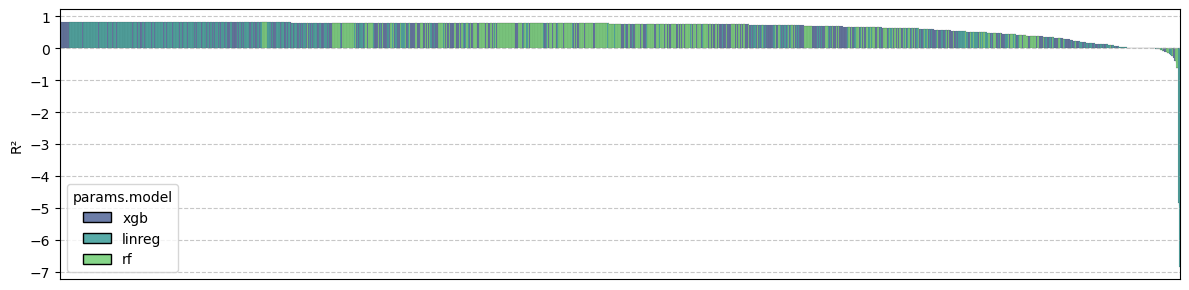

In [24]:
plt.figure(figsize=(12, 3))
sns.histplot(
    data=df_metrics,
    x=df_metrics.index,
    weights=df_metrics["metrics.r2_val"],
    bins=len(df_metrics),  
    hue=df_metrics["params.model"],
    #palette=model_colors,
    palette='viridis',
    element="bars",
    multiple="stack"  
)

plt.xlim(df_metrics.index.min(), df_metrics.index.max())
plt.xlabel("")
plt.ylabel("R²")
plt.xticks([], [])  # Hide x-axis labels
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show legend

plt.tight_layout()
plt.savefig('/home/lfloerl/cloud/lfloerl/Microterroir/Figures/RITME-RH-test-R2.png', dpi=1000)
plt.show()

/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/scratch/lfloerl/.condaenvs/ri

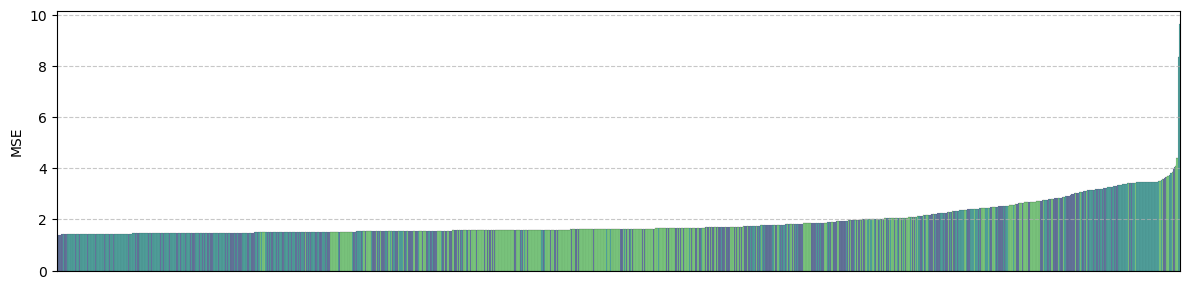

In [25]:
plt.figure(figsize=(12, 3))
sns.histplot(
    data=df_metrics,
    x=df_metrics.index,
    weights=df_metrics["metrics.rmse_val"],
    bins=len(df_metrics),  
    hue=df_metrics["params.model"],
    #palette=model_colors,
    palette='viridis',
    element="bars",
    multiple="stack"  
)

plt.xlim(df_metrics.index.min(), df_metrics.index.max())
plt.xlabel("")
plt.ylabel("MSE")
plt.xticks([], [])  # Hide x-axis labels
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.legend([], [], frameon=False)

plt.tight_layout()
plt.savefig('/home/lfloerl/cloud/lfloerl/Microterroir/Figures/RITME-RH-test-MSE.png', dpi=1000)
plt.show()

# Extracting trained best models
Get best models for further usage

The best models are stored in Python dictionary best_model_dict with model_type as keys and TunedModel objects as values. To extract a given best model and perform predictions with it, see below code excerpt:

In [41]:
if path_to_store_best_models is not None:
    print(f"Saving best models to {path_to_store_best_models}...")
    if not os.path.exists(path_to_store_best_models):
        os.makedirs(path_to_store_best_models)

    save_best_models(best_model_dict, path_to_store_best_models)

Saving best models to RH_best_models...


In [42]:
# get best model
best_xgb_model = best_model_dict["xgb"]

In [43]:
# perform prediction with best linreg model
test_predictions = best_xgb_model.predict(test, "test")
train_predictions = best_xgb_model.predict(train_val, "train")

/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
  warnings.warn(
/scratch/lfloerl/.condaenvs/ritme_model/lib/python3.10/site-packages/ritme/feature_space/aggregate_features.py:78: UserWarning: These features were not found in taxonomy and are hence disregarded: ['Fermentation_Timepoint'].
  warnings.warn(


In [44]:
# get true values 
md_df = pd.read_csv(path_to_md, sep='\t', index_col=0)

# subset to only contain the samples in the test dataset 
md_test = md_df.loc[test.index]
md_train = md_df.loc[train_val.index]

true_values_test = md_test['median_rh'].values
true_values_train = md_train['median_rh'].values

## Plot

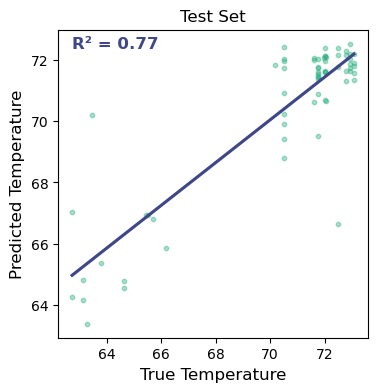

In [45]:
# Create scatterplot
plt.figure(figsize=(4, 4))
sns.regplot(x=true_values_test, y=test_predictions, ci=None, 
            scatter_kws={'s': 10, 'color': '#29AF7FFF', 'alpha':0.4}, 
            line_kws={'color': '#3F4788FF'})

# Compute R² score 
r2 = r2_score(true_values_test, test_predictions)
r2_text = f"R² = {r2:.2f}" if r2 >= 0 else "R² < 0"

# Adjust text position
y_text_position = np.percentile(test_predictions, 95)
plt.text(np.min(true_values_test), y_text_position, r2_text, 
         fontsize=12, color="#3F4788FF", fontweight='bold')

# Labels
plt.xlabel("True Temperature", fontsize=12)
plt.ylabel("Predicted Temperature", fontsize=12)
plt.title('Test Set')
# Show plot
plt.show()

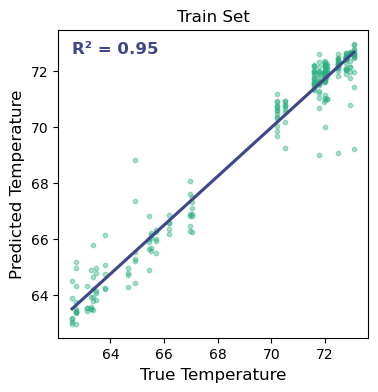

In [46]:
# Create scatterplot
plt.figure(figsize=(4, 4))
sns.regplot(x=true_values_train, y=train_predictions, ci=None, 
            scatter_kws={'s': 10, 'color': '#29AF7FFF', 'alpha':0.4}, 
            line_kws={'color': '#3F4788FF'})

# Compute R² score 
r2 = r2_score(true_values_train, train_predictions)
r2_text = f"R² = {r2:.2f}" if r2 >= 0 else "R² < 0"

# Adjust text position
y_text_position = np.percentile(train_predictions, 95)
plt.text(np.min(true_values_train), y_text_position, r2_text, 
         fontsize=12, color="#3F4788FF", fontweight='bold')

# Labels
plt.xlabel("True Temperature", fontsize=12)
plt.ylabel("Predicted Temperature", fontsize=12)

plt.title('Train Set')

# Show plot
plt.show()